In [8]:
!pip uninstall opencv-python -y
!pip install "opencv-python<4.8"
!pip install "numpy<1.22"

Found existing installation: opencv-python 4.12.0.88


Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
     ---------------------------------------- 38.2/38.2 MB 7.9 MB/s eta 0:00:00


     ---------------------------------------- 14.0/14.0 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.


In [9]:
class CollapsibleTab:
    def __init__(self, parent, title1, content1):
        import tkinter as tk
        self.parent = parent
        self.title1 = title1
        self.content1 = content1
        self.is_open = False

        self.tab_frame = tk.Frame(self.parent, bd=1, relief="solid")

        self.title_button1 = tk.Label(self.tab_frame, text=self.title1, anchor="w")
        self.title_button1.grid(row=0,column=0,sticky='w')

        # コンテンツ部分1（最初は非表示）
        self.content_frame1 = tk.Frame(self.tab_frame)
        self.content_entry_1 = tk.Entry(self.content_frame1, width=self.content1)
        self.content_entry_1.grid(row=0,column=1,sticky='w')

        # タブ自体は隠すために、packした後に非表示にする
        self.content_frame1.grid_forget()

    def toggle(self, show):
        # 折り畳みの開閉処理
        if show:
            self.content_frame1.grid(row=0,column=1,sticky='w')
        else:
            self.content_frame1.grid_forget()
        self.is_open = show

    def get_values(self):
        # Entryウィジェットの値を取得する
        criterion_value = self.content_entry_1.get()
        return criterion_value
        

class CollapsibleTabForLasso:
    def __init__(self, parent, title1, content1):
        import tkinter as tk
        self.parent = parent
        self.title1 = title1
        self.content1 = content1
        self.is_open = False

        self.tab_frame = tk.Frame(self.parent, bd=1, relief="solid")

        self.title_button1 = tk.Label(self.tab_frame, text=self.title1, anchor="w")
        self.title_button1.grid(row=0,column=0,sticky='w')

        self.content_frame1 = tk.Frame(self.tab_frame)
        self.content_entry_1 = tk.Entry(self.content_frame1, width=self.content1)
        self.content_entry_1.grid(row=0,column=1,sticky='w')

        self.content_frame1.grid_forget()

    def toggle(self, show):
        # 折り畳みの開閉処理
        if show:
            self.content_frame1.grid(row=0,column=1,sticky='w')
        else:
            self.content_frame1.grid_forget()
            
        self.is_open = show
    
    def get_values(self):
        # Entryウィジェットの値を取得する
        feature_num_value = self.content_entry_1.get()
        return feature_num_value

class Frame_tkinter():
    def __init__(self):
        def update_tabs():
            import tkinter as tk
            # チェックボックスの状態に応じてタブの表示/非表示を切り替え
            lasso_size_tab.toggle(boolean_2_0_2.get())
            reg_tab.toggle(boolean_list_2_1[1].get())

        def update_tabs_forlasso():
            import tkinter as tk
            # チェックボックスの状態に応じてタブの表示/非表示を切り替え
            lasso_tab.toggle(boolean_2_0_1.get())

        import tkinter as tk
        from tkinter import messagebox
        from tkinter import font
        from tkinter import ttk
        from tkinter import filedialog
        from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
        import shutil
        import cv2
        import glob
        import numpy as np
        import pandas as pd
        import os
        import seaborn as sns
        from radiomics import featureextractor
        import radiomics
        from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, ngtdm, gldm, imageoperations, shape #shape2D
        import six
        import pydicom
        from natsort import natsorted
        import SimpleITK as sitk
        import matplotlib.pyplot as plt
        import nrrd
        import openpyxl
        import csv
        import time

        #トップレベルウィンドウ作成
        root = tk.Tk()
        #画面の高さ幅取得
        width = root.winfo_screenwidth()
        height = root.winfo_screenheight()
        #トップレべルウィンドウ設定
        root.title('Radiomics Analysis app')
        root.geometry(f'{width}x{height}')
        root.rowconfigure(0,weight=1)
        root.columnconfigure(0,weight=1)
        #tab作成
        note = ttk.Notebook(root)
        all_frame_1 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        all_frame_2 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        all_frame_3 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        all_frame_4 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        #各フレームの作成
        #loo_input用
        frame_list=['frame_1','frame_2','frame_3','frame_4','frame_5','frame_6']
        for i in range(len(frame_list)-1):
            frame_list[i] = tk.Frame(all_frame_1, bd=2, relief="solid", highlightcolor="black")
            frame_list[i].grid(row=i, column=0, padx=1, pady=1, sticky="ew" )
        frame_list[len(frame_list)-1] = tk.Frame(all_frame_1)
        frame_list[len(frame_list)-1].grid(row=len(frame_list)-1, pady=1)
        
        #notebookに追加
        note.add(all_frame_1, text="Lasso Input")
        note.add(all_frame_2, text='PCA Output')
        note.add(all_frame_3, text="Regression Output")
        note.add(all_frame_4, text='Lda-ROC Output')
        note.grid(sticky='nsew')

        fonts = [font.Font(size=14,family='Italic',weight='bold'),font.Font(size=10,family='Italic',weight='bold')]

        # ファイル選択を行い、選択したファイルのパスを変数に格納する関数
        def select_file_case1():
            file_path_case1 = filedialog.askdirectory(title="Select file1")
            if file_path_case1:
                selected_file_label_case1.config(text=f"File path: {file_path_case1}")
                global case_1
                case_1 = file_path_case1
            else:
                selected_file_label_case1.config(text="Not selected")
        def select_file_case2():
            file_path_case2 = filedialog.askdirectory(title="Select file2")
            if file_path_case2:
                selected_file_label_case2.config(text=f"File path: {file_path_case2}")
                global case_2
                case_2 = file_path_case2
            else:
                selected_file_label_case2.config(text="Not selected")
        
        #loocvLasso入力画面
        framelist0_row_num = 0
        #画像読み込みテキストボックス
        label_feature_1 = tk.Label(frame_list[0],text='Get the Path',font=fonts[0])
        label_feature_1.grid(row=framelist0_row_num ,column=0,sticky='w')
        framelist0_row_num +=  1
        # 変数を定義（ファイルパスを保存するため）
        file_path_var_case1 = ""
        file_path_var_case2 = ""
        # ボタンを作成してファイル選択を呼び出す
        select_button_case1 = tk.Button(frame_list[0], text="Select file1", command=select_file_case1)
        select_button_case1.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1
        # 選択されたファイルのパスを表示するラベル
        selected_file_label_case1 = tk.Label(frame_list[0], text="Not selected")
        selected_file_label_case1.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1
        select_button_case2 = tk.Button(frame_list[0], text="Select file2", command=select_file_case2)
        select_button_case2.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1
        selected_file_label_case2 = tk.Label(frame_list[0], text="Not selected")
        selected_file_label_case2.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1

        #２Dと３D選択（ラジオボタンウィジェット）
        framelist1_row_num = 0
        label_feature_2_1 = tk.Label(frame_list[1],text='Type of Image File',font=fonts[0])
        label_feature_2_1.grid(row=framelist1_row_num,column=0)
        framelist1_row_num += 1
        dimention_tab = tk.Frame(frame_list[1])
        dimention_tab.grid(row=framelist1_row_num,column=0,sticky='w')
        framelist1_row_num += 1
        widget_var = tk.StringVar(value = '2D')
        dimension_list = ['2D','3D']
        radiobutton_name_1 = ['radio_2D','radio_3D']
        for i in range (0,2):
            radiobutton_name_1[i]=tk.Radiobutton(
                dimention_tab,
                text = dimension_list[i],
                variable = widget_var,
                value = dimension_list[i])
            radiobutton_name_1[i].grid(row=0,column=i,sticky='w')
        boxelsamplesize_tab = tk.Frame(frame_list[1])
        boxelsamplesize_tab.grid(row=framelist1_row_num, column=0, sticky='w')
        boxelsamplesize_label = tk.Label(boxelsamplesize_tab,text='boxelsize',anchor='w')
        boxelsamplesize_label.grid(row=0,column=0,sticky='w')
        boxelsamplesize_entry = tk.Entry(boxelsamplesize_tab,width=5)
        boxelsamplesize_entry.grid(row=0,column=1,sticky='w')
        
        #特徴量選択
        framelist2_row_num = 0
        boolean_list_1_1=["boolean_1","boolean_2","boolean_3"]
        for i in range (len(boolean_list_1_1)):
            boolean_list_1_1[i]=tk.BooleanVar()
            i = i+1
        boolean_list_1_2=["boolean_4","boolean_5","boolean_6","boolean_7","boolean_8","boolean_9","boolean_10"]
        for i in range (len(boolean_list_1_2)):
            boolean_list_1_2[i]=tk.BooleanVar()
            i = i+1
        label_feature_3_1 = tk.Label(frame_list[2],text='Filter',font=fonts[0])
        label_feature_3_1.grid(row=framelist2_row_num,column=0)
        framelist2_row_num += 1
        fil_name_list=["Original","Wavelet","LoG"]
        for i in range(len(fil_name_list)):
            check_filter=tk.Checkbutton(
                frame_list[2],
                text=fil_name_list[i],
                variable = boolean_list_1_1[i],
                )
            check_filter.grid(row=i+1,column=0,sticky='w')
            boolean_list_1_1[i].set(True)
            i = i+1
        label_feature_3_2 = tk.Label(frame_list[3],text='Type of Features',font=fonts[0])
        label_feature_3_2.grid(row=0,column=0)
        feature_name_list=["shape","firstorder","glcm","glrlm","glszm","gldm","ngtdm"]
        for i in range(len(feature_name_list)):
            check_feature=tk.Checkbutton(
                frame_list[3],
                text=feature_name_list[i],
                variable = boolean_list_1_2[i],
                )
            check_feature.grid(row=i+1,column=0,sticky='w')
            boolean_list_1_2[i].set(True)
            i = i+1
        
        #分析法選択
        framelist4_row_num = 0
        label_analysis = tk.Label(frame_list[4], text='Analysis Method',font=fonts[0])
        label_analysis.grid(row=framelist4_row_num,column=0,sticky='w')
        framelist4_row_num += 1
        boolean_2_0_1 = tk.BooleanVar()
        check_filter = tk.Checkbutton(
            frame_list[4],
            text='Define the number of features',
            variable = boolean_2_0_1,
            command = update_tabs_forlasso
        )
        check_filter.grid(row=framelist4_row_num,column=0,sticky='w')
        framelist4_row_num += 1
        lasso_tab = CollapsibleTabForLasso(frame_list[4], "Number of Features", 5)
        lasso_tab.tab_frame.grid(row=framelist4_row_num, column=0, sticky='w')
        framelist4_row_num += 1

        boolean_2_0_2 = tk.BooleanVar()
        check_filter=tk.Checkbutton(
            frame_list[4],
            text="Lasso parameta",
            variable = boolean_2_0_2,
            command = update_tabs
            )
        check_filter.grid(row=framelist4_row_num,column=0,sticky='w')
        framelist4_row_num += 1
        boolean_2_0_2.set(False)
        lasso_size_tab = CollapsibleTabForLasso(frame_list[4], "testsize for Lasso (0≦x≦1, nosplit=0or1)", 5)
        lasso_size_tab.tab_frame.grid(row=framelist4_row_num, column=0, sticky='w')
        framelist4_row_num += 1
        boolean_list_2_1=["boolean_2_1","boolean_2_2","boolean_2_3"]
        for i in range (len(boolean_list_2_1)):
            boolean_list_2_1[i]=tk.BooleanVar()
            i = i+1
        analysis_list=["Principal Component Analysis (PCA)","Regression Analysis","Linear Discrimination Analysis - Reciever Operating Caracteristic(LDA-ROC)"]
        check_filter = tk.Checkbutton(
            frame_list[4],
            text = analysis_list[0],
            variable = boolean_list_2_1[0],
            )
        check_filter.grid(row = framelist4_row_num,column=0,sticky="w")
        framelist4_row_num += 1
        boolean_list_2_1[0].set(False)
        for i in range(1,3):
            check_filter=tk.Checkbutton(
                frame_list[4],
                text=analysis_list[i],
                variable = boolean_list_2_1[i],
                command = update_tabs
                )
            check_filter.grid(row=framelist4_row_num,column=0,sticky='w')
            framelist4_row_num += 2
            boolean_list_2_1[i].set(False)
            i = i+1
        reg_tab = CollapsibleTab(frame_list[4], "multicolinearlity criterion", 5)
        framelist4_row_num -= 3
        reg_tab.tab_frame.grid(row=framelist4_row_num, column=0, sticky='w')
        framelist4_row_num += 2

        def generate_radiomicsfile():
            existing_csv_file='some.csv'
            # 保存するファイルを指定するダイアログを開く
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            # 既存のCSVファイルを選ばれた保存先にコピー
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_alllassofile():
            existing_csv_file='all_lassofeature.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        def generate_trainlassofile():
            existing_csv_file='train_lassofeature.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        def generate_testlassofile():
            existing_csv_file='test_lassofeature.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_pcafile():
            existing_csv_file='result/pca_result.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_regfile():
            existing_csv_file='result/regression_result.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        
        def generate_ldarocfile():
            existing_csv_file='result/roclda_result.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_pcafile_nosplit():
            existing_csv_file='result/pca_result_nosplit.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_regfile_nosplit():
            existing_csv_file='result/regression_result_nosplit.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        
        def generate_ldarocfile_nosplit():
            existing_csv_file='result/roclda_result_nosplit.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)

        
        #ハンドラ関数(解析用の関数も入れる)
        def clicked():
            with open('some.csv', 'w', newline='') as f:
                writer = csv.writer(f)
                writer.writerow('')
            messagebox.showinfo('message','Start Analysis')
            
            param_back =yaml_back()
            progressbar["maximum"] = 10
            progress_count = 0
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            radio_dimension = widget_var.get()
            
            #特徴量数の取得
            feature_num = lasso_tab.get_values()

            #プログレスバー更新
            progress_count += 1 
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            #radiomics
            boxelsamplesize = int(boxelsamplesize_entry.get())
            param_yaml = yaml_editor(boolean_list_1_1,fil_name_list,boolean_list_1_2,feature_name_list,boxelsamplesize)
            radio_1 = part_radiomics(case_1,radio_dimension,"case1")
            radio_2 = part_radiomics(case_2,radio_dimension,"case2")
            param_back =yaml_back()
            t_lasso_size_tab = type(lasso_size_tab.get_values)
            print(f'{t_lasso_size_tab}:{lasso_size_tab.get_values}')
            #プログレスバー更新
            progress_count += 5 
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            #lasso
            if lasso_size_tab.get_values() == '':
                testsizeforlasso = 0.3 
            else:
                testsizeforlasso = lasso_size_tab.get_values()
            t_testsize = type(testsizeforlasso)
            print(f'{t_testsize}:{testsizeforlasso}')
            testsizeforlasso = float(testsizeforlasso)
            if boolean_2_0_1.get() == False:
                feature_num = 10 
            lasso(int(feature_num),boolean_2_0_1.get(),boolean_2_0_2.get(), testsizeforlasso)
            #プログレスバー更新
            progress_count += 3 
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            # DPIを取得（1インチあたりのピクセル数）
            dpi = root.winfo_fpixels('1i')
            # ピクセルをインチに変換
            width_inch = width / dpi
            height_inch = height / dpi

            if testsizeforlasso==0 or testsizeforlasso==1 or testsizeforlasso==0.0 or testsizeforlasso==1.0:
                if boolean_list_2_1[0].get() == True:
                    analysis_1 = All_Pca_input()
                    
                    canvas_looscpca = tk.Canvas(frame_list_looop_1[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscpca.grid(row=0, column=0)
                    frame_looscpca_for_canvas = tk.Frame(canvas_looscpca)
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    
                    x_transformed = analysis_1[1].to_numpy()
                    targets = analysis_1[2]
                    x_num_pca = analysis_1[3]
                    x_transformed_train = analysis_1[4].to_numpy()
                    y_train = analysis_1[5]
                    x_transformed_test = analysis_1[6].to_numpy()
                    y_test = analysis_1[7]
                    explained_variance_ratio = analysis_1[8]
                    split_explained_variance_ratio = analysis_1[9]
                    #図の準備
                    fig_loopca, ax_loopca = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    x0 = x_transformed[targets==0]
                    x1 = x_transformed[targets==1]
    
                    plt.title(f'PCA:: {x_num_pca}D -> 2D Projection (explained_variance_ratio = {explained_variance_ratio})')
                    #正解が0 or 1それぞれの第1主成分得点をx軸，第2主成分得点をy軸に設定
                    ax_loopca.scatter(x0[:, 0], x0[:, 1])
                    ax_loopca.scatter(x1[:, 0], x1[:, 1])
                    ax_loopca.set_xlabel("component-1")
                    ax_loopca.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot = FigureCanvasTkAgg(fig_loopca, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscpcaplot.get_tk_widget().grid(row=0,column=0)
                    
                    #図の準備(train)
                    fig_loopca_train, ax_loopca_train = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    x0_train = x_transformed_train[y_train==0]
                    x1_train = x_transformed_train[y_train==1]
    
                    plt.title(f'PCA Train:: {x_num_pca}D -> 2D Projection (explained_variance_ratio = {split_explained_variance_ratio})')
                    ax_loopca_train.scatter(x0_train[:, 0], x0_train[:, 1])
                    ax_loopca_train.scatter(x1_train[:, 0], x1_train[:, 1])
                    ax_loopca_train.set_xlabel("component-1")
                    ax_loopca_train.set_ylabel("component-2")
                    
                    canvas_looscpcaplot_train = FigureCanvasTkAgg(fig_loopca_train, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_train.draw()
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscpcaplot_train.get_tk_widget().grid(row=1,column=0)
                    #図の準備(test)
                    fig_loopca_test, ax_loopca_test = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    x0_test = x_transformed_test[y_test==0]
                    x1_test = x_transformed_test[y_test==1]
    
                    plt.title(f'PCA Test:: {x_num_pca}D -> 2D Projection')
                    #正解が0 or 1それぞれの第1主成分得点をx軸，第2主成分得点をy軸に設定
                    ax_loopca_test.scatter(x0_test[:, 0], x0_test[:, 1])
                    ax_loopca_test.scatter(x1_test[:, 0], x1_test[:, 1])
                    ax_loopca_test.set_xlabel("component-1")
                    ax_loopca_test.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot_test = FigureCanvasTkAgg(fig_loopca_test, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_test.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscpcaplot_test.get_tk_widget().grid(row=2,column=0)                    
    
                    # ダウンロードボタン
                    download_button_pca1 = tk.Button(frame_looscpca_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_pca1.grid(row=3, column=0, padx=10, pady=10)
                    download_button_pca2 = tk.Button(frame_looscpca_for_canvas, text="Download lassofeatures_csv", command=generate_alllassofile)
                    download_button_pca2.grid(row=4, column=0, padx=10, pady=10)
                    download_button_pca3 = tk.Button(frame_looscpca_for_canvas, text="Download pca_nosplit_csv", command=generate_pcafile_nosplit)
                    download_button_pca3.grid(row=5, column=0, padx=10, pady=10)
    
                    # スクロールバーの作成
                    scrollbar_looscpca = tk.Scrollbar(frame_list_looop_1[1], command=canvas_looscpca.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscpca.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscpca.config(yscrollcommand=scrollbar_looscpca.set)
                    # スクロール可能な領域を作成
                    frame_looscpca = canvas_looscpca
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscpca_for_canvas.update_idletasks()
                    canvas_looscpca.config(scrollregion=canvas_looscpca.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentpca_bbox = canvas_looscpca.bbox("all")
                    canvas_looscpca.config(scrollregion=(currentpca_bbox[0], currentpca_bbox[1],
                                         currentpca_bbox[2], currentpca_bbox[3] + 100))#2がwidth,3がheight
                
                if boolean_list_2_1[1].get()==True:
                    reg_criterion_value = reg_tab.get_values() 

                    analysis_2 = All_linear_reg(criterion=float(reg_criterion_value))#後で入力をいれるように
                    x = analysis_2[0]
                    y = analysis_2[1]
                    df = analysis_2[2]
                    y_pred = analysis_2[3]
                    y_train, y_train_pred = analysis_2[4], analysis_2[5]
                    y_test, y_test_pred = analysis_2[6], analysis_2[7]

                    canvas_looscreg = tk.Canvas(frame_list_looop_2[1] ,width=width-width//10, height=height-width//10, relief='solid' )#白の範囲
                    canvas_looscreg.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscreg_for_canvas = tk.Frame(canvas_looscreg)
                    # キャンバス内にフレームを作成
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
    
                    #相関係数を算出
                    corr = np.corrcoef(df.values.T)
                    fig_corr, ax_corr = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))#単位がinch
                    hm = sns.heatmap(
                        corr,
                        annot=True,
                        fmt=".2f",
                        annot_kws={"size": 8},
                        yticklabels=list(df.columns),
                        xticklabels=list(df.columns),
                        ax=ax_corr
                    )
                    plt.title('The correlation coefficient between features (before multicolinearlity)')
                    ax_corr.set_xticklabels(ax_corr.get_xticklabels(), fontsize=8, rotation=45, ha="right")
                    ax_corr.set_yticklabels(ax_corr.get_yticklabels(), fontsize=8)
                    fig_corr.tight_layout()
                    canvas_corr = FigureCanvasTkAgg(fig_corr, master=frame_looscreg_for_canvas)  # tkinterのウィンドウに図を埋め込む
                    canvas_corr.draw()
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_corr.get_tk_widget().grid(row=0, column=0)

                    #残差プロットの可視化
                    #全データ
                    fig_residual, ax_residual = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.scatter(y_pred,
                                y_pred - y,
                                c="blue",
                                marker="o",
                                s=40,
                                alpha=0.7)
    
                    #グラフの書式
                    plt.title('Residual plot')
                    plt.xlabel("predict value")
                    plt.ylabel("residual error")
                    plt.hlines(y=0,xmin=-20,xmax=60,lw=2,color="black")
                    plt.xlim([-5,5])
                    plt.ylim([-5,5])
                    plt.tight_layout()
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_residual = FigureCanvasTkAgg(fig_residual, master=frame_looscreg_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_residual.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_residual.get_tk_widget().grid(row=1, column=0)

                    split_fig_residual, split_ax_residual = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    
                    plt.scatter(y_train_pred,
                                y_train_pred - y_train,
                                c="blue",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="train")
                    #テストデータ
                    plt.scatter(y_test_pred,
                                y_test_pred - y_test,
                                c="red",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="test")
    
                    #グラフの書式
                    plt.title('Residual plot by Splitdata')
                    plt.xlabel("predict value")
                    plt.ylabel("residual error")
                    plt.legend(loc="upper left")
                    plt.hlines(y=0,xmin=-20,xmax=60,lw=2,color="black")
                    plt.xlim([-5,5])
                    plt.ylim([-5,5])
                    plt.tight_layout()
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    split_canvas_residual = FigureCanvasTkAgg(split_fig_residual, master=frame_looscreg_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    split_canvas_residual.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    split_canvas_residual.get_tk_widget().grid(row=2, column=0)
                    
                    # ダウンロードボタン
                    download_button_reg1 = tk.Button(frame_looscreg_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_reg1.grid(row=3, column=0, padx=10, pady=10)
                    download_button_reg2 = tk.Button(frame_looscreg_for_canvas, text="Download lassofeatures_csv", command=generate_alllassofile)
                    download_button_reg2.grid(row=4, column=0, padx=10, pady=10)
                    download_button_reg3 = tk.Button(frame_looscreg_for_canvas, text="Download regression_nosplit_csv", command=generate_regfile)
                    download_button_reg3.grid(row=5, column=0, padx=10, pady=10)
                    
                    
                    # スクロールバーの作成
                    scrollbar_looscreg = tk.Scrollbar(frame_list_looop_2[1], command=canvas_looscreg.yview)
                    scrollbar_looscreg.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscreg.config(yscrollcommand=scrollbar_looscreg.set)
                    # スクロール可能な領域を作成
                    frame_looscreg = canvas_looscreg
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscreg_for_canvas.update_idletasks()
                    canvas_looscreg.config(scrollregion=canvas_looscreg.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentreg_bbox = canvas_looscreg.bbox("all")
                    # さらに拡張したい場合は、必要な値を追加
                    canvas_looscreg.config(scrollregion=(currentreg_bbox[0], currentreg_bbox[1],
                                         currentreg_bbox[2], currentreg_bbox[3] + 100))#2がwidth,3がheight
    
                if boolean_list_2_1[2].get()==True:                    
                    analysis_3 = All_roc_lda()
                    x_num = analysis_3[0]
                    y_lda, lda_transform = analysis_3[1], analysis_3[2]
                    fpr, tpr, roc_auc = analysis_3[3], analysis_3[4], analysis_3[5]
                    y_train, train_lda_transform = analysis_3[6], analysis_3[7]
                    train_fpr, train_tpr, train_roc_auc = analysis_3[8], analysis_3[9], analysis_3[10]
                    y_test, test_lda_transform = analysis_3[11], analysis_3[12]
                    test_fpr, test_tpr, test_roc_auc = analysis_3[13], analysis_3[14], analysis_3[15]
                    lda_decisionb, split_lda_decisionb = analysis_3[16], analysis_3[17]
                    #Lda
                    canvas_looscldaroc = tk.Canvas(frame_list_looop_3[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscldaroc.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscldaroc_for_canvas = tk.Frame(canvas_looscldaroc)
                    # キャンバス内にフレームを作成
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")

                    #Lda図
                    fig_loolda = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))

                    # 切片の描画
                    plt.axvline(x=lda_decisionb,label=f"x = {lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_lda):
                        plt.scatter(lda_transform[y_lda == class_label, 0], np.zeros_like(lda_transform[y_lda == class_label, 0]), label=f'Class {class_label}')
                    plt.title(f'LDA (All data): {x_num}D -> 1D Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscldaplot = FigureCanvasTkAgg(fig_loolda, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscldaplot.draw()
                    canvas_looscldaplot.get_tk_widget().grid(row=0, column=0)
                    
                    #Lda図(train)
                    train_fig_loolda = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=split_lda_decisionb,label=f"x = {split_lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_train):
                        plt.scatter(train_lda_transform[y_train == class_label, 0], np.zeros_like(train_lda_transform[y_train == class_label, 0]), label=f'Class {class_label}')
                    plt.title(f'LDA (Train data): {x_num}D -> 1D Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    train_canvas_looscldaplot = FigureCanvasTkAgg(train_fig_loolda, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    train_canvas_looscldaplot.draw()
                    train_canvas_looscldaplot.get_tk_widget().grid(row=1, column=0)
                    
                    #Lda図(test)
                    test_fig_loolda = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=split_lda_decisionb,label=f"x = {split_lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_test):#np.unique(y)=重複のない値を返す＝[0,1]を返す
                        plt.scatter(test_lda_transform[y_test == class_label, 0], np.zeros_like(test_lda_transform[y_test == class_label, 0]), label=f'Class {class_label}')
                    plt.title(f'LDA (Test data): {x_num}D -> 1D Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    test_canvas_looscldaplot = FigureCanvasTkAgg(test_fig_loolda, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    test_canvas_looscldaplot.draw()
                    test_canvas_looscldaplot.get_tk_widget().grid(row=2, column=0)

                    #ROC
                    # ROC曲線の描画
                    fig_looroc = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('ROC Curve (All data)')
                    plt.legend(loc='lower right')
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscrocplot = FigureCanvasTkAgg(fig_looroc, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscrocplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscrocplot.get_tk_widget().grid(row=3, column=0, sticky='nsew')
                    
                    # ROC曲線の描画(train)
                    train_fig_looroc = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {train_roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('ROC Curve (Train data)')
                    plt.legend(loc='lower right')
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    train_canvas_looscrocplot = FigureCanvasTkAgg(train_fig_looroc, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    train_canvas_looscrocplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    train_canvas_looscrocplot.get_tk_widget().grid(row=4, column=0, sticky='nsew')
                    # ROC曲線の描画(Test)
                    test_fig_looroc = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {test_roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('ROC Curve (Test data)')
                    plt.legend(loc='lower right')
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    test_canvas_looscrocplot = FigureCanvasTkAgg(test_fig_looroc, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    test_canvas_looscrocplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    test_canvas_looscrocplot.get_tk_widget().grid(row=5, column=0, sticky='nsew')

                    # ダウンロードボタン
                    download_button_ldaroc1 = tk.Button(frame_looscldaroc_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_ldaroc1.grid(row=6, column=0, padx=10, pady=10)
                    download_button_ldaroc2 = tk.Button(frame_looscldaroc_for_canvas, text="Download lassofeatures_csv", command=generate_alllassofile)
                    download_button_ldaroc2.grid(row=7, column=0, padx=10, pady=10)
                    download_button_ldaroc3 = tk.Button(frame_looscldaroc_for_canvas, text="Download ldaroc_nosplit_csv", command=generate_ldarocfile)
                    download_button_ldaroc3.grid(row=8, column=0, padx=10, pady=10)
                    
                    # スクロールバーの作成
                    scrollbar_looscldaroc = tk.Scrollbar(frame_list_looop_3[1], command=canvas_looscldaroc.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscldaroc.grid(row=0, column=1, sticky="ns")
                    # Canvasとスクロールバーを連携させる
                    canvas_looscldaroc.config(yscrollcommand=scrollbar_looscldaroc.set)
                    # スクロール可能な領域を作成
                    frame_looscldaroc = canvas_looscldaroc
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscldaroc_for_canvas.update_idletasks()
                    canvas_looscldaroc.config(scrollregion=canvas_looscldaroc.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentldaroc_bbox = canvas_looscldaroc.bbox("all")
                    canvas_looscldaroc.config(scrollregion=(currentldaroc_bbox[0], currentldaroc_bbox[1],
                                         currentldaroc_bbox[2], currentldaroc_bbox[3] + 100))#2がwidth,3がheight

            else:
                if boolean_list_2_1[0].get() == True:
                    analysis_1 = Pca_input()
                    
                    canvas_looscpca = tk.Canvas(frame_list_looop_1[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscpca.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscpca_for_canvas = tk.Frame(canvas_looscpca)
                    # キャンバス内にフレームを作成
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    
                    train_x_transformed = analysis_1[1].to_numpy()
                    #print(train_x_transformed)
                    test_x_transformed = analysis_1[2].to_numpy()
                    train_targets = analysis_1[3]
                    test_targets = analysis_1[4]
                    x_num_pca = analysis_1[5]
                    explained_variance_ratio = analysis_1[6]
                    #図の準備(train)
                    fig_loopca_train, ax_loopca_train = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))

                    train_x0 = train_x_transformed[train_targets==0]
                    train_x1 = train_x_transformed[train_targets==1]

                    ax_loopca_train.set_title(f'Train PCA:: {x_num_pca}D -> 1D Projection (explained_variance_ratio = {explained_variance_ratio})')
                    #正解が0 or 1それぞれの第1主成分得点をx軸，第2主成分得点をy軸に設定
                    ax_loopca_train.scatter(train_x0[:, 0], train_x0[:, 1])
                    ax_loopca_train.scatter(train_x1[:, 0], train_x1[:, 1])
                    ax_loopca_train.set_xlabel("component-1")
                    ax_loopca_train.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot_train = FigureCanvasTkAgg(fig_loopca_train, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_train.draw()
                    canvas_looscpcaplot_train.get_tk_widget().grid(row=0,column=0)
                    
                    #図の準備(test)
                    fig_loopca_test, ax_loopca_test = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    test_x0 = test_x_transformed[test_targets==0]
                    test_x1 = test_x_transformed[test_targets==1]
                    
                    ax_loopca_test.set_title(f'Test PCA:: {x_num_pca}D -> 1D Projection')
                    ax_loopca_test.scatter(test_x0[:, 0], test_x0[:, 1])
                    ax_loopca_test.scatter(test_x1[:, 0], test_x1[:, 1])
                    ax_loopca_test.set_xlabel("component-1")
                    ax_loopca_test.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot_test = FigureCanvasTkAgg(fig_loopca_test, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_test.draw()
                    canvas_looscpcaplot_test.get_tk_widget().grid(row=1,column=0)
    
                    # ダウンロードボタン
                    download_button_pca1 = tk.Button(frame_looscpca_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_pca1.grid(row=2, column=0, padx=10, pady=10)
                    download_button_pca2 = tk.Button(frame_looscpca_for_canvas, text="Download train_lassofeatures_csv", command=generate_trainlassofile)
                    download_button_pca2.grid(row=3, column=0, padx=10, pady=10)
                    download_button_pca3 = tk.Button(frame_looscpca_for_canvas, text="Download test_lassofeatures_csv", command=generate_testlassofile)
                    download_button_pca3.grid(row=4, column=0, padx=10, pady=10)
                    download_button_pca4 = tk.Button(frame_looscpca_for_canvas, text="Download pca_csv", command=generate_pcafile)
                    download_button_pca4.grid(row=5, column=0, padx=10, pady=10)
    
                    # スクロールバーの作成
                    scrollbar_looscpca = tk.Scrollbar(frame_list_looop_1[1], command=canvas_looscpca.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscpca.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscpca.config(yscrollcommand=scrollbar_looscpca.set)
                    # スクロール可能な領域を作成
                    frame_looscpca = canvas_looscpca
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscpca_for_canvas.update_idletasks()
                    canvas_looscpca.config(scrollregion=canvas_looscpca.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentpca_bbox = canvas_looscpca.bbox("all")
                    canvas_looscpca.config(scrollregion=(currentpca_bbox[0], currentpca_bbox[1],
                                         currentpca_bbox[2], currentpca_bbox[3] + 100))#2がwidth,3がheight
    
                if boolean_list_2_1[1].get()==True:
                    reg_criterion_value = reg_tab.get_values()

                    analysis_2 =linear_reg(criterion=float(reg_criterion_value))
                    x_train = analysis_2[0]
                    x_test = analysis_2[1]
                    y_train = analysis_2[2]
                    y_test = analysis_2[3]
                    train_df = analysis_2[4]
                    y_train_pred = analysis_2[5]
                    y_test_pred = analysis_2[6]
    
    
                    canvas_looscreg = tk.Canvas(frame_list_looop_2[1] ,width=width-width//10, height=height-width//10, relief='solid' )#白の範囲
                    canvas_looscreg.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscreg_for_canvas = tk.Frame(canvas_looscreg)
                    # キャンバス内にフレームを作成
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
    
                    #相関係数を算出
                    corr = np.corrcoef(train_df.values.T)
                    fig_corr, ax_corr = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))#単位がinch
                    hm = sns.heatmap(
                        corr,
                        annot=True,
                        fmt=".2f",
                        annot_kws={"size": 8},
                        yticklabels=list(train_df.columns),
                        xticklabels=list(train_df.columns),
                        ax=ax_corr
                    )
                    plt.title('The correlation coefficient between features')
                    ax_corr.set_xticklabels(ax_corr.get_xticklabels(), fontsize=8, rotation=45, ha="right")
                    ax_corr.set_yticklabels(ax_corr.get_yticklabels(), fontsize=8)
                    fig_corr.tight_layout()
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_corr = FigureCanvasTkAgg(fig_corr, master=frame_looscreg_for_canvas)  # tkinterのウィンドウに図を埋め込む
                    canvas_corr.draw()
                    canvas_corr.get_tk_widget().grid(row=0, column=0)
    
                    #残差プロットの可視化
                    #学習データ
                    fig_residual, ax_residual = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.scatter(y_train_pred,
                                y_train_pred - y_train,
                                c="blue",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="train")
                    #テストデータ
                    plt.scatter(y_test_pred,
                                y_test_pred - y_test,
                                c="red",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="test")
    
                    #グラフの書式
                    plt.title('Residual plot')
                    plt.xlabel("predict value")
                    plt.ylabel("residual error")
                    plt.legend(loc="upper left")
                    plt.hlines(y=0,xmin=-20,xmax=60,lw=2,color="black")
                    plt.xlim([-5,5])
                    plt.ylim([-5,5])
                    plt.tight_layout()
    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_residual = FigureCanvasTkAgg(fig_residual, master=frame_looscreg_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_residual.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_residual.get_tk_widget().grid(row=1, column=0)
                    # ダウンロードボタン
                    download_button_reg1 = tk.Button(frame_looscreg_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_reg1.grid(row=2, column=0, padx=10, pady=10)
                    download_button_reg2 = tk.Button(frame_looscreg_for_canvas, text="Download train_lassofeatures_csv", command=generate_trainlassofile)
                    download_button_reg2.grid(row=3, column=0, padx=10, pady=10)
                    download_button_reg3 = tk.Button(frame_looscreg_for_canvas, text="Download test_lassofeatures_csv", command=generate_testlassofile)
                    download_button_reg3.grid(row=4, column=0, padx=10, pady=10)
                    download_button_reg4 = tk.Button(frame_looscreg_for_canvas, text="Download regression_csv", command=generate_regfile)
                    download_button_reg4.grid(row=5, column=0, padx=10, pady=10)
    
                    
                    # スクロールバーの作成
                    scrollbar_looscreg = tk.Scrollbar(frame_list_looop_2[1], command=canvas_looscreg.yview)
                    scrollbar_looscreg.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscreg.config(yscrollcommand=scrollbar_looscreg.set)
                    # スクロール可能な領域を作成
                    frame_looscreg = canvas_looscreg
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscreg_for_canvas.update_idletasks()
                    canvas_looscreg.config(scrollregion=canvas_looscreg.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentreg_bbox = canvas_looscreg.bbox("all")
                    canvas_looscreg.config(scrollregion=(currentreg_bbox[0], currentreg_bbox[1],
                                         currentreg_bbox[2], currentreg_bbox[3] + 100))#2がwidth,3がheight
    
                if boolean_list_2_1[2].get()==True:
                    analysis_3 = roc_lda()
                    x_num = analysis_3[0]
                    y_lda_train, lda_transform_train = analysis_3[1], analysis_3[2]
                    fpr_train, tpr_train, roc_auc_train = analysis_3[3], analysis_3[4], analysis_3[5]
                    y_lda_test, lda_transform_test = analysis_3[6], analysis_3[7]
                    fpr_test, tpr_test, roc_auc_test = analysis_3[8], analysis_3[9], analysis_3[10]
                    lda_decisionb = analysis_3[11]
                    
                    #Lda
                    canvas_looscldaroc = tk.Canvas(frame_list_looop_3[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscldaroc.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscldaroc_for_canvas = tk.Frame(canvas_looscldaroc)
                    # キャンバス内にフレームを作成
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")

                    #Lda_train図
                    fig_loolda_train = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=lda_decisionb,label=f"x = {lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_lda_train):
                        plt.scatter(lda_transform_train[y_lda_train == class_label, 0], np.zeros_like(lda_transform_train[y_lda_train == class_label, 0]), label=f'Class {class_label}')
                  
                    plt.title(f'LDA: {x_num}D -> 1D Train Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscldaplot_train = FigureCanvasTkAgg(fig_loolda_train, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscldaplot_train.draw()
                    canvas_looscldaplot_train.get_tk_widget().grid(row=1, column=0)
    
                    #Lda_test図
                    fig_loolda_test = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=lda_decisionb,label=f"x = {lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_lda_test):
                        plt.scatter(lda_transform_test[y_lda_test == class_label, 0], np.zeros_like(lda_transform_test[y_lda_test == class_label, 0]), label=f'Class {class_label}')
                  
                    plt.title(f'LDA: {x_num}D -> 1D Test Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscldaplot_test = FigureCanvasTkAgg(fig_loolda_test, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscldaplot_test.draw()
                    canvas_looscldaplot_test.get_tk_widget().grid(row=2, column=0)

                    #ROC
                    # trainROC曲線の描画
                    fig_looroc_train = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('Train ROC Curve')
                    plt.legend(loc='lower right')
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscrocplot_train = FigureCanvasTkAgg(fig_looroc_train, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscrocplot_train.draw()
                    canvas_looscrocplot_train.get_tk_widget().grid(row=4, column=0, sticky='nsew')
    
                    # testROC曲線の描画
                    fig_looroc_test = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('Test ROC Curve')
                    plt.legend(loc='lower right')
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscrocplot_test = FigureCanvasTkAgg(fig_looroc_test, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscrocplot_test.draw()
                    canvas_looscrocplot_test.get_tk_widget().grid(row=5, column=0, sticky='nsew')
    
                    # ダウンロードボタン
                    download_button_ldaroc1 = tk.Button(frame_looscldaroc_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_ldaroc1.grid(row=6, column=0, padx=10, pady=10)
                    download_button_ldaroc2 = tk.Button(frame_looscldaroc_for_canvas, text="Download train_lassofeatures_csv", command=generate_trainlassofile)
                    download_button_ldaroc2.grid(row=7, column=0, padx=10, pady=10)
                    download_button_ldaroc3 = tk.Button(frame_looscldaroc_for_canvas, text="Download test_lassofeatures_csv", command=generate_testlassofile)
                    download_button_ldaroc3.grid(row=8, column=0, padx=10, pady=10)
                    download_button_ldaroc4 = tk.Button(frame_looscldaroc_for_canvas, text="Download ldaroc_csv", command=generate_ldarocfile)
                    download_button_ldaroc4.grid(row=9, column=0, padx=10, pady=10)
                    
                    # スクロールバーの作成
                    scrollbar_looscldaroc = tk.Scrollbar(frame_list_looop_3[1], command=canvas_looscldaroc.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscldaroc.grid(row=0, column=1, sticky="ns")
                    # Canvasとスクロールバーを連携させる
                    canvas_looscldaroc.config(yscrollcommand=scrollbar_looscldaroc.set)
                    # スクロール可能な領域を作成
                    frame_looscldaroc = canvas_looscldaroc
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscldaroc_for_canvas.update_idletasks()
                    canvas_looscldaroc.config(scrollregion=canvas_looscldaroc.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentldaroc_bbox = canvas_looscldaroc.bbox("all")
                    canvas_looscldaroc.config(scrollregion=(currentldaroc_bbox[0], currentldaroc_bbox[1],
                                         currentldaroc_bbox[2], currentldaroc_bbox[3] + 100))#2がwidth,3がheight
            #プログレスバー更新
            progress_count += 1 
            progressbar["value"] = progress_count  # 現在の進行状況を設定
            frame_list[4].update_idletasks()  # GUIを更新
            time.sleep(0.05)  # 処理が進むたびに少し待機
            messagebox.showinfo('message','Finish Analysis')

            return
        
        #プログレスバー設置
        progressbar = ttk.Progressbar(frame_list[5], orient="horizontal", length=300, mode="determinate")
        progressbar.grid(sticky='ew')
        #実行ボタン（ボタンウィジェットの生成・配置）
        button_active = tk.Button(
            frame_list[5],
            text = 'Go (only 1 click!!)',
            font=fonts[1],
            command = clicked)
        button_active.grid()

        #説明文（readme.txt）
        explanation_tab = tk.Frame(all_frame_1, width=int(width/3), height=int(height/2), bd=2, relief="solid", highlightcolor="black")
        explanation_tab.grid(row=0,column=1,rowspan=5,padx=1, pady=1, sticky='ns')
        ex_rownum = 0
        ex_title = tk.Label(explanation_tab, text=("How to Use"), font=fonts[0])
        ex_title.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum += 1
        ex_getthepath = tk.Message(explanation_tab, text=("--Get the Path--\nThe sample creates the following folder tree.\n"+
                                   "[Samples]\n  |----[images] (*1)\n  |      |----[sample_1] (.dcm file) (*3)\n"+
                                   "  |      |----[sample_2] (.dcm file) \n  |----[labels] (*2)\n         |----[mask(sample_1)] (.nrrd file)\n"+
                                   "         |----[mask(sample_2)] (.nrrd file)\n*1: Image files saved in DICOM format\n*2: Mask image files saved in Nrrd format\n"+
                                   "Select the folder corresponding to [Samples]"),width=int(width/3))
        ex_getthepath.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_TypesofImageFile = tk.Message(explanation_tab, text=("--Type of Image File--\n"+
                                         "Set the dimension to be analyzed.\n*3: If '2D' is selected, only the first image is used for analysis even if multiple images exist."),width=int(width/3))
        ex_TypesofImageFile.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_Filter = tk.Message(explanation_tab,text=("--Filter--\nSet the pre-processing filter.\nOriginal: no pre-processing\nWavelet: Wavelet transform\nLoG: Lapracian of Gausian transform")
                               ,width=int(width/3))
        ex_Filter.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_TypeofFeatures = tk.Message(explanation_tab,text=("--Type of Features--\nSet the type of features to be calculated."),width=int(width/3))
        ex_TypeofFeatures.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_AnalysisMethod = tk.Message(explanation_tab,text=("--Analysis Method--\n>>>Lasso (Least Absolute Shrinkage and Selection Operator) Regression\n"+
                                                             "-Set the number-\nSet the number of features to be selected.\nIf not set, the regularisation parameters are set by GridSearch.\n"+
                                                             "-Lasso parameter-\nSet the percentage of cases to be assigned to the test data (0 to 1).\n"+
                                                             "If 0 or 1 is selected, all cases are used as training data for feature calculation and 30% of the cases are used as test data in subsequent model building.\n"+
                                                             ">>>Principal Component Analysis(PCA)\nReduce the features to two dimensions. The coordinates and contribution ratio of each point after reduction and a csv file are output.\n"+
                                                             ">>>Regression Analysis-\nCorrelation coefficients between each selected feature and the residual distribution between measured and predicted values are output. Reduces the number of features according to the correlation coefficients between the features, taking multicolinearity into account.\n"+
                                                             ">>>Linear Discrimination Analysis-Reciever Operating Characteristic(LDA-ROC)-\nReduction to one dimension and evaluates the model accuracy by ROC.")
                                                             ,width=int(width/3))
        ex_AnalysisMethod.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_Go = tk.Message(explanation_tab,text=("--Go(only 1 click!)--\nStart the analysis. A 'Finish analysis' pop-up will appear once the analysis is complete."+
                                                 " All analysis data is provided as a csv file."),width=int(width/3))
        ex_Go.grid(row=ex_rownum,column=0,sticky='w')
        explanation_tab_2 = tk.Frame(all_frame_1, width=int(width/3), height=int(height/2))
        explanation_tab_2.grid(row=0,column=2,padx=1, pady=1, rowspan=3, sticky='ns')#下ならrow=5
        ex_copyright = tk.Message(explanation_tab_2,text=("**License**\n \nThis package is covered by the open source 3-clause BSD License."+
                                                            "\n \n**Disclaimer**\n \nThe author assumes no responsibility or obligation to correct any defects in this program, nor for any damages that may result from its use. "+
                                                            "\n \nThis work uses the PyRadiomics library (van Griethuysen et al., 2017), which is released under the BSD 3-Clause License."+
                                                            "> © 2016-2018 The PyRadiomics team. (https://github.com/AIM-Harvard/pyradiomics)"+
                                                            "\n \n@Author; Koshi Hasegawa, 2025\nAll Rights Reserved."),width=int(width/3))
        ex_copyright.grid(row=0,column=0,sticky='w')

        #loocv出力画面
        #loo_output用framelist
        frame_list_looop_1 = ['frame_looop_1_1','frame_looop_1_2','frame_looop_1_3']
        frame_list_looop_2 = ['frame_looop_2_1','frame_looop_2_2','frame_looop_2_3']
        frame_list_looop_3 = ['frame_looop_3_1','frame_looop_3_2','frame_looop_3_3']
        #Pca用
        for i in range(int(len(frame_list_looop_1))):
            frame_list_looop_1[i] = tk.Frame(all_frame_2)
            frame_list_looop_1[i].grid(row=i,column=0)
            frame_list_looop_1[i].columnconfigure(0,weight=1)
            i = i+1

        #Reg用
        for i in range(int(len(frame_list_looop_2))):
            frame_list_looop_2[i] = tk.Frame(all_frame_3)
            frame_list_looop_2[i].grid(row=i,column=0)
            frame_list_looop_2[i].columnconfigure(0,weight=1)
            i = i+1

        #LdaRoc用
        for i in range(int(len(frame_list_looop_3))):
            frame_list_looop_3[i] = tk.Frame(all_frame_4)
            frame_list_looop_3[i].grid(row=i,column=0)
            frame_list_looop_3[i].columnconfigure(0,weight=1)
            i = i+1

        #pca
        label_loopca = tk.Label(frame_list_looop_1[0],text='Pca Output',font=fonts[0])
        label_loopca.grid(row=0,column=0)
        #regression
        label_looreg = tk.Label(frame_list_looop_2[0],text='Regression Output',font=fonts[0])
        label_looreg.grid(row=0,column=0)
        #lda
        label_looldaroc = tk.Label(frame_list_looop_3[0],text='Lda-ROC Output',font=fonts[0])
        label_looldaroc.grid(row=0,column=0)
        
        def part_radiomics(rad_case,rad_radio_dimension,categ1):
            results_list = []
            case_num = categ1
            path = rad_case#カレントディレクトリからのパス
            if rad_radio_dimension == "2D":
                categ2 = "2d_image"
                Dim_3d = False #2dの時はFalse、3Ⅾの時はTrue
            else:
                categ2 = "3d_image"
                Dim_3d = True #2dの時はFalse、3Ⅾの時はTrue
                
            if Dim_3d == True:
              dim = "3d"
            elif Dim_3d == False:
              dim = "2d"
                
            #画像とラベルまでのパス(整理されたリスト型として格納)
            image_path = sorted(glob.glob(path + "/images" + "/*/"))
            label_path = sorted(glob.glob(path + "/labels" + "/*/"))
            
            for i in range(len(image_path)):
              #CT画像ファイルまでのパスを読み込む
              file_path_image = natsorted(glob.glob(image_path[i] + "*"))
              file_path_label = glob.glob(label_path[i] + "*.nrrd")
            
              #読み込んだ画像を入れるリスト
              files = []
              #パス先の画像を順番に読み込む
              for j in range(len(file_path_image)):
                files.append(pydicom.dcmread(file_path_image[j]))
              
              """
              if i == 0 and Dim_3d==True:
                #読み込んだ画像を表示
                m = 1
                fig1 = plt.figure()
                for s in range(0, 100, 10):
                  img_display = files[s].pixel_array
                  ax1 = fig1.add_subplot(2,5,m)
                  ax1.imshow(img_display, cmap="gray")
                  m += 1
                plt.show()
              """
            
              #3次元配列の作成
              img_shape = list(files[0].pixel_array.shape)
            
              #.insert(x, y)
              #x番目にy個の配列を挿入する
              img_shape.insert(0,len(files))
            
              #要素が0で3次元の配列を作成
              img3d = np.zeros(img_shape)

              #DICOM画像を3次元配列へ追加する
              for t, d_img in enumerate(files):
                img2d = d_img.pixel_array
                img3d[t,:,:] = img2d
            
              dcm_image = np.array(img3d)
            
              #ベース画像とマスク画像の読み込み→SimpleITK画像形式へ
              #ベース画像
              image = sitk.GetImageFromArray(dcm_image)
            
              #マスク画像
              #マスクは3Dの場合は全スライス，2Dの場合は1スライスだけ読み込む
              if Dim_3d == True:
                image_mask, header = nrrd.read(file_path_label[0], index_order='C')
                mask = sitk.GetImageFromArray(image_mask)
            
              if Dim_3d == False:
                image_mask, header = nrrd.read(file_path_label[0], index_order='C')
                max = 0
                image_num = 0
                z,_,_ = image_mask.shape
                for num in range(z):
                  if np.sum(image_mask[num]) > max:
                    image_num = num
                image_mask = image_mask[image_num]
                image_mask = image_mask[np.newaxis,:,:]     #imageと合わせるため3次元に
                mask = sitk.GetImageFromArray(image_mask)
                #print("test_shape:",image_mask.shape)

              """
              #読み込めたか表示する
              if i == 0 and Dim_3d == True:
                fig2 = plt.figure()
                ndImg = sitk.GetArrayFromImage(image)
                ndLbl = sitk.GetArrayFromImage(mask)
                ax2 = fig2.add_subplot(1,2,1)
                ax2.imshow(ndImg[48])
                ax2 = fig2.add_subplot(1,2,2)
                ax2.imshow(ndLbl[48])
                plt.show()
              if i == 0 and Dim_3d == False:
                fig2 = plt.figure()
                ndImg = sitk.GetArrayFromImage(image)
                ndLbl = sitk.GetArrayFromImage(mask)
                ax2 = fig2.add_subplot(1,2,1)
                ax2.imshow(ndImg[0])
                ax2 = fig2.add_subplot(1,2,2)
                ax2.imshow(ndLbl[0])
                plt.show()
              """
              
              #マスクの整合性チェックとbbox作成
              bb, correctedMask = imageoperations.checkMask(image, mask)
              if correctedMask is not None:
                mask = correctedMask
              image, mask = imageoperations.cropToTumorMask(image, mask, bb)
            
              #パラメータファイルの読み込み
              param_path = "./testfeatureClass.yaml"
            
              #extractorの定義
              extractor = featureextractor.RadiomicsFeatureExtractor(param_path)
              result = extractor.execute(image,mask)
              #print(type(result))-ordereddict=dict
              #csv書き込み
              if i == 0 and case_num == 'case1':
                  result['status'] = 0
                  results_list.append(result)  # 最初の結果をリストに追加
              else:
                  if case_num == 'case1':
                      result['status'] = 0
                  else:
                      result['status'] = 1
                  results_list.append(result)  # それ以外の結果をリストに追加
              i = i+1
                
            if case_num == 'case1':
                # 結果をデータフレームに変換
                df = pd.DataFrame(results_list)
                # データフレームをCSVファイルに書き込む
                df.to_csv('some.csv', index=False, mode='w', header=True)  # 'w' モードで書き込み、最初にヘッダーも書き込む
            else:
                # 結果をデータフレームに変換
                df = pd.DataFrame(results_list)
                # データフレームをCSVファイルに書き込む
                df.to_csv('some.csv', index=False, mode='a', header=False)  # 'w' モードで書き込み、最初にヘッダーも書き込む
                
        
        def yaml_editor(bol_1_1,fil_name_list,bol_1_2,feature_name_list,boxelsamplesize = 1):
            import yaml
            from yaml import dump, dump_all, safe_dump, safe_dump_all
            from yaml import safe_load, full_load, unsafe_load
            
            with open("./testfeatureClass.yaml") as file:
                yamldata = yaml.safe_load(file)    
            #チェックボックスの結果の取得
            for i in range (len(bol_1_1)):
                if bol_1_1[i].get() == False:#tk.BooleanVarはbool型ではない。BooleanVarの中のbool値を持ってくるのがget()である。
                    del yamldata['imageType'][fil_name_list[i]]
            for i in range (len(bol_1_2)):
                if bol_1_2[i].get() == False:
                    del yamldata['featureClass'][feature_name_list[i]]
            #resampledPixelSpacing
            boxelsamplesize = boxelsamplesize
            boxelsamplesize_foryaml = [boxelsamplesize,boxelsamplesize,boxelsamplesize]
            setting ={'binWidth':25,'label':1,'interpolator':'sitkBSpline','resampledPixelSpacing':boxelsamplesize_foryaml,'weightingNorm':None}
            del yamldata['setting']
            yamldata['setting'] = setting
            with open("./testfeatureClass.yaml",'w') as file:
                result = safe_dump(yamldata,file)
            #print(yamldata)

        def yaml_back():
            import yaml
            from yaml import dump, dump_all, safe_dump, safe_dump_all
            from yaml import safe_load, full_load, unsafe_load
            from pathlib import Path  # ファイルの内容の確認用
            
            setting ={'binWidth':25,'label':1,'interpolator':'sitkBSpline','resampledPixelSpacing':None,'weightingNorm':None}#Noneだとnullになってしまう
            image_1 = {'binWidth':10}
            image_2 =[1.0, 3.0]
            image_3 = {"sigma":image_2}
            imageType ={'Original':{},'Wavelet':image_1,'LoG':image_3}
            image_4 =['Autocorrelation','JointAverage','ClusterProminence','ClusterShade',
                      'ClusterTendency','Contrast','Correlation','DifferenceAverage','DifferenceEntropy',
                      'DifferenceVariance','JointEnergy','JointEntropy','Imc1','Imc2','Idm','Idmn',
                      'Id','Idn','InverseVariance','MaximumProbability','SumEntropy','SumSquares']
            featureClass ={'shape':None,'firstorder':[],'glcm':image_4,'glrlm':None,'glszm':None,'gldm':None,'ngtdm':None}
            param1={'setting':setting,'imageType':imageType,'featureClass':featureClass}
            with open('testfeatureClass.yaml', 'w') as f:
                result = safe_dump(param1,f)  # ファイルに出力,(safe_)dump_allは独立したドキュメントとして書きだすもの、ここでは使わない
            #print(Path('testfeatureClass.yaml').read_text())
        
        def lasso(entry_3, boolean_2_0_1, boolean_2_0_2, testsizeforlasso):
            import numpy as np
            import pandas as pd
            from sklearn.linear_model import Lasso
            from sklearn.preprocessing import StandardScaler
            from sklearn.model_selection import train_test_split
            from sklearn.model_selection import GridSearchCV
            from sklearn.model_selection import LeaveOneOut
            
            import csv

            testsizeforlasso = testsizeforlasso
            #訓練データ（X）作成
            data_file = pd.read_csv('some.csv')
            with open('some.csv') as f:
                reader = csv.reader(f)
                list_2d_1 = [row for row in reader]#2次元リストとして格納
            line_num_2d_1 =[len(i) for i in list_2d_1]#列数取得
            for i in range(len(list_2d_1)):
                del list_2d_1[i][line_num_2d_1[0]-1]#status消し
            #print(line_num_2d_1[0])
            #print(len(list_2d_1[0]))
            pre_list_2d_1 = list_2d_1
            header = list_2d_1[0]
            diagnostics_list = [i for i, col in enumerate(header) if 'diagnostics_' in col]#iにindex,colにheader名でiを取得
            for row in range(len(list_2d_1)):
                for column in sorted(diagnostics_list,reverse=True):#reverseでインデックスのずれを防止
                    del list_2d_1[row][column]#diagnostics消し
            del list_2d_1[0]
            list_2d_1 = pd.DataFrame(list_2d_1)
            #標準化
            std_scaler = StandardScaler()
            std_scaler.fit(list_2d_1)
            list_2d_1 = pd.DataFrame(std_scaler.transform(list_2d_1), columns=list_2d_1.columns)
            """
            print('-----------------list_2d_1-----------------------')
            print(list_2d_1)
            print('-----------------list_2d_1-----------------------')
            """
            #重複消去(同じ列が全部0とか)
            for line in reversed(range(len(list_2d_1.loc[0]))):
                cnt = 0
                #print(len(list_2d_1.loc[0]))
                for row in reversed(range(len(list_2d_1.T.loc[0]))):
                    #print(len(list_2d_1.loc[0]))
                    if list_2d_1.loc[0,line]==list_2d_1.loc[row,line]:
                        #print(list_2d_1.loc[row,line])
                        cnt = cnt + 1
                    else:
                        cnt = cnt
                if cnt == len(list_2d_1.T.loc[0]):
                    del list_2d_1[line]
            #print(list_2d_1)
            list_2d_1 = list_2d_1.to_numpy()
            
            X=np.array(list_2d_1)#ndarray形式、特徴量
            #print(X)
            #feature_list = pd.DataFrame(X)
                        
            #正解データ（y）作成
            with open('some.csv') as f:
                reader = csv.reader(f)
                list_2d_2 =[row for row in reader]
            header_2 = list_2d_2[0]
            status_list = [i for i, col in enumerate(header_2) if 'status' in col]
            #print(status_list)
            list_2d_2 = [[i[status_list[0]]] for i in list_2d_2]
            del list_2d_2[0]
            #print(list_2d_2)
            y = np.array(list_2d_2)
            #print(y)
            y = np.array(y, dtype=float)
            #print(np.any(np.isnan(y)))

            if boolean_2_0_2 ==True:#テストサイズを決定するかの分岐
                if testsizeforlasso==0 or testsizeforlasso==1 or testsizeforlasso==0.0 or testsizeforlasso==1.0:#分割するかの分岐
                    # αの範囲を設定
                    param_grid = {'alpha': np.logspace(-4, 0, 100)}
                    # GridSearchCVを使用して最適なαを探索
                    grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
                    grid_search.fit(X, y)
                    # 最適なαを表示
                    #print(f"Best alpha: {grid_search.best_params_['alpha']}")
                    num_grids = grid_search.best_params_['alpha']
                    """
                    print('----------------------------------------------------------------------------')
                    print(num_grids)
                    print(type(num_grids))
                    """
                    lasso_grids = Lasso(alpha=num_grids)
                    model_grids = lasso_grids.fit(X,y)
                    results = pd.DataFrame(model_grids.coef_)#op
                    """
                    print('----------------------------------------------------------------------------')
                    print(results)
                    print(len(results[(results[0]!=0.0)&(results[0]!=-0.0)]))
                    print('----------------------------------------------------------------------------')
                    """
                    feature_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                    
                    if boolean_2_0_1 == True:
                        #特徴量の個数
                        feature_num = entry_3
                        #特徴量数の選別
                        first_num_max = 1
                        num_max = first_num_max
                        num_min = 0
                        cnt = 0
                        while True:
                            if cnt == 0:
                                present_alpha = num_grids
                                #print(present_alpha)
                                lasso_reg=Lasso(alpha=present_alpha)
                            else:
                                present_alpha = (num_max + num_min)/2.0
                                #print(present_alpha)#
                                lasso_reg=Lasso(alpha=present_alpha)
                            model = lasso_reg.fit(X,y)
                            results = pd.DataFrame(model.coef_)
                            value_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                            #print(value_num)
                            #保険（０側のエラー対策もう一考）
                            if (present_alpha==first_num_max) or (present_alpha==0):
                                first_num_max = first_num_max*(10)
                                num_max = first_num_max
                                num_min = 0
                            elif value_num < feature_num:
                                num_max = present_alpha
                            elif value_num > feature_num:
                                num_min = present_alpha
                            else:
                                break
                            cnt += 1
        
                    #ファイル作成準備
                    value_results = results[(results[0]!=0.0)&(results[0]!=-0.0)]
                    #value_results_list = [value_results[0][i] for i in value_index_list]
                    #print(value_results_list)
                    value_index_list = [value_results.index[i] for i in range(feature_num)]
                    value_index_st_list = value_index_list+['status']
                    value_header_list = [header[i] for i in value_index_list]
                    value_header_list_2 = value_header_list +['status']
                    value_feature_list = pd.DataFrame(list_2d_1)
                    value_feature_list["status"] = [list_2d_2[i][0] for i in range(len(list_2d_2))]
                    value_feature_list_2 = value_feature_list[value_index_st_list]
                    value_feature_list_2.columns =  value_header_list_2
                    #print(value_feature_list_2)#
                    #選択された特徴量をcsvとして出力
                    value_feature_list_2.to_csv('./all_lassofeature.csv', mode='w',index=False)

                else:
                    #学習データ/テストデータ分割                    
                    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=testsizeforlasso,stratify=y)#test_size＝テストに使う全データの内の割合,stratifyによりyの値ごとに分割
                    y_train = y_train.astype(int)
                    y_test = y_test.astype(int)
    
                    # αの範囲を設定
                    param_grid = {'alpha': np.logspace(-4, 0, 100)}
                    # GridSearchCVを使用して最適なαを探索
                    grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
                    grid_search.fit(x_train, y_train)
                    # 最適なαを表示
                    #print(f"Best alpha: {grid_search.best_params_['alpha']}")
                    num_grids = grid_search.best_params_['alpha']
                    """
                    print('----------------------------------------------------------------------------')
                    print(num_grids)
                    print(type(num_grids))
                    """
                    lasso_grids = Lasso(alpha=num_grids)
                    model_grids = lasso_grids.fit(x_train,y_train)
                    results = pd.DataFrame(model_grids.coef_)#op
                    """
                    print('-------------------------------results---------------------------------------------')
                    print(results)
                    print(len(results[(results[0]!=0.0)&(results[0]!=-0.0)]))
                    print('----------------------------------------------------------------------------')
                    """
                    
                    feature_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                    
                    if boolean_2_0_1 == True:
                        #特徴量の個数
                        feature_num = entry_3
                        #特徴量数の選別
                        first_num_max = 1
                        num_max = first_num_max
                        num_min = 0
                        cnt = 0
                        while True:
                            if cnt == 0:
                                present_alpha = num_grids
                                #print(present_alpha)
                                lasso_reg=Lasso(alpha=present_alpha)
                            else:
                                present_alpha = (num_max + num_min)/2.0
                                #print(present_alpha)#
                                lasso_reg=Lasso(alpha=present_alpha)
                            model = lasso_reg.fit(x_train,y_train)
                            results = pd.DataFrame(model.coef_)
                            value_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                            #print(value_num)
                            #保険（０側のエラー対策もう一考）
                            if (present_alpha==first_num_max) or (present_alpha==0):
                                first_num_max = first_num_max*(10)
                                num_max = first_num_max
                                num_min = 0
                            elif value_num < feature_num:
                                num_max = present_alpha
                            elif value_num > feature_num:
                                num_min = present_alpha
                            else:
                                break
                            cnt += 1
        
                    #ファイル作成準備(train)
                    value_results = results[(results[0]!=0.0)&(results[0]!=-0.0)]
                    #value_results_list = [value_results[0][i] for i in value_index_list]
                    #print(value_results_list)
                    value_index_list = [value_results.index[i] for i in range(feature_num)]
                    value_header_list = [header[i] for i in value_index_list]
                    value_header_list_2 = value_header_list +['status']
                    value_index_st_list = value_index_list+['status']
                    value_feature_list = pd.DataFrame(x_train)
                    value_feature_list["status"] = [y_train[i][0] for i in range(len(y_train))]
                    value_feature_list_2 = value_feature_list[value_index_st_list]
                    value_feature_list_2.columns =  value_header_list_2
                    #print(value_feature_list_2)#
                    #選択された特徴量をcsvとして出力
                    value_feature_list_2.to_csv('./train_lassofeature.csv', mode='w',index=False)
                
                    #ファイル作成準備(test)
                    value_index_list = [value_results.index[i] for i in range(feature_num)]
                    value_header_list = [header[i] for i in value_index_list]
                    value_header_list_2 = value_header_list +['status']
                    value_index_st_list = value_index_list+['status']
                    value_feature_list = pd.DataFrame(x_test)
                    value_feature_list["status"] = [y_test[i][0] for i in range(len(y_test))]
                    value_feature_list_2 = value_feature_list[value_index_st_list]
                    value_feature_list_2.columns =  value_header_list_2
                    #print(value_feature_list_2)#
                    #選択された特徴量をcsvとして出力
                    value_feature_list_2.to_csv('./test_lassofeature.csv', mode='w',index=False)
                    
            else:#自動的にtestsize=0.3で分割
                #学習データ/テストデータ分割
                x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=testsizeforlasso,stratify=y)#test_size＝テストに使う全データの内の割合
                y_train = y_train.astype(int)
                y_test = y_test.astype(int)

                # αの範囲を設定
                param_grid = {'alpha': np.logspace(-4, 0, 100)}
                # GridSearchCVを使用して最適なαを探索
                grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
                grid_search.fit(x_train, y_train)
                # 最適なαを表示
                #print(f"Best alpha: {grid_search.best_params_['alpha']}")
                num_grids = grid_search.best_params_['alpha']
                """
                print('----------------------------------------------------------------------------')
                print(num_grids)
                print(type(num_grids))
                """
                lasso_grids = Lasso(alpha=num_grids)
                model_grids = lasso_grids.fit(x_train,y_train)
                results = pd.DataFrame(model_grids.coef_)#op
                """
                print('-------------------------------results---------------------------------------------')
                print(results)
                print(len(results[(results[0]!=0.0)&(results[0]!=-0.0)]))
                print('----------------------------------------------------------------------------')
                """
                
                feature_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])

                if boolean_2_0_1 == True:
                    #特徴量の個数
                    feature_num = entry_3
                    #特徴量数の選別
                    first_num_max = 1
                    num_max = first_num_max
                    num_min = 0
                    cnt = 0
                    while True:
                        if cnt == 0:
                            present_alpha = num_grids
                            #print(present_alpha)
                            lasso_reg=Lasso(alpha=present_alpha)
                        else:
                            present_alpha = (num_max + num_min)/2.0
                            #print(present_alpha)#
                            lasso_reg=Lasso(alpha=present_alpha)
                        model = lasso_reg.fit(x_train,y_train)
                        results = pd.DataFrame(model.coef_)
                        value_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                        #print(value_num)
                        #保険（０側のエラー対策もう一考）
                        if (present_alpha==first_num_max) or (present_alpha==0):
                            first_num_max = first_num_max*(10)
                            num_max = first_num_max
                            num_min = 0
                        elif value_num < feature_num:
                            num_max = present_alpha
                        elif value_num > feature_num:
                            num_min = present_alpha
                        else:
                            break
                        cnt += 1
    
                #ファイル作成準備(train)
                value_results = results[(results[0]!=0.0)&(results[0]!=-0.0)]
                #value_results_list = [value_results[0][i] for i in value_index_list]
                #print(value_results_list)
                value_index_list = [value_results.index[i] for i in range(feature_num)]
                value_header_list = [header[i] for i in value_index_list]
                value_header_list_2 = value_header_list +['status']
                value_index_st_list = value_index_list+['status']
                value_feature_list = pd.DataFrame(x_train)
                value_feature_list["status"] = [y_train[i][0] for i in range(len(y_train))]
                value_feature_list_2 = value_feature_list[value_index_st_list]
                value_feature_list_2.columns =  value_header_list_2
                #print(value_feature_list_2)#
                #選択された特徴量をcsvとして出力
                value_feature_list_2.to_csv('./train_lassofeature.csv', mode='w',index=False)
                
                #ファイル作成準備(test)
                value_index_list = [value_results.index[i] for i in range(feature_num)]
                value_header_list = [header[i] for i in value_index_list]
                value_header_list_2 = value_header_list +['status']
                value_index_st_list = value_index_list+['status']
                value_feature_list = pd.DataFrame(x_test)
                value_feature_list["status"] = [y_test[i][0] for i in range(len(y_test))]
                value_feature_list_2 = value_feature_list[value_index_st_list]
                value_feature_list_2.columns =  value_header_list_2
                #print(value_feature_list_2)#
                #選択された特徴量をcsvとして出力
                value_feature_list_2.to_csv('./test_lassofeature.csv', mode='w',index=False)

        #グラフの軸ラベルを入力、標準化済み
        def Pca_input():
            import csv
            import pandas as pd
            import numpy as np
            import matplotlib.pyplot as plt
            from sklearn.decomposition import PCA
            from sklearn.preprocessing import StandardScaler
            from sklearn import datasets

            #trainデータによるPCA
            train_csv_file = "train_lassofeature.csv"
            test_csv_file = "test_lassofeature.csv"
            categ1 = "0"
            categ2 = "1"
            
            #csvファイルの読み込み
            train_file_list=[]
            test_file_list=[]
            
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./train_lassofeature.csv" ,encoding = "utf-8-sig") as f:
              train_file = csv.reader(f)
              for row in train_file:
                train_file_list.append(row)
                #print(row)
            with open("./test_lassofeature.csv" ,encoding = "utf-8-sig") as f:
              test_file = csv.reader(f)
              for row in test_file:
                test_file_list.append(row)
                #print(row)
            
            #pandasによりデータフレームにする
            train_df = pd.DataFrame(train_file_list)
            test_df = pd.DataFrame(test_file_list)
            #df.head()
            #print(f"df:{df}")
            
            #file_listの列数
            list_column = train_df.shape[1]
            #print(f"list_column:{list_column}")
            #特徴量名の行とtarget列を除いた数値だけ取り出す
            train_features = train_df.iloc[1:, :list_column-1]
            test_features = test_df.iloc[1:, :list_column-1]
            #print(f"features:{features}")
            #特徴量の名前を取得
            feature_name = train_df.iloc[:1, :list_column-1]
            #print(f"feature_name:{feature_name}")

            #target(組織型名)の名前を取得=statusの値を取得
            train_target_name = train_df.iloc[1:, -1]
            test_target_name = test_df.iloc[1:, -1]
            #print(f"target_name:{target_name}")
            #targetを0または1にする
            #ここではcateg1を0，categ2を1とする
            train_targets = []
            test_targets = []
            for i in range(len(train_target_name)):
              if train_target_name[i+1]==categ1:#strとして認識されるからcategに”””が必要
                train_targets.append(0)
              elif train_target_name[i+1]==categ2:
                train_targets.append(1)
            train_targets = np.array(train_targets)
            for i in range(len(test_target_name)):
              if test_target_name[i+1]==categ1:#strとして認識されるからcategに”””が必要
                test_targets.append(0)
              elif test_target_name[i+1]==categ2:
                test_targets.append(1)
            test_targets = np.array(test_targets)
            
            #データを標準化
            x_scaled_train = StandardScaler().fit_transform(train_features)
            x_scaled_test = StandardScaler().fit_transform(test_features)
            #print(x_scaled)

            #主成分の数を2にしてPCAモデルを生成・・・入力できるようにする
            #if n_components == None:
            #    n_components=2
            #    return n_components
            pca = PCA(n_components = 2)
            #fit()メソッドで主成分得点を取得
            model_pca = pca.fit(x_scaled_train)
            train_x_transformed = model_pca.transform(x_scaled_train)
            test_x_transformed = model_pca.transform(x_scaled_test)
            """
            print(type(train_x_transformed))
            print(pd.DataFrame(train_x_transformed))
            """
            x_num = len(pd.DataFrame(x_scaled_train).T[0])
            
            #csv作成
            pca_path = 'result/pca_result.csv'
            train_pca_coordinates = pd.DataFrame(["train_pca_coordinates"])
            train_pca_coordinates.to_csv(pca_path, mode='w', index=False)
            train_x_transformed = pd.DataFrame(train_x_transformed)
            train_x_transformed.to_csv(pca_path, mode='a', index=False, header=False)#座標
            test_pca_coordinates = pd.DataFrame(["test_pca_coordinates"])
            test_pca_coordinates.to_csv(pca_path, mode='a', index=False, header=False)
            test_x_transformed = pd.DataFrame(test_x_transformed)
            test_x_transformed.to_csv(pca_path, mode='a', index=False, header=False)#座標
            explained_variance_ratio = pd.DataFrame(["explained_variance_ratio"])
            explained_variance_ratio.to_csv(pca_path, mode='a', index=False, header = False)
            explained_variance_ratio_val = pd.DataFrame(model_pca.explained_variance_ratio_)
            explained_variance_ratio_val.to_csv(pca_path, mode='a', index=False, header = False)
            
            return model_pca, train_x_transformed, test_x_transformed, train_targets, test_targets, x_num, model_pca.explained_variance_ratio_

        def linear_reg(criterion=1.2):
            #モジュールのインポート
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.linear_model import LinearRegression
            from sklearn.model_selection import train_test_split
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            #csvファイルの読み込み
            train_file_name = "train_lassofeature.csv"
            test_file_name = "test_lassofeature.csv"
            train_file_list = []
            test_file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため(train)
            with open("./" + train_file_name,encoding = "utf-8-sig") as f:
              train_file = csv.reader(f)
              for row in train_file:
                train_file_list.append(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            train_file_array = np.array(train_file_list)
            train_num = len(train_file_array[0:1].flatten())    #特徴量名の行の数
            #test
            with open("./" + test_file_name,encoding = "utf-8-sig") as f:
              test_file = csv.reader(f)
              for row in test_file:
                test_file_list.append(row)
            test_file_array = np.array(test_file_list)
            test_num = len(test_file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量(train)
            train_data = train_file_array[1:,:train_num-1]
            train_data = train_data.astype(np.float64)
            train_df = pd.DataFrame(train_data)
            #特徴量名
            train_df.columns = (train_file_array[0:1,:train_num-1]).flatten()
            #目的変数
            train_df["status"] = train_file_array[1:,train_num-1:train_num]
            train_df["status"] = train_df["status"].astype(np.float64)
            #特徴量(test)
            test_data = test_file_array[1:,:test_num-1]
            test_data = test_data.astype(np.float64)
            test_df = pd.DataFrame(test_data)
            #特徴量名
            test_df.columns = (test_file_array[0:1,:test_num-1]).flatten()
            #目的変数
            test_df["status"] = test_file_array[1:,test_num-1:test_num]
            test_df["status"] = test_df["status"].astype(np.float64)

            #変数定義
            x_train = train_df[train_df.columns[:-1].values]
            #多重共線性の考慮
            # 相関係数行列の絶対値を取得
            corr_matrix = x_train.corr().abs()    
            # 上三角行列を取得
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            # 指定域以上の相関係数の絶対値を有する列名をリストに格納
            list_drop = [column for column in upper.columns if any(upper[column] > criterion)]
            # 特徴量の削除
            x_train = x_train.drop(list_drop, axis=1)
            #display(x)
            #test側のdrop
            x_test = test_df[test_df.columns[:-1].values]
            x_test = x_test.drop(list_drop, axis=1)
            #列数の取得
            x_num = len(x_test.T[0])
            #目的変数の定義
            y_train = train_df["status"].values
            y_test = test_df["status"].values
            
            #重回帰のインスタンス
            model_multi = LinearRegression()
            #モデルの学習
            model_multi.fit(x_train,y_train)
            #予測値（学習データ）
            y_train_pred = model_multi.predict(x_train)
            #予測値（テストデータ）
            y_test_pred = model_multi.predict(x_test)
            #偏回帰係数
            coef = pd.DataFrame(model_multi.coef_.reshape(1,len(x_train.columns)),columns=x_train.columns)
            #print(coef)

            #csv作成
            linearreg_path = "result/regression_result.csv"
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(linearreg_path, mode="w", index = False)
            x_train_featuresafterdrop = pd.DataFrame(x_train)
            x_train_featuresafterdrop.to_csv(linearreg_path, mode="a", index = False)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            x_test_featuresafterdrop = pd.DataFrame(x_test)
            x_test_featuresafterdrop.to_csv(linearreg_path, mode="a", index = False)
            coef_tag = pd.DataFrame(["coefficient by train"])
            coef_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            coef.to_csv(linearreg_path, mode="a", index = False)
            intercept_tag = pd.DataFrame(["intercept"])
            intercept_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            intercept = pd.DataFrame([model_multi.intercept_])
            intercept.to_csv(linearreg_path, mode="a", index = False, header = False)
            r2_tag = pd.DataFrame([["r2_train","r2_test"]])
            r2_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            r2 = pd.DataFrame([[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)]])
            r2.to_csv(linearreg_path, mode="a", index = False, header = False)
            rmse_tag =pd.DataFrame([["rmse_train", "rmse_test"]])
            rmse_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            rmse=pd.DataFrame([[mean_squared_error(y_train,y_train_pred,squared=False), mean_squared_error(y_test,y_test_pred,squared=False)]])
            rmse.to_csv(linearreg_path, mode="a", index = False, header = False)
            train_residual_tag = pd.DataFrame(["train_residual"])
            train_residual_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            train_residual = pd.DataFrame([[i,j] for i,j in zip(y_train_pred,y_train_pred - y_train)])
            train_residual.to_csv(linearreg_path, mode="a", index = False, header = False)
            test_residual_tag = pd.DataFrame(["test_residual"])
            test_residual_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            test_residual = pd. DataFrame([[i,j] for i,j in zip(y_test_pred,y_test_pred - y_test)])
            test_residual.to_csv(linearreg_path, mode="a", index = False, header = False)

            return x_train, x_test, y_train, y_test, train_df, y_train_pred, y_test_pred

        def roc_lda():
            #mainのプログラム
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            from sklearn.model_selection import KFold, cross_val_score
            from sklearn.metrics import confusion_matrix
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            from sklearn.metrics import roc_curve, auc
            from sklearn.metrics import roc_auc_score
            from sklearn.preprocessing import StandardScaler
            
            #csvファイルの読み込み
            train_file_name = "train_lassofeature.csv"
            test_file_name = "test_lassofeature.csv"
            train_file_list = []
            test_file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため(train)
            with open("./" + train_file_name,encoding = "utf-8-sig") as f:
              train_file = csv.reader(f)
              for row in train_file:
                train_file_list.append(row)
                #print(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            train_file_array = np.array(train_file_list)
            train_num = len(train_file_array[0:1].flatten())    #特徴量名の行の数
            #test
            with open("./" + test_file_name,encoding = "utf-8-sig") as f:
              test_file = csv.reader(f)
              for row in test_file:
                test_file_list.append(row)
                #print(row)
            test_file_array = np.array(test_file_list)
            test_num = len(test_file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量(train)
            train_data = train_file_array[1:,:train_num-1]
            train_data = train_data.astype(np.float64)
            train_df = pd.DataFrame(train_data)
            #特徴量名
            train_df.columns = (train_file_array[0:1,:train_num-1]).flatten()
            #目的変数
            train_df["status"] = train_file_array[1:,train_num-1:train_num]
            train_df["status"] = train_df["status"].astype(np.float64)
            #特徴量(test)
            test_data = test_file_array[1:,:test_num-1]
            test_data = test_data.astype(np.float64)
            test_df = pd.DataFrame(test_data)
            #特徴量名
            test_df.columns = (test_file_array[0:1,:test_num-1]).flatten()
            #目的変数
            test_df["status"] = test_file_array[1:,test_num-1:test_num]
            test_df["status"] = test_df["status"].astype(np.float64)
            
            #変数定義
            x_train = train_df[train_df.columns[:-1].values]
            x_test = test_df[test_df.columns[:-1].values]
            #列数の取得
            x_num = len(x_test.T[0])
            #目的変数の定義
            y_train = train_df["status"].values
            y_test = test_df["status"].values

            # LDAのインスタンスを作成（次元削減後は1次元に）
            lda = LinearDiscriminantAnalysis(n_components=1)
            
            # LDAで次元削減
            lda.fit(x_train, y_train)
            #lda_transform = lda.transform(x)

            lda_transform_train = lda.transform(x_train)
            lda_transform_test = lda.transform(x_test)
            
            #決定境界算出==2d dataなので重心求めるだけ
            trans_train_y0 = lda.transform(x_train[y_train==0])
            trans_train_y1 = lda.transform(x_train[y_train==1])
            lda_train_decisionboundary =((sum(trans_train_y0)/len(trans_train_y0))+(sum(trans_train_y1)/len(trans_train_y1)))/2

            # 予測
            #y_pred = lda.predict(x)
            y_train_pred = lda.predict(x_train)
            y_test_pred = lda.predict(x_test)
            
            #ROC
            # 混同行列の作成
            #TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            TN_test, FP_test, FN_test, TP_test = confusion_matrix(y_test, y_test_pred).ravel()
            
            # 感度と特異度の計算
            #sensitivity = TP / (TP + FN)
            #specificity = TN / (TN + FP)
            sensitivity_train = TP_train / (TP_train + FN_train)
            specificity_train = TN_train / (TN_train + FP_train)
            sensitivity_test = TP_test / (TP_test + FN_test)
            specificity_test = TN_test / (TN_test + FP_test)

            # テストデータの予測確率を取得
            #scores = lda.predict_proba(x)[:, 1]
            scores_train = lda.predict_proba(x_train)[:, 1]
            scores_test = lda.predict_proba(x_test)[:, 1]  # positive classの確率を取得
                        
            # ROC曲線の計算
            #fpr, tpr, thresholds = roc_curve(y, scores)
            #roc_auc = auc(fpr, tpr)  # AUCを計算
            fpr_train, tpr_train, thresholds_train = roc_curve(y_train, scores_train)
            roc_auc_train = auc(fpr_train, tpr_train)  # AUCを計算
            fpr_test, tpr_test, thresholds_test = roc_curve(y_test, scores_test)
            roc_auc_test = auc(fpr_test, tpr_test)  # AUCを計算
            
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            youden_index_train = tpr_train - fpr_train
            optimal_threshold_index_youden_train = np.argmax(youden_index_train)
            optimal_threshold_youden_train = thresholds_train[optimal_threshold_index_youden_train]
            youden_index_test = tpr_test - fpr_test
            optimal_threshold_index_youden_test = np.argmax(youden_index_test)
            optimal_threshold_youden_test = thresholds_test[optimal_threshold_index_youden_test]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            distance_train = np.sqrt(fpr_train**2 + (tpr_train - 1)**2)
            optimal_threshold_index_min_train = np.argmin(distance_train)  # 最小距離のインデックス
            optimal_threshold_min_train = thresholds_train[optimal_threshold_index_min_train]
            distance_test = np.sqrt(fpr_test**2 + (tpr_test - 1)**2)
            optimal_threshold_index_min_test = np.argmin(distance_test)  # 最小距離のインデックス
            optimal_threshold_min_test = thresholds_test[optimal_threshold_index_min_test]

            #csv作成
            roclda_path = "result/roclda_result.csv"
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(roclda_path, mode= "w",index=False, header=False)
            x_train.to_csv(roclda_path, mode= "a",index=False, header=True)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            x_test.to_csv(roclda_path, mode= "a",index=False, header=True)

            lda_transform_train_tag = pd.DataFrame(["lda_transform_train_coordinate"])
            lda_transform_train_tag.to_csv(roclda_path, mode= "a", index=False, header=False)
            lda_transform_train_val = pd.DataFrame(lda_transform_train)
            lda_transform_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            lda_transform_test_tag = pd.DataFrame(["lda_transform_test_coordinate"])
            lda_transform_test_tag.to_csv(roclda_path, mode= "a", index=False, header=False)
            lda_transform_test_val = pd.DataFrame(lda_transform_test)
            lda_transform_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            
            LDA_coef_tag = pd.DataFrame(["lda_coefficient"])
            LDA_coef_tag.to_csv(roclda_path, mode= "a", index=False, header=False)
            LDA_coef = pd.DataFrame([lda.coef_[0]])
            LDA_coef.to_csv(roclda_path, mode= "a",index=False, header=False)
            
            LDA_intercept_tag = pd.DataFrame(["lda_intercept"])
            LDA_intercept_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_intercept = pd.DataFrame([lda.intercept_])
            LDA_intercept.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_means_tag = pd.DataFrame(["lda_means (x,y)"])
            LDA_means_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_means_x = pd.DataFrame([lda.means_[0]])#x座標
            LDA_means_y = pd.DataFrame([lda.means_[1]])#y座標
            LDA_means_x.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_means_y.to_csv(roclda_path, mode= "a",index=False, header=False)
            lda_train_decisionboundary_tag = pd.DataFrame(["lda_train_decisionboundary"])
            lda_train_decisionboundary_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_train_decisionboundary = pd.DataFrame(lda_train_decisionboundary)
            LDA_train_decisionboundary.to_csv(roclda_path, mode= "a",index=False, header=False)
            
            sensitivity_train_tag = pd.DataFrame(["sensitivity_train"])
            sensitivity_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            sensitivity_train_val = pd.DataFrame([sensitivity_train])
            sensitivity_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            sensitivity_test_tag = pd.DataFrame(["sensitivity_test"])
            sensitivity_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            sensitivity_test_val = pd.DataFrame([sensitivity_test])
            sensitivity_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            specificity_train_tag = pd.DataFrame(["specificity_train"])
            specificity_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            specificity_train_val = pd.DataFrame([specificity_train])
            specificity_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            specificity_test_tag = pd.DataFrame(["specificity_test"])
            specificity_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            specificity_test_val = pd.DataFrame([specificity_test])
            specificity_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            youden_train_tag = pd.DataFrame(["cutoff_youden_train"])
            youden_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            youden_train_val = pd.DataFrame([optimal_threshold_youden_train])
            youden_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            youden_test_tag = pd.DataFrame(["cutoff_youden_test"])
            youden_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            youden_test_val = pd.DataFrame([optimal_threshold_youden_test])
            youden_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            min_train_tag = pd.DataFrame(["cutoff_min_train"])
            min_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            min_train_val = pd.DataFrame([optimal_threshold_min_train])
            min_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            min_test_tag = pd.DataFrame(["cutoff_min_test"])
            min_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            min_test_val = pd.DataFrame([optimal_threshold_min_test])
            min_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            roc_auc_train_tag = pd.DataFrame(["roc_auc_train"])
            roc_auc_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            roc_auc_train_val = pd.DataFrame([roc_auc_train])
            roc_auc_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            roc_auc_test_tag = pd.DataFrame(["roc_auc_test"])
            roc_auc_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            roc_auc_test_val = pd.DataFrame([roc_auc_test])
            roc_auc_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            return x_num, y_train, lda_transform_train, fpr_train, tpr_train, roc_auc_train , y_test, lda_transform_test, fpr_test, tpr_test, roc_auc_test, lda_train_decisionboundary

        #グラフの軸ラベルを入力、標準化済み
        def All_Pca_input():
            import csv
            import pandas as pd
            import numpy as np
            import matplotlib.pyplot as plt
            from sklearn.decomposition import PCA
            from sklearn.preprocessing import StandardScaler
            from sklearn.model_selection import train_test_split
            from sklearn import datasets

            #trainデータによるPCA
            csv_file = "all_lassofeature.csv"
            categ1 = "0"
            categ2 = "1"
            
            #csvファイルの読み込み
            file_list=[]
            
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./all_lassofeature.csv" ,encoding = "utf-8-sig") as f:
              file = csv.reader(f)
              for row in file:
                file_list.append(row)
                #print(row)
            
            #pandasによりデータフレームにする
            df = pd.DataFrame(file_list)
            df.head()
            
            #file_listの列数
            list_column = df.shape[1]
            #特徴量名の行とtarget列を除いた数値だけ取り出す
            features = df.iloc[1:, :list_column-1]
            print(features)
            #特徴量の名前を取得
            feature_name = df.iloc[:1, :list_column-1]
            #target(組織型名)の名前を取得
            target_name = df.iloc[1:, -1]
            
            #targetを0または1にする
            #ここではcateg1を0，categ2を1とする
            targets = []
            for i in range(len(target_name)):
              if target_name[i+1]==categ1:#strとして認識＝””が必要
                targets.append(0)
              elif target_name[i+1]==categ2:
                targets.append(1)
            targets = np.array(targets)
            #print('------------------targets------------------')
            #print(targets)
            #データを標準化
            x_scaled = StandardScaler().fit_transform(features)
            #print(x_scaled)
            pca = PCA(n_components = 2)
            #fit()メソッドで主成分得点を取得
            x_transformed = pca.fit_transform(x_scaled)

            file_array = np.array(file_list)
            num = len(file_array[0:1].flatten())    #特徴量名の行の数    
            #特徴量
            data = file_array[1:,:num-1]
            data = data.astype(np.float64)
            df = pd.DataFrame(data)
            #特徴量名
            df.columns = (file_array[0:1,:num-1]).flatten()
            #目的変数
            df["status"] = file_array[1:,num-1:num]
            df["status"] = df["status"].astype(np.float64)
            #print(df)
            #print(df.columns)
            #print(df["status"])
            
            #変数定義
            x = df[df.columns[:-1].values]            
            y = df["status"].values
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

            pca_2 = PCA(n_components = 2)
            model_split = pca_2.fit(x_train)
            x_transformed_train = model_split.transform(x_train)
            x_transformed_test = model_split.transform(x_test)
            
            x_num = len(pd.DataFrame(x_scaled).T[0])

            #寄与率
            #print("寄与率（第1主成分, 第2主成分）= ", pca.explained_variance_ratio_)
            #csv作成
            pca_nosplit_path = 'result/pca_result_nosplit.csv'
            pca_coordinates = pd.DataFrame(["pca_coordinates"])
            explained_variance_ratio = pd.DataFrame(["explained_variance_ratio"])
            pca_coordinates.to_csv(pca_nosplit_path, mode='w', index=False)
            x_transformed = pd.DataFrame(x_transformed)
            x_transformed.to_csv(pca_nosplit_path, mode='a', index=False, header=False)#座標
            explained_variance_ratio.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_)
            explained_variance_ratio.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            
            pca_coordinates_train = pd.DataFrame(["pca_coordinates_train"])
            pca_coordinates_test = pd.DataFrame(["pca_coordinates_test"])
            explained_variance_ratio_split = pd.DataFrame(["explained_variance_ratio_bytrain"])
            pca_coordinates_train.to_csv(pca_nosplit_path, mode='a', index=False, header=False)
            x_transformed_train = pd.DataFrame(x_transformed_train)
            x_transformed_train.to_csv(pca_nosplit_path, mode='a', index=False, header=False)#座標
            pca_coordinates_test.to_csv(pca_nosplit_path, mode='a', index=False, header=False)
            x_transformed_test = pd.DataFrame(x_transformed_test)
            x_transformed_test.to_csv(pca_nosplit_path, mode='a', index=False, header=False)
            explained_variance_ratio_split.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            explained_variance_ratio_split = pd.DataFrame(model_split.explained_variance_ratio_)
            explained_variance_ratio_split.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            
            return pca, x_transformed, targets, x_num, x_transformed_train, y_train, x_transformed_test, y_test, pca.explained_variance_ratio_, model_split.explained_variance_ratio_

        def All_linear_reg(criterion=0.8):
            #モジュールのインポート
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.linear_model import LinearRegression
            from sklearn.model_selection import train_test_split
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            #csvファイルの読み込み
            file_name = "all_lassofeature.csv"
            file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./" + file_name,encoding = "utf-8-sig") as f:
              file = csv.reader(f)
              for row in file:
                file_list.append(row)
                #print(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            file_array = np.array(file_list)
            num = len(file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量
            data = file_array[1:,:num-1]
            data = data.astype(np.float64)
            df = pd.DataFrame(data)
            #特徴量名
            df.columns = (file_array[0:1,:num-1]).flatten()
            #目的変数
            df["status"] = file_array[1:,num-1:num]
            df["status"] = df["status"].astype(np.float64)
           
            #変数定義
            x = df[df.columns[:-1].values]
            #多重共線性の考慮
            # 相関係数行列の絶対値を取得
            corr_matrix = x.corr().abs()    
            # 上三角行列を取得
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            # 指定域以上の相関係数の絶対値を有する列名をリストに格納
            list_drop = [column for column in upper.columns if any(upper[column] > criterion)]
            # 特徴量の削除
            x = x.drop(list_drop, axis=1)
            #display(x)
            #列数の取得
            x_num = len(x.T[0])
            #目的変数の定義
            y = df["status"].values
            
            #重回帰のインスタンス
            model_multi = LinearRegression()
            #モデルの学習
            model_multi.fit(x,y)
            #予測値（学習データ）
            y_pred = model_multi.predict(x)
            #偏回帰係数
            coef = pd.DataFrame(model_multi.coef_.reshape(1,len(x.columns)),columns=x.columns)
            #print(coef)

            #splitによるモデル
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

            reg_model = LinearRegression()
            model_split = reg_model.fit(x_train,y_train)
            y_train_pred = model_split.predict(x_train)
            y_test_pred = model_split.predict(x_test)
            coef_split = pd.DataFrame(model_split.coef_.reshape(1,len(x_train.columns)),columns=x_train.columns)

            #csv作成
            linearreg_nosplit_path = "result/regression_result_nosplit.csv"
            features_tag = pd.DataFrame(["features"])
            features_tag.to_csv(linearreg_nosplit_path, mode="w", index = False)
            x_featuresafterdrop = pd.DataFrame(x)
            x_featuresafterdrop.to_csv(linearreg_nosplit_path, mode="a", index = False)
            coef_tag = pd.DataFrame(["coefficient"])
            coef_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            coef.to_csv(linearreg_nosplit_path, mode="a", index = False)
            intercept_tag = pd.DataFrame(["intercept"])
            intercept_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            intercept = pd.DataFrame([model_multi.intercept_])
            intercept.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            r2_tag = pd.DataFrame(["r2"])
            r2_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            r2 = pd.DataFrame([r2_score(y,y_pred)])
            r2.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            rmse_tag =pd.DataFrame(["rmse"])
            rmse_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            rmse=pd.DataFrame([mean_squared_error(y,y_pred,squared=False)])
            rmse.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            residual_tag = pd.DataFrame(["residual"])
            residual_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            residual = pd.DataFrame([[i,j] for i,j in zip(y_pred,y_pred - y)])
            residual.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            #splitのcsv
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_x_featuresafterdrop = pd.DataFrame(x_train)
            train_x_featuresafterdrop.to_csv(linearreg_nosplit_path, mode="a", index = False)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_x_featuresafterdrop = pd.DataFrame(x_test)
            test_x_featuresafterdrop.to_csv(linearreg_nosplit_path, mode="a", index = False)
            
            train_coef_tag = pd.DataFrame(["coefficient_traindatamodel"])
            train_coef_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            coef_split.to_csv(linearreg_nosplit_path, mode="a", index = False)
            train_intercept_tag = pd.DataFrame(["intercept_traindatamodel"])
            train_intercept_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_intercept = pd.DataFrame([model_split.intercept_])
            train_intercept.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            
            train_r2_tag = pd.DataFrame(["r2_traindata"])
            train_r2_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_r2 = pd.DataFrame([r2_score(y_train,y_train_pred)])
            train_r2.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_r2_tag = pd.DataFrame(["r2_testdata"])
            test_r2_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_r2 = pd.DataFrame([r2_score(y_test,y_test_pred)])
            test_r2.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            
            train_rmse_tag =pd.DataFrame(["rmse_traindata"])
            train_rmse_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_rmse=pd.DataFrame([mean_squared_error(y_train,y_train_pred,squared=False)])
            train_rmse.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_rmse_tag =pd.DataFrame(["rmse_testdata"])
            test_rmse_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_rmse=pd.DataFrame([mean_squared_error(y_test,y_test_pred,squared=False)])
            test_rmse.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            
            train_residual_tag = pd.DataFrame(["residual_traindata"])
            train_residual_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_residual = pd.DataFrame([[i,j] for i,j in zip(y_train_pred,y_train_pred - y_train)])
            train_residual.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_residual_tag = pd.DataFrame(["residual_testdata"])
            test_residual_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_residual = pd.DataFrame([[i,j] for i,j in zip(y_test_pred,y_test_pred - y_test)])
            test_residual.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)

            return x, y, df, y_pred, y_train, y_train_pred, y_test, y_test_pred

        def All_roc_lda():
            #mainのプログラム
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.model_selection import train_test_split
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            from sklearn.model_selection import KFold, cross_val_score
            from sklearn.metrics import confusion_matrix
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            from sklearn.metrics import roc_curve, auc
            from sklearn.metrics import roc_auc_score
            from sklearn.preprocessing import StandardScaler
            
            #csvファイルの読み込み
            file_name = "all_lassofeature.csv"
            file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./" + file_name,encoding = "utf-8-sig") as f:
              file = csv.reader(f)
              for row in file:
                file_list.append(row)
                #print(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            file_array = np.array(file_list)
            num = len(file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量(train)
            data = file_array[1:,:num-1]
            data = data.astype(np.float64)
            df = pd.DataFrame(data)
            #特徴量名
            df.columns = (file_array[0:1,:num-1]).flatten()
            #目的変数
            df["status"] = file_array[1:,num-1:num]
            df["status"] = df["status"].astype(np.float64)

            #変数定義
            x = df[df.columns[:-1].values]
            #列数の取得
            x_num = len(x.T[0])
            #目的変数の定義
            y = df["status"].values

            # LDAのインスタンスを作成（次元削減後は1次元に）
            lda1 = LinearDiscriminantAnalysis(n_components=1)
            # LDAで次元削減
            model_lda = lda1.fit(x, y)
            lda_transform = model_lda.transform(x)
            #print(f"lda_transform_train{lda_transform_train}")

            #決定境界算出
            trans_y0 = model_lda.transform(x[y==0])
            trans_y1 = model_lda.transform(x[y==1])
            lda_decisionboundary =((sum(trans_y0)/len(trans_y0))+(sum(trans_y1)/len(trans_y1)))/2
            
            # 次元削減後のデータの形状確認
            #print("次元削減後のデータの形状 X_lda:", X_lda.shape)
            # 予測
            y_pred = model_lda.predict(x)
            
            #ROC
            # 混同行列の作成
            TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()
            # 感度と特異度の計算
            sensitivity = TP / (TP + FN)
            specificity = TN / (TN + FP)

            # テストデータの予測確率を取得
            scores = model_lda.predict_proba(x)[:, 1]
            # ROC曲線の計算
            fpr, tpr, thresholds = roc_curve(y, scores)
            roc_auc = auc(fpr, tpr)  # AUCを計算
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            youden_index = tpr - fpr
            optimal_threshold_index_youden = np.argmax(youden_index)
            optimal_threshold_youden = thresholds[optimal_threshold_index_youden]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            distance = np.sqrt(fpr**2 + (tpr - 1)**2)
            optimal_threshold_index_min = np.argmin(distance)  # 最小距離のインデックス
            optimal_threshold_min = thresholds[optimal_threshold_index_min]

            #splitによるモデル
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
            lda2 = LinearDiscriminantAnalysis(n_components=1)#lda2・・・とちゃんとこの行も必要
            model_split = lda2.fit(x_train,y_train)
            #決定境界算出
            trans_train_y0 = model_lda.transform(x_train[y_train==0])
            trans_train_y1 = model_lda.transform(x_train[y_train==1])
            lda_train_decisionboundary =((sum(trans_train_y0)/len(trans_train_y0))+(sum(trans_train_y1)/len(trans_train_y1)))/2
            y_train_pred = model_split.predict(x_train)
            y_test_pred = model_split.predict(x_test)
            train_lda_transform = model_lda.transform(x_train)
            test_lda_transform = model_lda.transform(x_test)
            # 混同行列の作成(train)
            train_TN, train_FP, train_FN, train_TP = confusion_matrix(y_train, y_train_pred).ravel()
            # 感度と特異度の計算
            train_sensitivity = train_TP / (train_TP + train_FN)
            train_specificity = train_TN / (train_TN + train_FP)            
            # テストデータの予測確率を取得
            train_scores = model_split.predict_proba(x_train)[:, 1]
            # ROC曲線の計算
            train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_scores)
            train_roc_auc = auc(train_fpr, train_tpr)  # AUCを計算
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            train_youden_index = train_tpr - train_fpr
            train_optimal_threshold_index_youden = np.argmax(train_youden_index)
            train_optimal_threshold_youden = thresholds[train_optimal_threshold_index_youden]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            train_distance = np.sqrt(train_fpr**2 + (train_tpr - 1)**2)
            train_optimal_threshold_index_min = np.argmin(train_distance)  # 最小距離のインデックス
            train_optimal_threshold_min = train_thresholds[train_optimal_threshold_index_min]
            
            # 混同行列の作成(test)
            test_TN, test_FP, test_FN, test_TP = confusion_matrix(y_test, y_test_pred).ravel()
            # 感度と特異度の計算
            test_sensitivity = test_TP / (test_TP + test_FN)
            test_specificity = test_TN / (test_TN + test_FP)
            # テストデータの予測確率を取得
            test_scores = model_split.predict_proba(x_test)[:, 1]
            # ROC曲線の計算
            test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_scores)
            test_roc_auc = auc(test_fpr, test_tpr)  # AUCを計算
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            test_youden_index = test_tpr - test_fpr
            test_optimal_threshold_index_youden = np.argmax(test_youden_index)
            test_optimal_threshold_youden = thresholds[test_optimal_threshold_index_youden]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            test_distance = np.sqrt(test_fpr**2 + (test_tpr - 1)**2)
            test_optimal_threshold_index_min = np.argmin(test_distance)  # 最小距離のインデックス
            test_optimal_threshold_min = test_thresholds[test_optimal_threshold_index_min]

            #csv作成
            roclda_nosplit_path = "result/roclda_result_nosplit.csv"
            features_tag = pd.DataFrame(["features"])
            features_tag.to_csv(roclda_nosplit_path, mode= "w",index=False, header=False)
            x.to_csv(roclda_nosplit_path, mode= "a",index=False, header=True)
            
            lda_transform_tag = pd.DataFrame(["lda_transform_coordinate"])
            lda_transform_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            lda_transform_val = pd.DataFrame(lda_transform)
            lda_transform_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_coef_tag = pd.DataFrame(["lda_coefficient"])
            LDA_coef_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            LDA_coef = pd.DataFrame([model_lda.coef_[0]])
            LDA_coef.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_intercept_tag = pd.DataFrame(["lda_intercept"])
            LDA_intercept_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_intercept = pd.DataFrame([model_lda.intercept_])
            LDA_intercept.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_means_tag = pd.DataFrame(["lda_means_y0_y1"])
            LDA_means_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_means_y0 = pd.DataFrame([model_lda.means_[0]])#y=0の平均
            LDA_means_y1 = pd.DataFrame([model_lda.means_[1]])#y=1の平均マハラビノス平方距離の算出が可能ー＞判別軸
            LDA_means_y0.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_means_y1.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            sensitivity_tag = pd.DataFrame(["sensitivity"])
            sensitivity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            sensitivity_val = pd.DataFrame([sensitivity])
            sensitivity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            specificity_tag = pd.DataFrame(["specificity"])
            specificity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            specificity_val = pd.DataFrame([specificity])
            specificity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            youden_tag = pd.DataFrame(["cutoff_youden"])
            youden_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            youden_val = pd.DataFrame([optimal_threshold_youden])
            youden_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            min_tag = pd.DataFrame(["cutoff_min"])
            min_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            min_val = pd.DataFrame([optimal_threshold_min])
            min_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            roc_auc_tag = pd.DataFrame(["roc_auc"])
            roc_auc_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            roc_auc_val = pd.DataFrame([roc_auc])
            roc_auc_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            #csv作成(split)
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            x_train.to_csv(roclda_nosplit_path, mode= "a",index=False, header=True)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            x_test.to_csv(roclda_nosplit_path, mode= "a",index=False, header=True)
            
            train_lda_transform_tag = pd.DataFrame(["lda_transform_coordinate_traindata"])
            train_lda_transform_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            train_lda_transform_val = pd.DataFrame(train_lda_transform)
            train_lda_transform_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_lda_transform_tag = pd.DataFrame(["lda_transform_coordinate_testdata"])
            test_lda_transform_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            test_lda_transform_val = pd.DataFrame(test_lda_transform)
            test_lda_transform_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            split_LDA_coef_tag = pd.DataFrame(["lda_coefficient_bytraindata"])
            split_LDA_coef_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            split_LDA_coef = pd.DataFrame([model_split.coef_[0]])
            split_LDA_coef.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            split_LDA_intercept_tag = pd.DataFrame(["lda_intercept_bytraindata"])
            split_LDA_intercept_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_intercept = pd.DataFrame([model_split.intercept_])
            split_LDA_intercept.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_means_tag = pd.DataFrame(["lda_means_y0_y1_bytraindata"])
            split_LDA_means_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_means_y0 = pd.DataFrame([model_split.means_[0]])
            split_LDA_means_y1 = pd.DataFrame([model_split.means_[1]])
            split_LDA_means_y0.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_means_y1.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            train_sensitivity_tag = pd.DataFrame(["sensitivity_bytraindata"])
            train_sensitivity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_sensitivity_val = pd.DataFrame([train_sensitivity])
            train_sensitivity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_sensitivity_tag = pd.DataFrame(["sensitivity_bytestdata"])
            test_sensitivity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_sensitivity_val = pd.DataFrame([test_sensitivity])
            test_sensitivity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_specificity_tag = pd.DataFrame(["train_specificity"])
            train_specificity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_specificity_val = pd.DataFrame([train_specificity])
            train_specificity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_specificity_tag = pd.DataFrame(["test_specificity"])
            test_specificity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_specificity_val = pd.DataFrame([test_specificity])
            test_specificity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)

            train_youden_tag = pd.DataFrame(["cutoff_youden_bytraindata"])
            train_youden_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_youden_val = pd.DataFrame([train_optimal_threshold_youden])
            train_youden_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_youden_tag = pd.DataFrame(["cutoff_youden_bytestdata"])
            test_youden_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_youden_val = pd.DataFrame([test_optimal_threshold_youden])
            test_youden_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_min_tag = pd.DataFrame(["cutoff_min_bytraindata"])
            train_min_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_min_val = pd.DataFrame([train_optimal_threshold_min])
            train_min_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_min_tag = pd.DataFrame(["cutoff_min_bytestdata"])
            test_min_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_min_val = pd.DataFrame([test_optimal_threshold_min])
            test_min_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_roc_auc_tag = pd.DataFrame(["roc_auc_bytraindata"])
            train_roc_auc_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_roc_auc_val = pd.DataFrame([train_roc_auc])
            train_roc_auc_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_roc_auc_tag = pd.DataFrame(["roc_auc_bytestdata"])
            test_roc_auc_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_roc_auc_val = pd.DataFrame([test_roc_auc])
            test_roc_auc_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)

            return x_num, y, lda_transform, fpr, tpr, roc_auc, y_train, train_lda_transform, train_fpr, train_tpr, train_roc_auc, y_test, test_lda_transform, test_fpr, test_tpr, test_roc_auc, lda_decisionboundary, lda_train_decisionboundary
        #メインルー
        root.mainloop()

#./radiomics_glioma/Unmethylated
#./radiomics_glioma/Methylated
l = Frame_tkinter()

ModuleNotFoundError: No module named 'radiomics'

In [ ]:
#./radiomics_glioma/Unmethylated
#./radiomics_glioma/Methylated
l = Frame_tkinter()

<class 'method'>:<bound method CollapsibleTabForLasso.get_values of <__main__.CollapsibleTabForLasso object at 0x000002BB0C7240A0>>
<class 'str'>:0.3


C:\Users\ihsuo\anaconda3\envs\study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e-03, tolerance: 3.231e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ihsuo\anaconda3\envs\study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.534e-04, tolerance: 3.231e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ihsuo\anaconda3\envs\study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

<class 'method'>:<bound method CollapsibleTabForLasso.get_values of <__main__.CollapsibleTabForLasso object at 0x000002BB0C7240A0>>
<class 'str'>:0.3


C:\Users\ihsuo\anaconda3\envs\study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e-03, tolerance: 3.231e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ihsuo\anaconda3\envs\study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e-03, tolerance: 3.231e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\ihsuo\anaconda3\envs\study\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

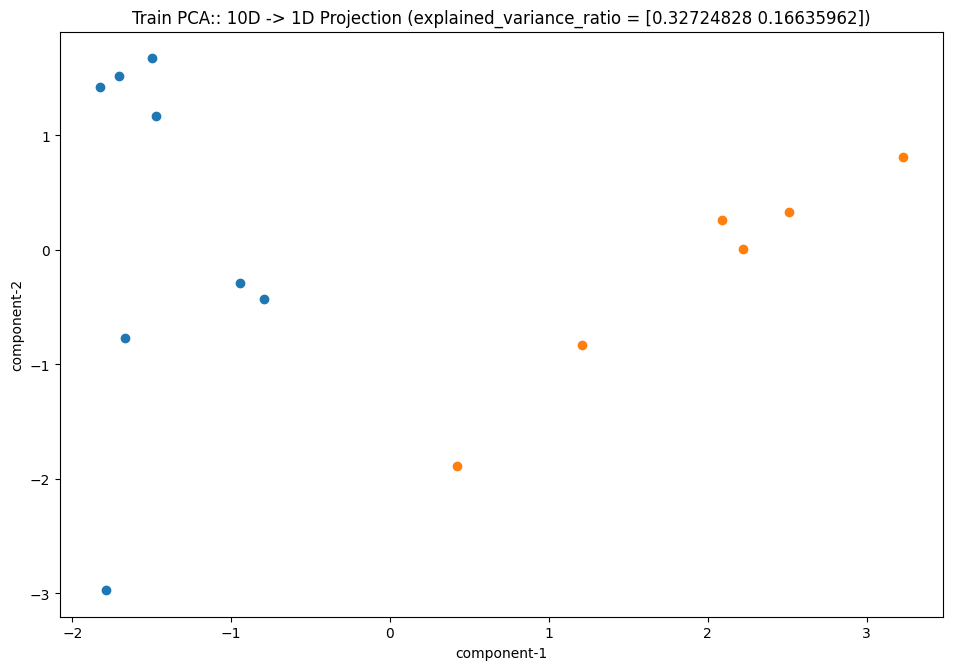

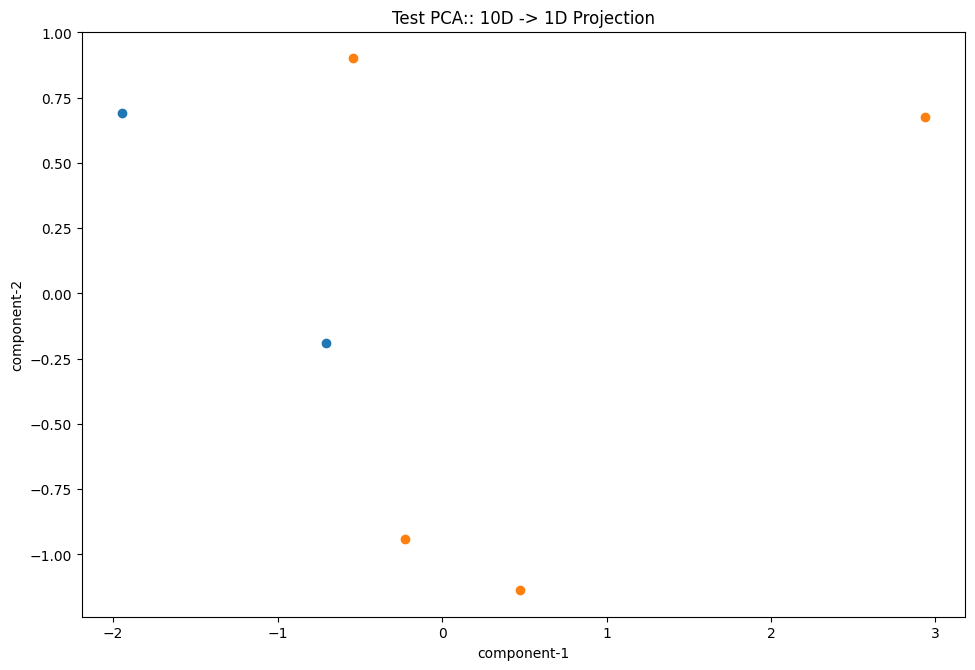

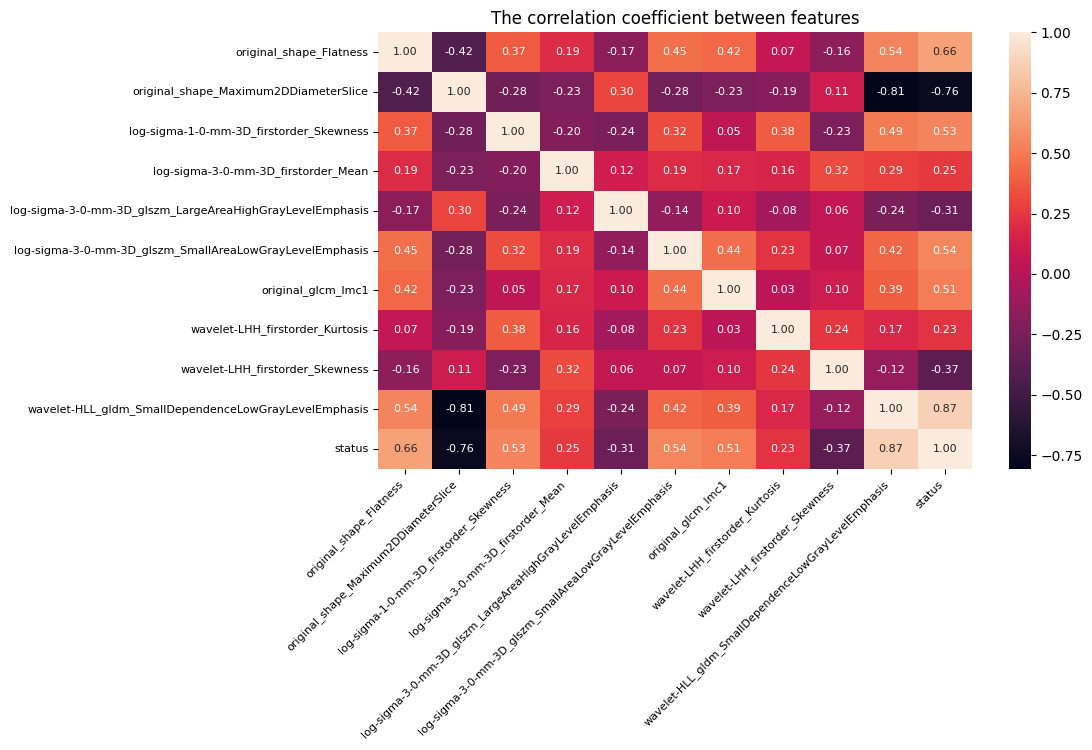

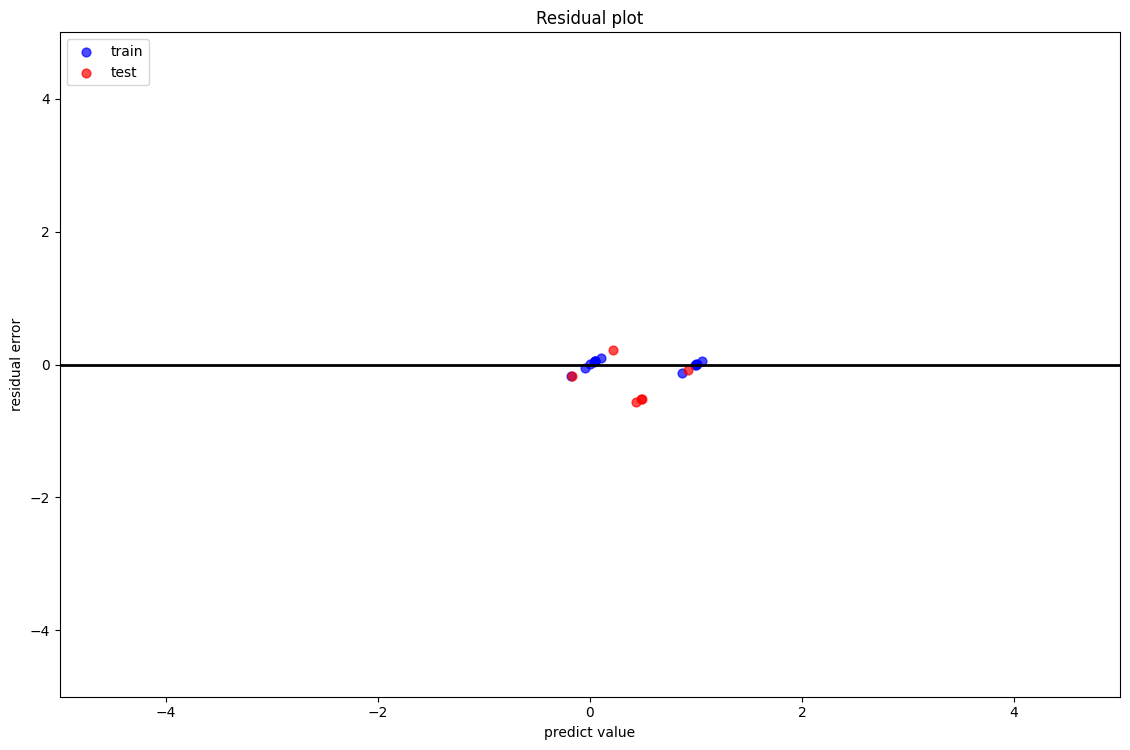

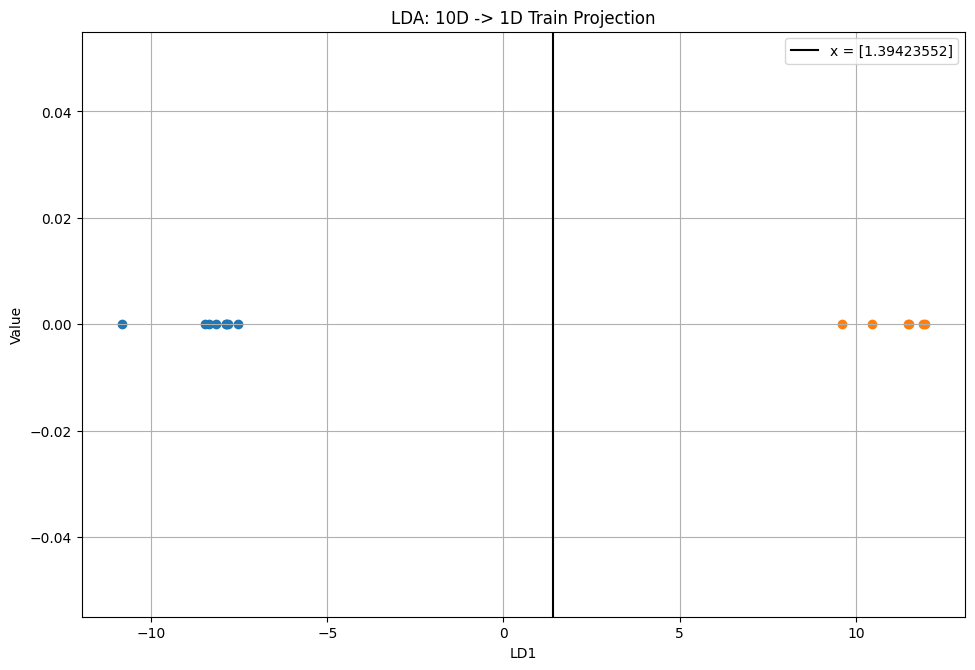

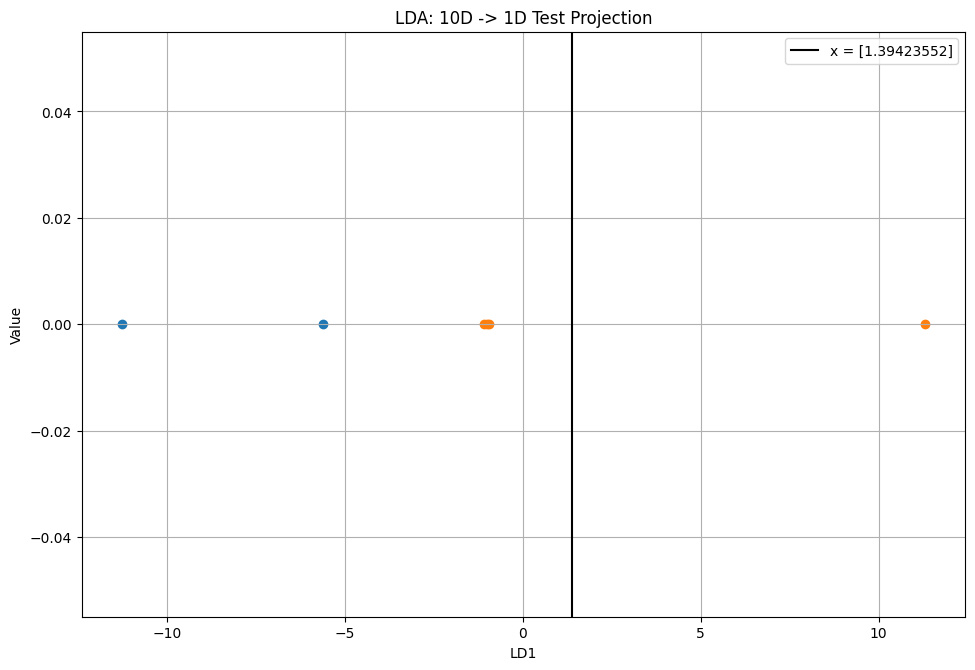

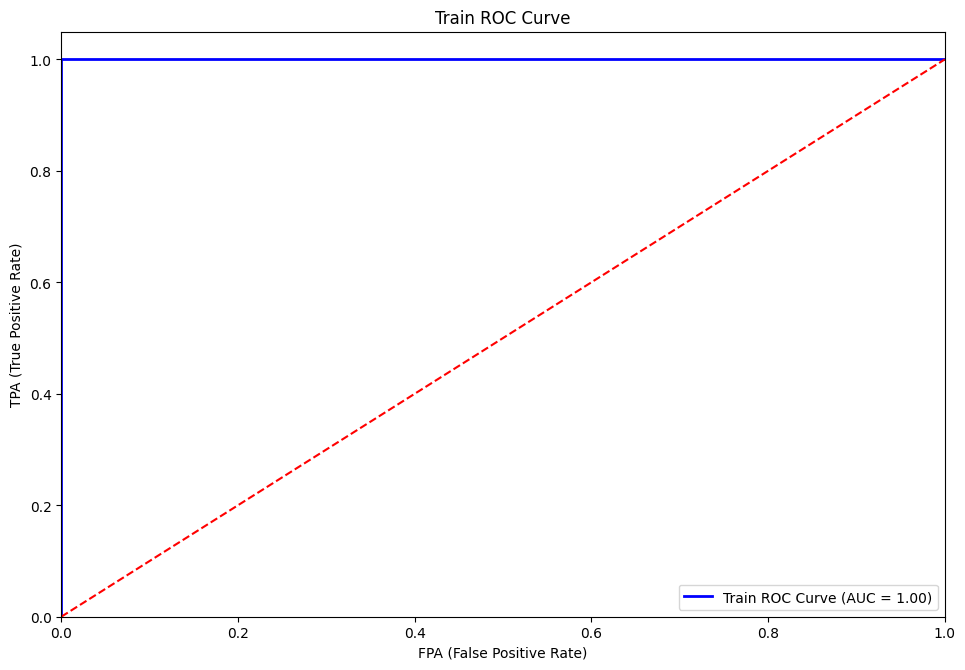

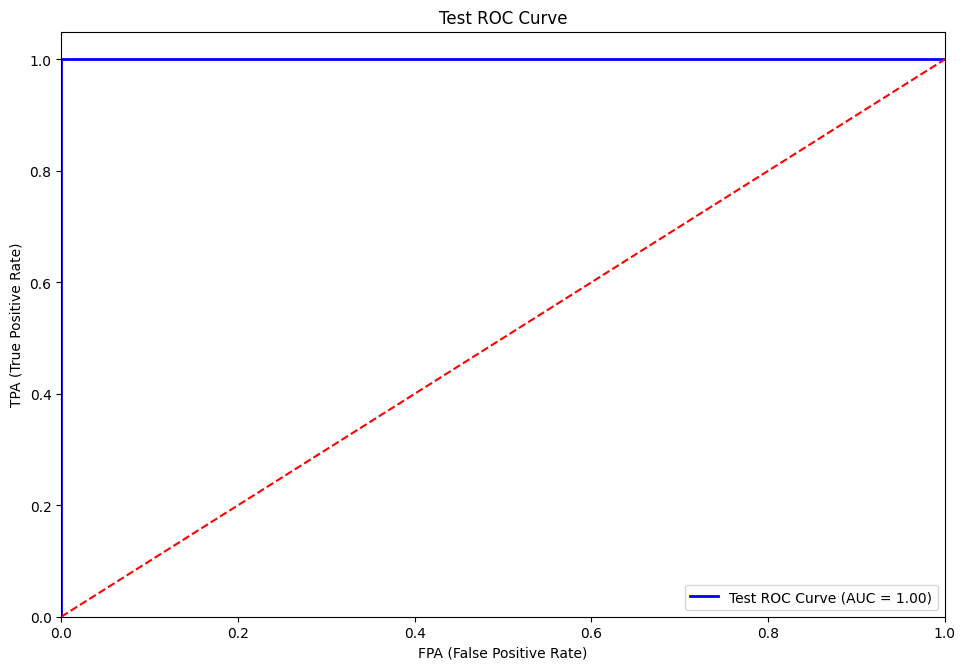

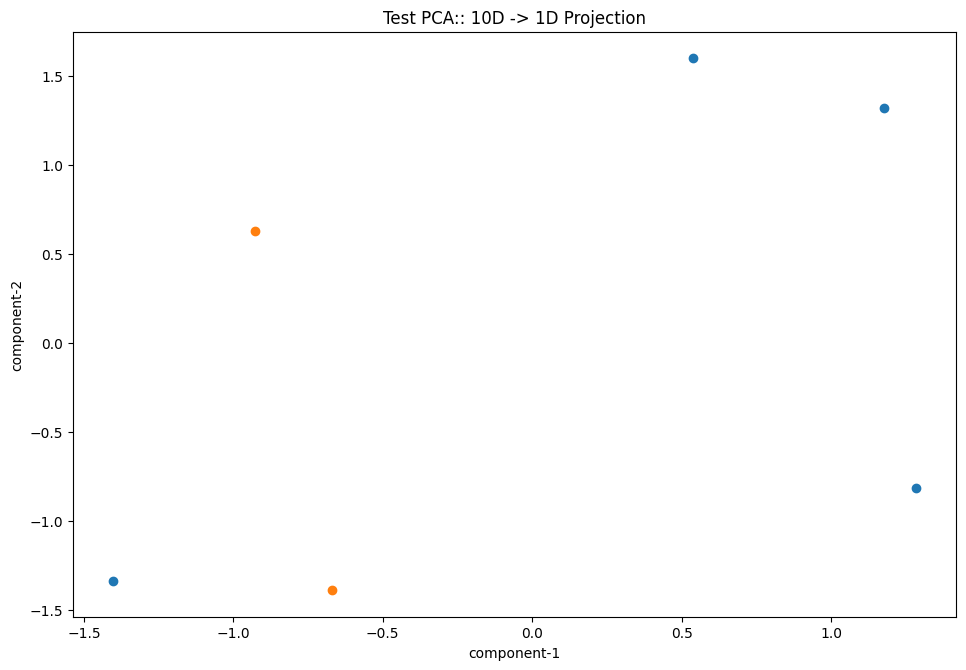

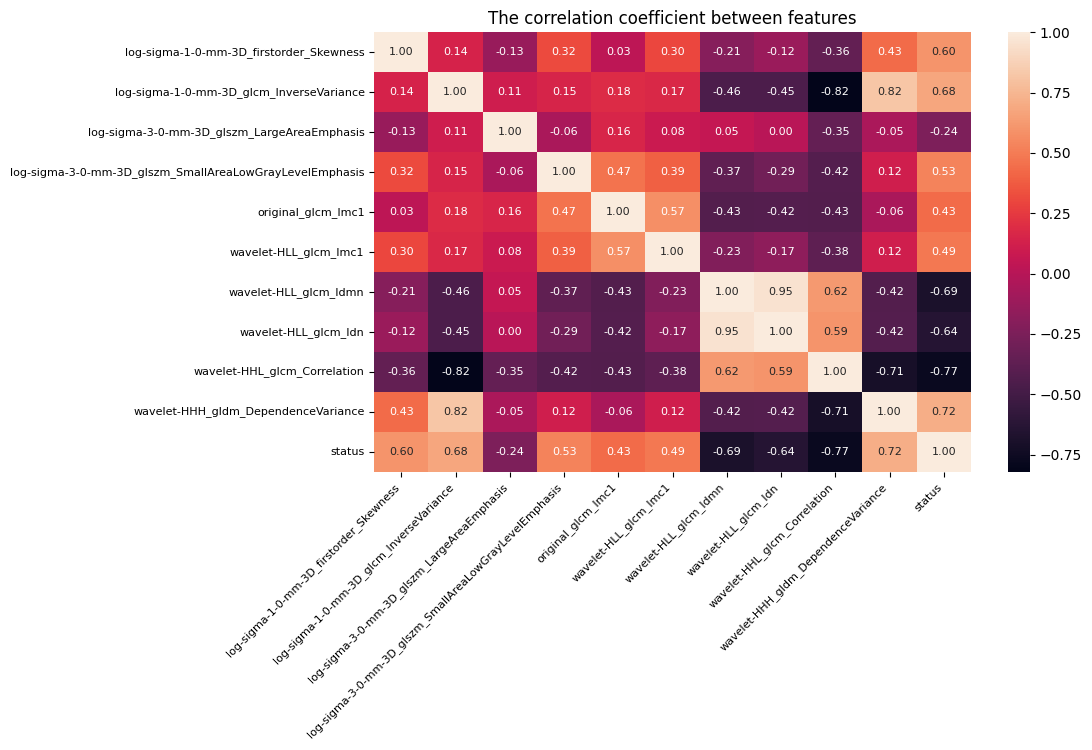

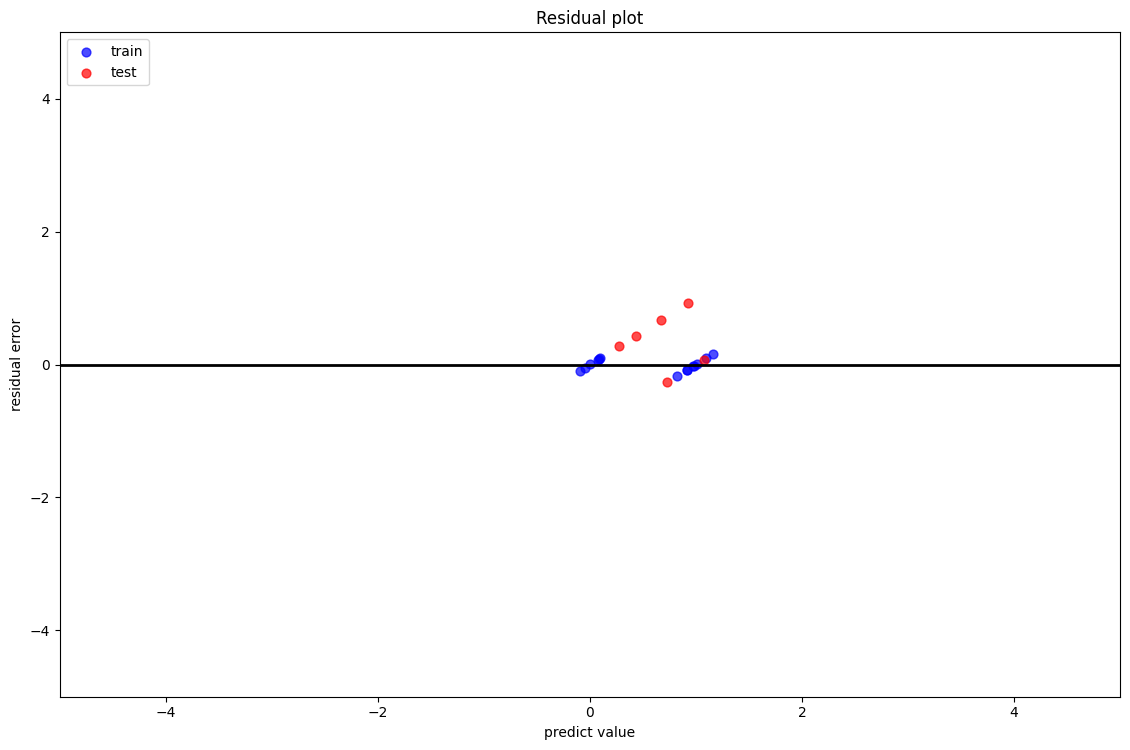

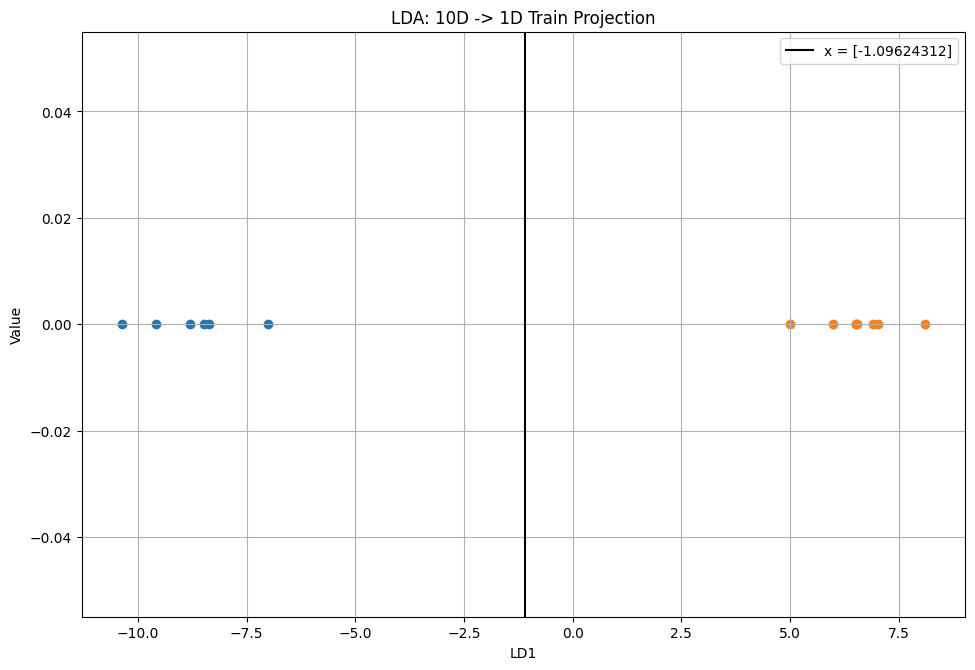

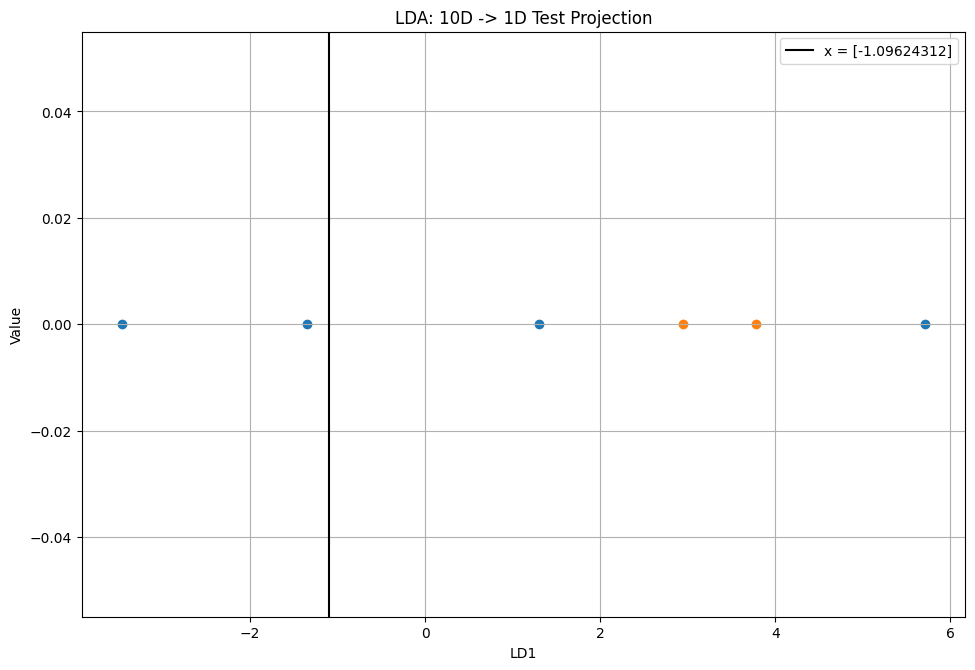

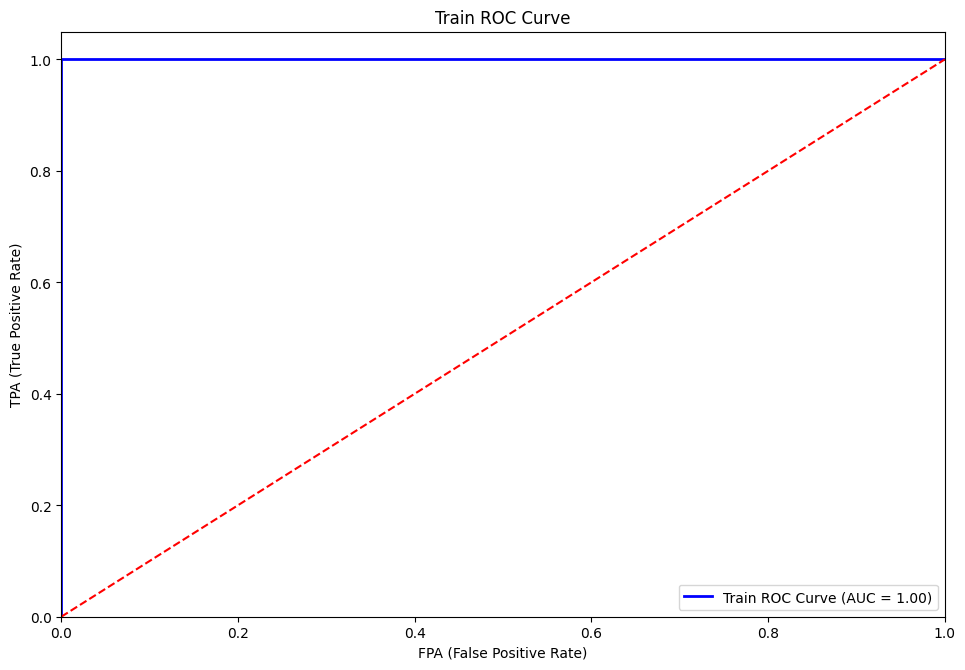

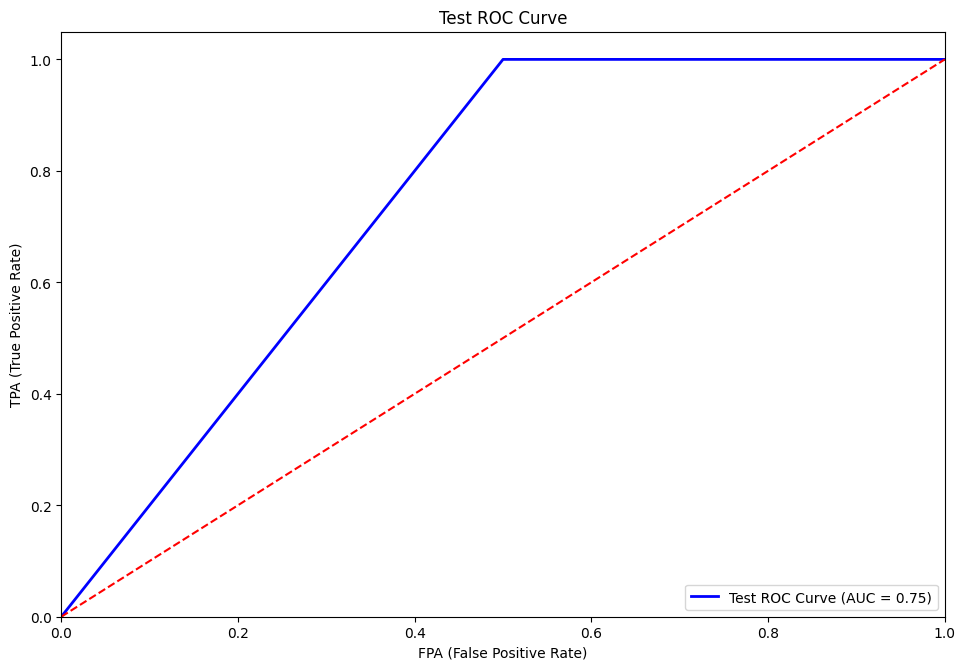

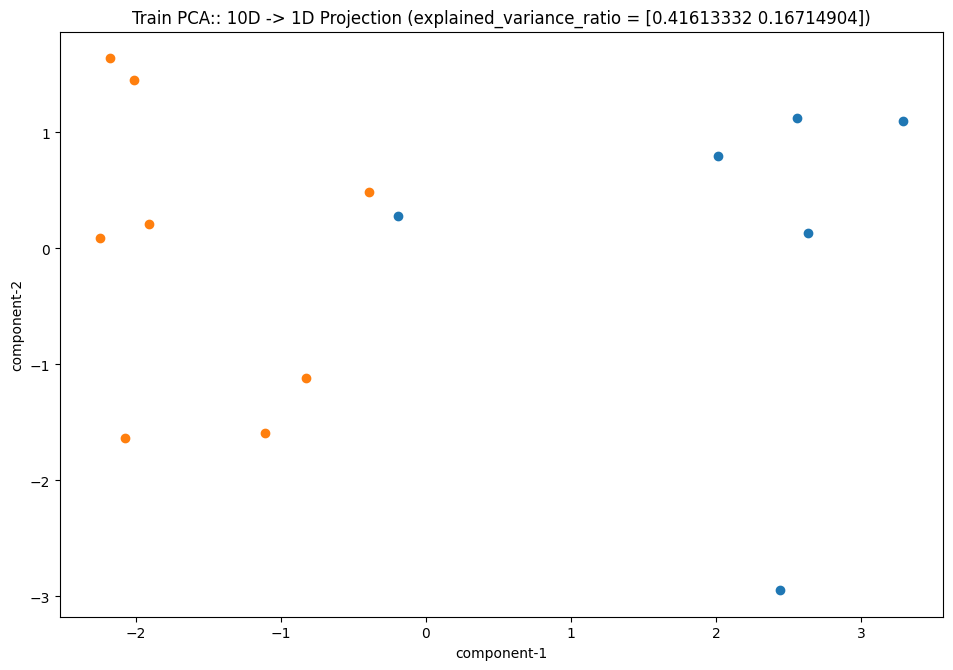

In [1]:
class CollapsibleTab:
    def __init__(self, parent, title1, content1):
        import tkinter as tk
        self.parent = parent
        self.title1 = title1
        self.content1 = content1
        self.is_open = False

        self.tab_frame = tk.Frame(self.parent, bd=1, relief="solid")

        self.title_button1 = tk.Label(self.tab_frame, text=self.title1, anchor="w")
        self.title_button1.grid(row=0,column=0,sticky='w')

        # コンテンツ部分1（最初は非表示）
        self.content_frame1 = tk.Frame(self.tab_frame)
        self.content_entry_1 = tk.Entry(self.content_frame1, width=self.content1)
        self.content_entry_1.grid(row=0,column=1,sticky='w')

        # タブ自体は隠すために、packした後に非表示にする
        self.content_frame1.grid_forget()

    def toggle(self, show):
        # 折り畳みの開閉処理
        if show:
            self.content_frame1.grid(row=0,column=1,sticky='w')
        else:
            self.content_frame1.grid_forget()
        self.is_open = show

    def get_values(self):
        # Entryウィジェットの値を取得する
        criterion_value = self.content_entry_1.get()
        return criterion_value
        

class CollapsibleTabForLasso:
    def __init__(self, parent, title1, content1):
        import tkinter as tk
        self.parent = parent
        self.title1 = title1
        self.content1 = content1
        self.is_open = False

        self.tab_frame = tk.Frame(self.parent, bd=1, relief="solid")

        self.title_button1 = tk.Label(self.tab_frame, text=self.title1, anchor="w")
        self.title_button1.grid(row=0,column=0,sticky='w')

        self.content_frame1 = tk.Frame(self.tab_frame)
        self.content_entry_1 = tk.Entry(self.content_frame1, width=self.content1)
        self.content_entry_1.grid(row=0,column=1,sticky='w')

        self.content_frame1.grid_forget()

    def toggle(self, show):
        # 折り畳みの開閉処理
        if show:
            self.content_frame1.grid(row=0,column=1,sticky='w')
        else:
            self.content_frame1.grid_forget()
            
        self.is_open = show
    
    def get_values(self):
        # Entryウィジェットの値を取得する
        feature_num_value = self.content_entry_1.get()
        return feature_num_value

class Frame_tkinter():
    def __init__(self):
        def part_radiomics(rad_case,rad_radio_dimension,categ1):
            results_list = []
            case_num = categ1
            path = rad_case#カレントディレクトリからのパス
            if rad_radio_dimension == "2D":
                categ2 = "2d_image"
                Dim_3d = False #2dの時はFalse、3Ⅾの時はTrue
            else:
                categ2 = "3d_image"
                Dim_3d = True #2dの時はFalse、3Ⅾの時はTrue
                
            if Dim_3d == True:
              dim = "3d"
            elif Dim_3d == False:
              dim = "2d"
                
            #画像とラベルまでのパス(整理されたリスト型として格納)
            image_path = sorted(glob.glob(path + "/images" + "/*/"))
            label_path = sorted(glob.glob(path + "/labels" + "/*/"))
            
            for i in range(len(image_path)):
              #CT画像ファイルまでのパスを読み込む
              file_path_image = natsorted(glob.glob(image_path[i] + "*"))
              file_path_label = glob.glob(label_path[i] + "*.nrrd")
            
              #読み込んだ画像を入れるリスト
              files = []
              #パス先の画像を順番に読み込む
              for j in range(len(file_path_image)):
                files.append(pydicom.dcmread(file_path_image[j]))
              
              """
              if i == 0 and Dim_3d==True:
                #読み込んだ画像を表示
                m = 1
                fig1 = plt.figure()
                for s in range(0, 100, 10):
                  img_display = files[s].pixel_array
                  ax1 = fig1.add_subplot(2,5,m)
                  ax1.imshow(img_display, cmap="gray")
                  m += 1
                plt.show()
              """
            
              #3次元配列の作成
              img_shape = list(files[0].pixel_array.shape)
            
              #.insert(x, y)
              #x番目にy個の配列を挿入する
              img_shape.insert(0,len(files))
            
              #要素が0で3次元の配列を作成
              img3d = np.zeros(img_shape)

              #DICOM画像を3次元配列へ追加する
              for t, d_img in enumerate(files):
                img2d = d_img.pixel_array
                img3d[t,:,:] = img2d
            
              dcm_image = np.array(img3d)
            
              #ベース画像とマスク画像の読み込み→SimpleITK画像形式へ
              #ベース画像
              image = sitk.GetImageFromArray(dcm_image)
            
              #マスク画像
              #マスクは3Dの場合は全スライス，2Dの場合は1スライスだけ読み込む
              if Dim_3d == True:
                image_mask, header = nrrd.read(file_path_label[0], index_order='C')
                mask = sitk.GetImageFromArray(image_mask)
            
              if Dim_3d == False:
                image_mask, header = nrrd.read(file_path_label[0], index_order='C')
                max = 0
                image_num = 0
                z,_,_ = image_mask.shape
                for num in range(z):
                  if np.sum(image_mask[num]) > max:
                    image_num = num
                image_mask = image_mask[image_num]
                image_mask = image_mask[np.newaxis,:,:]     #imageと合わせるため3次元に
                mask = sitk.GetImageFromArray(image_mask)
                #print("test_shape:",image_mask.shape)

              """
              #読み込めたか表示する
              if i == 0 and Dim_3d == True:
                fig2 = plt.figure()
                ndImg = sitk.GetArrayFromImage(image)
                ndLbl = sitk.GetArrayFromImage(mask)
                ax2 = fig2.add_subplot(1,2,1)
                ax2.imshow(ndImg[48])
                ax2 = fig2.add_subplot(1,2,2)
                ax2.imshow(ndLbl[48])
                plt.show()
              if i == 0 and Dim_3d == False:
                fig2 = plt.figure()
                ndImg = sitk.GetArrayFromImage(image)
                ndLbl = sitk.GetArrayFromImage(mask)
                ax2 = fig2.add_subplot(1,2,1)
                ax2.imshow(ndImg[0])
                ax2 = fig2.add_subplot(1,2,2)
                ax2.imshow(ndLbl[0])
                plt.show()
              """
              
              #マスクの整合性チェックとbbox作成
              bb, correctedMask = imageoperations.checkMask(image, mask)
              if correctedMask is not None:
                mask = correctedMask
              image, mask = imageoperations.cropToTumorMask(image, mask, bb)
            
              #パラメータファイルの読み込み
              param_path = "./testfeatureClass.yaml"
            
              #extractorの定義
              extractor = featureextractor.RadiomicsFeatureExtractor(param_path)
              result = extractor.execute(image,mask)
              #print(type(result))-ordereddict=dict
              #csv書き込み
              if i == 0 and case_num == 'case1':
                  result['status'] = 0
                  results_list.append(result)  # 最初の結果をリストに追加
              else:
                  if case_num == 'case1':
                      result['status'] = 0
                  else:
                      result['status'] = 1
                  results_list.append(result)  # それ以外の結果をリストに追加
              i = i+1
                
            if case_num == 'case1':
                # 結果をデータフレームに変換
                df = pd.DataFrame(results_list)
                # データフレームをCSVファイルに書き込む
                df.to_csv('some.csv', index=False, mode='w', header=True)  # 'w' モードで書き込み、最初にヘッダーも書き込む
            else:
                # 結果をデータフレームに変換
                df = pd.DataFrame(results_list)
                # データフレームをCSVファイルに書き込む
                df.to_csv('some.csv', index=False, mode='a', header=False)  # 'w' モードで書き込み、最初にヘッダーも書き込む
                
        
        def yaml_editor(bol_1_1,fil_name_list,bol_1_2,feature_name_list,boxelsamplesize = 1):
            import yaml
            from yaml import dump, dump_all, safe_dump, safe_dump_all
            from yaml import safe_load, full_load, unsafe_load
            
            with open("./testfeatureClass.yaml") as file:
                yamldata = yaml.safe_load(file)    
            #チェックボックスの結果の取得
            for i in range (len(bol_1_1)):
                if bol_1_1[i].get() == False:#tk.BooleanVarはbool型ではない。BooleanVarの中のbool値を持ってくるのがget()である。
                    del yamldata['imageType'][fil_name_list[i]]
            for i in range (len(bol_1_2)):
                if bol_1_2[i].get() == False:
                    del yamldata['featureClass'][feature_name_list[i]]
            #resampledPixelSpacing
            boxelsamplesize = boxelsamplesize
            boxelsamplesize_foryaml = [boxelsamplesize,boxelsamplesize,boxelsamplesize]
            setting ={'binWidth':25,'label':1,'interpolator':'sitkBSpline','resampledPixelSpacing':boxelsamplesize_foryaml,'weightingNorm':None}
            del yamldata['setting']
            yamldata['setting'] = setting
            with open("./testfeatureClass.yaml",'w') as file:
                result = safe_dump(yamldata,file)
            #print(yamldata)

        def yaml_back():
            import yaml
            from yaml import dump, dump_all, safe_dump, safe_dump_all
            from yaml import safe_load, full_load, unsafe_load
            from pathlib import Path  # ファイルの内容の確認用
            
            setting ={'binWidth':25,'label':1,'interpolator':'sitkBSpline','resampledPixelSpacing':None,'weightingNorm':None}#Noneだとnullになってしまう
            image_1 = {'binWidth':10}
            image_2 =[1.0, 3.0]
            image_3 = {"sigma":image_2}
            imageType ={'Original':{},'Wavelet':image_1,'LoG':image_3}
            image_4 =['Autocorrelation','JointAverage','ClusterProminence','ClusterShade',
                      'ClusterTendency','Contrast','Correlation','DifferenceAverage','DifferenceEntropy',
                      'DifferenceVariance','JointEnergy','JointEntropy','Imc1','Imc2','Idm','Idmn',
                      'Id','Idn','InverseVariance','MaximumProbability','SumEntropy','SumSquares']
            featureClass ={'shape':None,'firstorder':[],'glcm':image_4,'glrlm':None,'glszm':None,'gldm':None,'ngtdm':None}
            param1={'setting':setting,'imageType':imageType,'featureClass':featureClass}
            with open('testfeatureClass.yaml', 'w') as f:
                result = safe_dump(param1,f)  # ファイルに出力,(safe_)dump_allは独立したドキュメントとして書きだすもの、ここでは使わない
            #print(Path('testfeatureClass.yaml').read_text())
        
        def lasso(entry_3, boolean_2_0_1, boolean_2_0_2, testsizeforlasso):
            import numpy as np
            import pandas as pd
            from sklearn.linear_model import Lasso
            from sklearn.preprocessing import StandardScaler
            from sklearn.model_selection import train_test_split
            from sklearn.model_selection import GridSearchCV
            from sklearn.model_selection import LeaveOneOut
            
            import csv

            testsizeforlasso = testsizeforlasso
            #訓練データ（X）作成
            data_file = pd.read_csv('some.csv')
            with open('some.csv') as f:
                reader = csv.reader(f)
                list_2d_1 = [row for row in reader]#2次元リストとして格納
            line_num_2d_1 =[len(i) for i in list_2d_1]#列数取得
            for i in range(len(list_2d_1)):
                del list_2d_1[i][line_num_2d_1[0]-1]#status消し
            #print(line_num_2d_1[0])
            #print(len(list_2d_1[0]))
            pre_list_2d_1 = list_2d_1
            header = list_2d_1[0]
            diagnostics_list = [i for i, col in enumerate(header) if 'diagnostics_' in col]#iにindex,colにheader名でiを取得
            for row in range(len(list_2d_1)):
                for column in sorted(diagnostics_list,reverse=True):#reverseでインデックスのずれを防止
                    del list_2d_1[row][column]#diagnostics消し
            del list_2d_1[0]
            list_2d_1 = pd.DataFrame(list_2d_1)
            #標準化
            std_scaler = StandardScaler()
            std_scaler.fit(list_2d_1)
            list_2d_1 = pd.DataFrame(std_scaler.transform(list_2d_1), columns=list_2d_1.columns)
            """
            print('-----------------list_2d_1-----------------------')
            print(list_2d_1)
            print('-----------------list_2d_1-----------------------')
            """
            #重複消去(同じ列が全部0とか)
            for line in reversed(range(len(list_2d_1.loc[0]))):
                cnt = 0
                #print(len(list_2d_1.loc[0]))
                for row in reversed(range(len(list_2d_1.T.loc[0]))):
                    #print(len(list_2d_1.loc[0]))
                    if list_2d_1.loc[0,line]==list_2d_1.loc[row,line]:
                        #print(list_2d_1.loc[row,line])
                        cnt = cnt + 1
                    else:
                        cnt = cnt
                if cnt == len(list_2d_1.T.loc[0]):
                    del list_2d_1[line]
            #print(list_2d_1)
            list_2d_1 = list_2d_1.to_numpy()
            
            X=np.array(list_2d_1)#ndarray形式、特徴量
            #print(X)
            #feature_list = pd.DataFrame(X)
                        
            #正解データ（y）作成
            with open('some.csv') as f:
                reader = csv.reader(f)
                list_2d_2 =[row for row in reader]
            header_2 = list_2d_2[0]
            status_list = [i for i, col in enumerate(header_2) if 'status' in col]
            #print(status_list)
            list_2d_2 = [[i[status_list[0]]] for i in list_2d_2]
            del list_2d_2[0]
            #print(list_2d_2)
            y = np.array(list_2d_2)
            #print(y)
            y = np.array(y, dtype=float)
            #print(np.any(np.isnan(y)))

            if boolean_2_0_2 ==True:#テストサイズを決定するかの分岐
                if testsizeforlasso==0 or testsizeforlasso==1 or testsizeforlasso==0.0 or testsizeforlasso==1.0:#分割するかの分岐
                    # αの範囲を設定
                    param_grid = {'alpha': np.logspace(-4, 0, 100)}
                    # GridSearchCVを使用して最適なαを探索
                    grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
                    grid_search.fit(X, y)
                    # 最適なαを表示
                    #print(f"Best alpha: {grid_search.best_params_['alpha']}")
                    num_grids = grid_search.best_params_['alpha']
                    """
                    print('----------------------------------------------------------------------------')
                    print(num_grids)
                    print(type(num_grids))
                    """
                    lasso_grids = Lasso(alpha=num_grids)
                    model_grids = lasso_grids.fit(X,y)
                    results = pd.DataFrame(model_grids.coef_)#op
                    """
                    print('----------------------------------------------------------------------------')
                    print(results)
                    print(len(results[(results[0]!=0.0)&(results[0]!=-0.0)]))
                    print('----------------------------------------------------------------------------')
                    """
                    feature_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                    
                    if boolean_2_0_1 == True:
                        #特徴量の個数
                        feature_num = entry_3
                        #特徴量数の選別
                        first_num_max = 1
                        num_max = first_num_max
                        num_min = 0
                        cnt = 0
                        while True:
                            if cnt == 0:
                                present_alpha = num_grids
                                #print(present_alpha)
                                lasso_reg=Lasso(alpha=present_alpha)
                            else:
                                present_alpha = (num_max + num_min)/2.0
                                #print(present_alpha)#
                                lasso_reg=Lasso(alpha=present_alpha)
                            model = lasso_reg.fit(X,y)
                            results = pd.DataFrame(model.coef_)
                            value_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                            #print(value_num)
                            #保険（０側のエラー対策もう一考）
                            if (present_alpha==first_num_max) or (present_alpha==0):
                                first_num_max = first_num_max*(10)
                                num_max = first_num_max
                                num_min = 0
                            elif value_num < feature_num:
                                num_max = present_alpha
                            elif value_num > feature_num:
                                num_min = present_alpha
                            else:
                                break
                            cnt += 1
        
                    #ファイル作成準備
                    value_results = results[(results[0]!=0.0)&(results[0]!=-0.0)]
                    #value_results_list = [value_results[0][i] for i in value_index_list]
                    #print(value_results_list)
                    value_index_list = [value_results.index[i] for i in range(feature_num)]
                    value_index_st_list = value_index_list+['status']
                    value_header_list = [header[i] for i in value_index_list]
                    value_header_list_2 = value_header_list +['status']
                    value_feature_list = pd.DataFrame(list_2d_1)
                    value_feature_list["status"] = [list_2d_2[i][0] for i in range(len(list_2d_2))]
                    value_feature_list_2 = value_feature_list[value_index_st_list]
                    value_feature_list_2.columns =  value_header_list_2
                    #print(value_feature_list_2)#
                    #選択された特徴量をcsvとして出力
                    value_feature_list_2.to_csv('./all_lassofeature.csv', mode='w',index=False)

                else:
                    #学習データ/テストデータ分割
                    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=testsizeforlasso,stratify=y)#test_size＝テストに使う全データの内の割合
                    y_train = y_train.astype(int)
                    y_test = y_test.astype(int)
    
                    # αの範囲を設定
                    param_grid = {'alpha': np.logspace(-4, 0, 100)}
                    # GridSearchCVを使用して最適なαを探索
                    grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
                    grid_search.fit(x_train, y_train)
                    # 最適なαを表示
                    #print(f"Best alpha: {grid_search.best_params_['alpha']}")
                    num_grids = grid_search.best_params_['alpha']
                    """
                    print('----------------------------------------------------------------------------')
                    print(num_grids)
                    print(type(num_grids))
                    """
                    lasso_grids = Lasso(alpha=num_grids)
                    model_grids = lasso_grids.fit(x_train,y_train)
                    results = pd.DataFrame(model_grids.coef_)#op
                    """
                    print('-------------------------------results---------------------------------------------')
                    print(results)
                    print(len(results[(results[0]!=0.0)&(results[0]!=-0.0)]))
                    print('----------------------------------------------------------------------------')
                    """
                    
                    feature_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                    
                    if boolean_2_0_1 == True:
                        #特徴量の個数
                        feature_num = entry_3
                        #特徴量数の選別
                        first_num_max = 1
                        num_max = first_num_max
                        num_min = 0
                        cnt = 0
                        while True:
                            if cnt == 0:
                                present_alpha = num_grids
                                #print(present_alpha)
                                lasso_reg=Lasso(alpha=present_alpha)
                            else:
                                present_alpha = (num_max + num_min)/2.0
                                #print(present_alpha)#
                                lasso_reg=Lasso(alpha=present_alpha)
                            model = lasso_reg.fit(x_train,y_train)
                            results = pd.DataFrame(model.coef_)
                            value_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                            #print(value_num)
                            #保険（０側のエラー対策もう一考）
                            if (present_alpha==first_num_max) or (present_alpha==0):
                                first_num_max = first_num_max*(10)
                                num_max = first_num_max
                                num_min = 0
                            elif value_num < feature_num:
                                num_max = present_alpha
                            elif value_num > feature_num:
                                num_min = present_alpha
                            else:
                                break
                            cnt += 1
        
                    #ファイル作成準備(train)
                    value_results = results[(results[0]!=0.0)&(results[0]!=-0.0)]
                    #value_results_list = [value_results[0][i] for i in value_index_list]
                    #print(value_results_list)
                    value_index_list = [value_results.index[i] for i in range(feature_num)]
                    value_header_list = [header[i] for i in value_index_list]
                    value_header_list_2 = value_header_list +['status']
                    value_index_st_list = value_index_list+['status']
                    value_feature_list = pd.DataFrame(x_train)
                    value_feature_list["status"] = [y_train[i][0] for i in range(len(y_train))]
                    value_feature_list_2 = value_feature_list[value_index_st_list]
                    value_feature_list_2.columns =  value_header_list_2
                    #print(value_feature_list_2)#
                    #選択された特徴量をcsvとして出力
                    value_feature_list_2.to_csv('./train_lassofeature.csv', mode='w',index=False)
                
                    #ファイル作成準備(test)
                    value_index_list = [value_results.index[i] for i in range(feature_num)]
                    value_header_list = [header[i] for i in value_index_list]
                    value_header_list_2 = value_header_list +['status']
                    value_index_st_list = value_index_list+['status']
                    value_feature_list = pd.DataFrame(x_test)
                    value_feature_list["status"] = [y_test[i][0] for i in range(len(y_test))]
                    value_feature_list_2 = value_feature_list[value_index_st_list]
                    value_feature_list_2.columns =  value_header_list_2
                    #print(value_feature_list_2)#
                    #選択された特徴量をcsvとして出力
                    value_feature_list_2.to_csv('./test_lassofeature.csv', mode='w',index=False)
                    
            else:#自動的にtestsize=0.3で分割
                #学習データ/テストデータ分割
                x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=testsizeforlasso,stratify=y)#test_size＝テストに使う全データの内の割合
                y_train = y_train.astype(int)
                y_test = y_test.astype(int)

                # αの範囲を設定
                param_grid = {'alpha': np.logspace(-4, 0, 100)}
                # GridSearchCVを使用して最適なαを探索
                grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=LeaveOneOut(), scoring='neg_mean_squared_error')
                grid_search.fit(x_train, y_train)
                # 最適なαを表示
                #print(f"Best alpha: {grid_search.best_params_['alpha']}")
                num_grids = grid_search.best_params_['alpha']
                """
                print('----------------------------------------------------------------------------')
                print(num_grids)
                print(type(num_grids))
                """
                lasso_grids = Lasso(alpha=num_grids)
                model_grids = lasso_grids.fit(x_train,y_train)
                results = pd.DataFrame(model_grids.coef_)#op
                """
                print('-------------------------------results---------------------------------------------')
                print(results)
                print(len(results[(results[0]!=0.0)&(results[0]!=-0.0)]))
                print('----------------------------------------------------------------------------')
                """
                
                feature_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])

                if boolean_2_0_1 == True:
                    #特徴量の個数
                    feature_num = entry_3
                    #特徴量数の選別
                    first_num_max = 1
                    num_max = first_num_max
                    num_min = 0
                    cnt = 0
                    while True:
                        if cnt == 0:
                            present_alpha = num_grids
                            #print(present_alpha)
                            lasso_reg=Lasso(alpha=present_alpha)
                        else:
                            present_alpha = (num_max + num_min)/2.0
                            #print(present_alpha)#
                            lasso_reg=Lasso(alpha=present_alpha)
                        model = lasso_reg.fit(x_train,y_train)
                        results = pd.DataFrame(model.coef_)
                        value_num = len(results[(results[0]!=0.0)&(results[0]!=-0.0)])
                        #print(value_num)
                        #保険（０側のエラー対策もう一考）
                        if (present_alpha==first_num_max) or (present_alpha==0):
                            first_num_max = first_num_max*(10)
                            num_max = first_num_max
                            num_min = 0
                        elif value_num < feature_num:
                            num_max = present_alpha
                        elif value_num > feature_num:
                            num_min = present_alpha
                        else:
                            break
                        cnt += 1
    
                #ファイル作成準備(train)
                value_results = results[(results[0]!=0.0)&(results[0]!=-0.0)]
                #value_results_list = [value_results[0][i] for i in value_index_list]
                #print(value_results_list)
                value_index_list = [value_results.index[i] for i in range(feature_num)]
                value_header_list = [header[i] for i in value_index_list]
                value_header_list_2 = value_header_list +['status']
                value_index_st_list = value_index_list+['status']
                value_feature_list = pd.DataFrame(x_train)
                value_feature_list["status"] = [y_train[i][0] for i in range(len(y_train))]
                value_feature_list_2 = value_feature_list[value_index_st_list]
                value_feature_list_2.columns =  value_header_list_2
                #print(value_feature_list_2)#
                #選択された特徴量をcsvとして出力
                value_feature_list_2.to_csv('./train_lassofeature.csv', mode='w',index=False)
                
                #ファイル作成準備(test)
                value_index_list = [value_results.index[i] for i in range(feature_num)]
                value_header_list = [header[i] for i in value_index_list]
                value_header_list_2 = value_header_list +['status']
                value_index_st_list = value_index_list+['status']
                value_feature_list = pd.DataFrame(x_test)
                value_feature_list["status"] = [y_test[i][0] for i in range(len(y_test))]
                value_feature_list_2 = value_feature_list[value_index_st_list]
                value_feature_list_2.columns =  value_header_list_2
                #print(value_feature_list_2)#
                #選択された特徴量をcsvとして出力
                value_feature_list_2.to_csv('./test_lassofeature.csv', mode='w',index=False)

        #グラフの軸ラベルを入力、標準化済み
        def Pca_input():
            import csv
            import pandas as pd
            import numpy as np
            import matplotlib.pyplot as plt
            from sklearn.decomposition import PCA
            from sklearn.preprocessing import StandardScaler
            from sklearn import datasets

            #trainデータによるPCA
            train_csv_file = "train_lassofeature.csv"
            test_csv_file = "test_lassofeature.csv"
            categ1 = "0"
            categ2 = "1"
            
            #csvファイルの読み込み
            train_file_list=[]
            test_file_list=[]
            
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./train_lassofeature.csv" ,encoding = "utf-8-sig") as f:
              train_file = csv.reader(f)
              for row in train_file:
                train_file_list.append(row)
                #print(row)
            with open("./test_lassofeature.csv" ,encoding = "utf-8-sig") as f:
              test_file = csv.reader(f)
              for row in test_file:
                test_file_list.append(row)
                #print(row)
            
            #pandasによりデータフレームにする
            train_df = pd.DataFrame(train_file_list)
            test_df = pd.DataFrame(test_file_list)
            #df.head()
            #print(f"df:{df}")
            
            #file_listの列数
            list_column = train_df.shape[1]
            #print(f"list_column:{list_column}")
            #特徴量名の行とtarget列を除いた数値だけ取り出す
            train_features = train_df.iloc[1:, :list_column-1]
            test_features = test_df.iloc[1:, :list_column-1]
            #print(f"features:{features}")
            #特徴量の名前を取得
            feature_name = train_df.iloc[:1, :list_column-1]
            #print(f"feature_name:{feature_name}")

            #target(組織型名)の名前を取得=statusの値を取得
            train_target_name = train_df.iloc[1:, -1]
            test_target_name = test_df.iloc[1:, -1]
            #print(f"target_name:{target_name}")
            #targetを0または1にする
            #ここではcateg1を0，categ2を1とする
            train_targets = []
            test_targets = []
            for i in range(len(train_target_name)):
              if train_target_name[i+1]==categ1:#strとして認識されるからcategに”””が必要
                train_targets.append(0)
              elif train_target_name[i+1]==categ2:
                train_targets.append(1)
            train_targets = np.array(train_targets)
            for i in range(len(test_target_name)):
              if test_target_name[i+1]==categ1:#strとして認識されるからcategに”””が必要
                test_targets.append(0)
              elif test_target_name[i+1]==categ2:
                test_targets.append(1)
            test_targets = np.array(test_targets)
            
            #データを標準化
            x_scaled_train = StandardScaler().fit_transform(train_features)
            x_scaled_test = StandardScaler().fit_transform(test_features)
            #print(x_scaled)

            #主成分の数を2にしてPCAモデルを生成・・・入力できるようにする
            #if n_components == None:
            #    n_components=2
            #    return n_components
            pca = PCA(n_components = 2)
            #fit()メソッドで主成分得点を取得
            model_pca = pca.fit(x_scaled_train)
            train_x_transformed = model_pca.transform(x_scaled_train)
            test_x_transformed = model_pca.transform(x_scaled_test)
            """
            print(type(train_x_transformed))
            print(pd.DataFrame(train_x_transformed))
            """
            x_num = len(pd.DataFrame(x_scaled_train).T[0])
            
            #csv作成
            pca_path = 'result/pca_result.csv'
            train_pca_coordinates = pd.DataFrame(["train_pca_coordinates"])
            train_pca_coordinates.to_csv(pca_path, mode='w', index=False)
            train_x_transformed = pd.DataFrame(train_x_transformed)
            train_x_transformed.to_csv(pca_path, mode='a', index=False, header=False)#座標
            test_pca_coordinates = pd.DataFrame(["test_pca_coordinates"])
            test_pca_coordinates.to_csv(pca_path, mode='a', index=False, header=False)
            test_x_transformed = pd.DataFrame(test_x_transformed)
            test_x_transformed.to_csv(pca_path, mode='a', index=False, header=False)#座標
            explained_variance_ratio = pd.DataFrame(["explained_variance_ratio"])
            explained_variance_ratio.to_csv(pca_path, mode='a', index=False, header = False)
            explained_variance_ratio_val = pd.DataFrame(model_pca.explained_variance_ratio_)
            explained_variance_ratio_val.to_csv(pca_path, mode='a', index=False, header = False)
            
            return model_pca, train_x_transformed, test_x_transformed, train_targets, test_targets, x_num, model_pca.explained_variance_ratio_

        def linear_reg(criterion=1.2):
            #モジュールのインポート
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.linear_model import LinearRegression
            from sklearn.model_selection import train_test_split
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            #csvファイルの読み込み
            train_file_name = "train_lassofeature.csv"
            test_file_name = "test_lassofeature.csv"
            train_file_list = []
            test_file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため(train)
            with open("./" + train_file_name,encoding = "utf-8-sig") as f:
              train_file = csv.reader(f)
              for row in train_file:
                train_file_list.append(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            train_file_array = np.array(train_file_list)
            train_num = len(train_file_array[0:1].flatten())    #特徴量名の行の数
            #test
            with open("./" + test_file_name,encoding = "utf-8-sig") as f:
              test_file = csv.reader(f)
              for row in test_file:
                test_file_list.append(row)
            test_file_array = np.array(test_file_list)
            test_num = len(test_file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量(train)
            train_data = train_file_array[1:,:train_num-1]
            train_data = train_data.astype(np.float64)
            train_df = pd.DataFrame(train_data)
            #特徴量名
            train_df.columns = (train_file_array[0:1,:train_num-1]).flatten()
            #目的変数
            train_df["status"] = train_file_array[1:,train_num-1:train_num]
            train_df["status"] = train_df["status"].astype(np.float64)
            #特徴量(test)
            test_data = test_file_array[1:,:test_num-1]
            test_data = test_data.astype(np.float64)
            test_df = pd.DataFrame(test_data)
            #特徴量名
            test_df.columns = (test_file_array[0:1,:test_num-1]).flatten()
            #目的変数
            test_df["status"] = test_file_array[1:,test_num-1:test_num]
            test_df["status"] = test_df["status"].astype(np.float64)

            #変数定義
            x_train = train_df[train_df.columns[:-1].values]
            #多重共線性の考慮
            # 相関係数行列の絶対値を取得
            corr_matrix = x_train.corr().abs()    
            # 上三角行列を取得
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            # 指定域以上の相関係数の絶対値を有する列名をリストに格納
            list_drop = [column for column in upper.columns if any(upper[column] > criterion)]
            # 特徴量の削除
            x_train = x_train.drop(list_drop, axis=1)
            #display(x)
            #test側のdrop
            x_test = test_df[test_df.columns[:-1].values]
            x_test = x_test.drop(list_drop, axis=1)
            #列数の取得
            x_num = len(x_test.T[0])
            #目的変数の定義
            y_train = train_df["status"].values
            y_test = test_df["status"].values
            
            #重回帰のインスタンス
            model_multi = LinearRegression()
            #モデルの学習
            model_multi.fit(x_train,y_train)
            #予測値（学習データ）
            y_train_pred = model_multi.predict(x_train)
            #予測値（テストデータ）
            y_test_pred = model_multi.predict(x_test)
            #偏回帰係数
            coef = pd.DataFrame(model_multi.coef_.reshape(1,len(x_train.columns)),columns=x_train.columns)
            #print(coef)

            #csv作成
            linearreg_path = "result/regression_result.csv"
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(linearreg_path, mode="w", index = False)
            x_train_featuresafterdrop = pd.DataFrame(x_train)
            x_train_featuresafterdrop.to_csv(linearreg_path, mode="a", index = False)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            x_test_featuresafterdrop = pd.DataFrame(x_test)
            x_test_featuresafterdrop.to_csv(linearreg_path, mode="a", index = False)
            coef_tag = pd.DataFrame(["coefficient by train"])
            coef_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            coef.to_csv(linearreg_path, mode="a", index = False)
            intercept_tag = pd.DataFrame(["intercept"])
            intercept_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            intercept = pd.DataFrame([model_multi.intercept_])
            intercept.to_csv(linearreg_path, mode="a", index = False, header = False)
            r2_tag = pd.DataFrame([["r2_train","r2_test"]])
            r2_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            r2 = pd.DataFrame([[r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)]])
            r2.to_csv(linearreg_path, mode="a", index = False, header = False)
            rmse_tag =pd.DataFrame([["rmse_train", "rmse_test"]])
            rmse_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            rmse=pd.DataFrame([[mean_squared_error(y_train,y_train_pred,squared=False), mean_squared_error(y_test,y_test_pred,squared=False)]])
            rmse.to_csv(linearreg_path, mode="a", index = False, header = False)
            train_residual_tag = pd.DataFrame(["train_residual"])
            train_residual_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            train_residual = pd.DataFrame([[i,j] for i,j in zip(y_train_pred,y_train_pred - y_train)])
            train_residual.to_csv(linearreg_path, mode="a", index = False, header = False)
            test_residual_tag = pd.DataFrame(["test_residual"])
            test_residual_tag.to_csv(linearreg_path, mode="a", index = False, header = False)
            test_residual = pd. DataFrame([[i,j] for i,j in zip(y_test_pred,y_test_pred - y_test)])
            test_residual.to_csv(linearreg_path, mode="a", index = False, header = False)

            return x_train, x_test, y_train, y_test, train_df, y_train_pred, y_test_pred

        def roc_lda():
            #mainのプログラム
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            from sklearn.model_selection import KFold, cross_val_score
            from sklearn.metrics import confusion_matrix
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            from sklearn.metrics import roc_curve, auc
            from sklearn.metrics import roc_auc_score
            from sklearn.preprocessing import StandardScaler
            
            #csvファイルの読み込み
            train_file_name = "train_lassofeature.csv"
            test_file_name = "test_lassofeature.csv"
            train_file_list = []
            test_file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため(train)
            with open("./" + train_file_name,encoding = "utf-8-sig") as f:
              train_file = csv.reader(f)
              for row in train_file:
                train_file_list.append(row)
                #print(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            train_file_array = np.array(train_file_list)
            train_num = len(train_file_array[0:1].flatten())    #特徴量名の行の数
            #test
            with open("./" + test_file_name,encoding = "utf-8-sig") as f:
              test_file = csv.reader(f)
              for row in test_file:
                test_file_list.append(row)
                #print(row)
            test_file_array = np.array(test_file_list)
            test_num = len(test_file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量(train)
            train_data = train_file_array[1:,:train_num-1]
            train_data = train_data.astype(np.float64)
            train_df = pd.DataFrame(train_data)
            #特徴量名
            train_df.columns = (train_file_array[0:1,:train_num-1]).flatten()
            #目的変数
            train_df["status"] = train_file_array[1:,train_num-1:train_num]
            train_df["status"] = train_df["status"].astype(np.float64)
            #特徴量(test)
            test_data = test_file_array[1:,:test_num-1]
            test_data = test_data.astype(np.float64)
            test_df = pd.DataFrame(test_data)
            #特徴量名
            test_df.columns = (test_file_array[0:1,:test_num-1]).flatten()
            #目的変数
            test_df["status"] = test_file_array[1:,test_num-1:test_num]
            test_df["status"] = test_df["status"].astype(np.float64)
            
            #変数定義
            x_train = train_df[train_df.columns[:-1].values]
            x_test = test_df[test_df.columns[:-1].values]
            #列数の取得
            x_num = len(x_test.T[0])
            #目的変数の定義
            y_train = train_df["status"].values
            y_test = test_df["status"].values

            # LDAのインスタンスを作成（次元削減後は1次元に）
            lda = LinearDiscriminantAnalysis(n_components=1)
            
            # LDAで次元削減
            lda.fit(x_train, y_train)
            #lda_transform = lda.transform(x)

            lda_transform_train = lda.transform(x_train)
            lda_transform_test = lda.transform(x_test)
            
            #決定境界算出==2d dataなので重心求めるだけ
            trans_train_y0 = lda.transform(x_train[y_train==0])
            trans_train_y1 = lda.transform(x_train[y_train==1])
            lda_train_decisionboundary =((sum(trans_train_y0)/len(trans_train_y0))+(sum(trans_train_y1)/len(trans_train_y1)))/2

            # 予測
            #y_pred = lda.predict(x)
            y_train_pred = lda.predict(x_train)
            y_test_pred = lda.predict(x_test)
            
            #ROC
            # 混同行列の作成
            #TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()
            TN_train, FP_train, FN_train, TP_train = confusion_matrix(y_train, y_train_pred).ravel()
            TN_test, FP_test, FN_test, TP_test = confusion_matrix(y_test, y_test_pred).ravel()
            
            # 感度と特異度の計算
            #sensitivity = TP / (TP + FN)
            #specificity = TN / (TN + FP)
            sensitivity_train = TP_train / (TP_train + FN_train)
            specificity_train = TN_train / (TN_train + FP_train)
            sensitivity_test = TP_test / (TP_test + FN_test)
            specificity_test = TN_test / (TN_test + FP_test)

            # テストデータの予測確率を取得
            #scores = lda.predict_proba(x)[:, 1]
            scores_train = lda.predict_proba(x_train)[:, 1]
            scores_test = lda.predict_proba(x_test)[:, 1]  # positive classの確率を取得
                        
            # ROC曲線の計算
            #fpr, tpr, thresholds = roc_curve(y, scores)
            #roc_auc = auc(fpr, tpr)  # AUCを計算
            fpr_train, tpr_train, thresholds_train = roc_curve(y_train, scores_train)
            roc_auc_train = auc(fpr_train, tpr_train)  # AUCを計算
            fpr_test, tpr_test, thresholds_test = roc_curve(y_test, scores_test)
            roc_auc_test = auc(fpr_test, tpr_test)  # AUCを計算
            
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            youden_index_train = tpr_train - fpr_train
            optimal_threshold_index_youden_train = np.argmax(youden_index_train)
            optimal_threshold_youden_train = thresholds_train[optimal_threshold_index_youden_train]
            youden_index_test = tpr_test - fpr_test
            optimal_threshold_index_youden_test = np.argmax(youden_index_test)
            optimal_threshold_youden_test = thresholds_test[optimal_threshold_index_youden_test]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            distance_train = np.sqrt(fpr_train**2 + (tpr_train - 1)**2)
            optimal_threshold_index_min_train = np.argmin(distance_train)  # 最小距離のインデックス
            optimal_threshold_min_train = thresholds_train[optimal_threshold_index_min_train]
            distance_test = np.sqrt(fpr_test**2 + (tpr_test - 1)**2)
            optimal_threshold_index_min_test = np.argmin(distance_test)  # 最小距離のインデックス
            optimal_threshold_min_test = thresholds_test[optimal_threshold_index_min_test]

            #csv作成
            roclda_path = "result/roclda_result.csv"
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(roclda_path, mode= "w",index=False, header=False)
            x_train.to_csv(roclda_path, mode= "a",index=False, header=True)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            x_test.to_csv(roclda_path, mode= "a",index=False, header=True)

            lda_transform_train_tag = pd.DataFrame(["lda_transform_train_coordinate"])
            lda_transform_train_tag.to_csv(roclda_path, mode= "a", index=False, header=False)
            lda_transform_train_val = pd.DataFrame(lda_transform_train)
            lda_transform_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            lda_transform_test_tag = pd.DataFrame(["lda_transform_test_coordinate"])
            lda_transform_test_tag.to_csv(roclda_path, mode= "a", index=False, header=False)
            lda_transform_test_val = pd.DataFrame(lda_transform_test)
            lda_transform_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            
            LDA_coef_tag = pd.DataFrame(["lda_coefficient"])
            LDA_coef_tag.to_csv(roclda_path, mode= "a", index=False, header=False)
            LDA_coef = pd.DataFrame([lda.coef_[0]])
            LDA_coef.to_csv(roclda_path, mode= "a",index=False, header=False)
            
            LDA_intercept_tag = pd.DataFrame(["lda_intercept"])
            LDA_intercept_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_intercept = pd.DataFrame([lda.intercept_])
            LDA_intercept.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_means_tag = pd.DataFrame(["lda_means (x,y)"])
            LDA_means_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_means_x = pd.DataFrame([lda.means_[0]])#x座標
            LDA_means_y = pd.DataFrame([lda.means_[1]])#y座標
            LDA_means_x.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_means_y.to_csv(roclda_path, mode= "a",index=False, header=False)
            lda_train_decisionboundary_tag = pd.DataFrame(["lda_train_decisionboundary"])
            lda_train_decisionboundary_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            LDA_train_decisionboundary = pd.DataFrame(lda_train_decisionboundary)
            LDA_train_decisionboundary.to_csv(roclda_path, mode= "a",index=False, header=False)
            
            sensitivity_train_tag = pd.DataFrame(["sensitivity_train"])
            sensitivity_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            sensitivity_train_val = pd.DataFrame([sensitivity_train])
            sensitivity_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            sensitivity_test_tag = pd.DataFrame(["sensitivity_test"])
            sensitivity_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            sensitivity_test_val = pd.DataFrame([sensitivity_test])
            sensitivity_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            specificity_train_tag = pd.DataFrame(["specificity_train"])
            specificity_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            specificity_train_val = pd.DataFrame([specificity_train])
            specificity_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            specificity_test_tag = pd.DataFrame(["specificity_test"])
            specificity_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            specificity_test_val = pd.DataFrame([specificity_test])
            specificity_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            youden_train_tag = pd.DataFrame(["cutoff_youden_train"])
            youden_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            youden_train_val = pd.DataFrame([optimal_threshold_youden_train])
            youden_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            youden_test_tag = pd.DataFrame(["cutoff_youden_test"])
            youden_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            youden_test_val = pd.DataFrame([optimal_threshold_youden_test])
            youden_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            min_train_tag = pd.DataFrame(["cutoff_min_train"])
            min_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            min_train_val = pd.DataFrame([optimal_threshold_min_train])
            min_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            min_test_tag = pd.DataFrame(["cutoff_min_test"])
            min_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            min_test_val = pd.DataFrame([optimal_threshold_min_test])
            min_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            roc_auc_train_tag = pd.DataFrame(["roc_auc_train"])
            roc_auc_train_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            roc_auc_train_val = pd.DataFrame([roc_auc_train])
            roc_auc_train_val.to_csv(roclda_path, mode= "a",index=False, header=False)
            roc_auc_test_tag = pd.DataFrame(["roc_auc_test"])
            roc_auc_test_tag.to_csv(roclda_path, mode= "a",index=False, header=False)
            roc_auc_test_val = pd.DataFrame([roc_auc_test])
            roc_auc_test_val.to_csv(roclda_path, mode= "a",index=False, header=False)

            return x_num, y_train, lda_transform_train, fpr_train, tpr_train, roc_auc_train , y_test, lda_transform_test, fpr_test, tpr_test, roc_auc_test, lda_train_decisionboundary

        #グラフの軸ラベルを入力、標準化済み
        def All_Pca_input():
            import csv
            import pandas as pd
            import numpy as np
            import matplotlib.pyplot as plt
            from sklearn.decomposition import PCA
            from sklearn.preprocessing import StandardScaler
            from sklearn.model_selection import train_test_split
            from sklearn import datasets

            #trainデータによるPCA
            csv_file = "all_lassofeature.csv"
            categ1 = "0"
            categ2 = "1"
            
            #csvファイルの読み込み
            file_list=[]
            
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./all_lassofeature.csv" ,encoding = "utf-8-sig") as f:
              file = csv.reader(f)
              for row in file:
                file_list.append(row)
                #print(row)
            
            #pandasによりデータフレームにする
            df = pd.DataFrame(file_list)
            df.head()
            
            #file_listの列数
            list_column = df.shape[1]
            #特徴量名の行とtarget列を除いた数値だけ取り出す
            features = df.iloc[1:, :list_column-1]
            print(features)
            #特徴量の名前を取得
            feature_name = df.iloc[:1, :list_column-1]
            #target(組織型名)の名前を取得
            target_name = df.iloc[1:, -1]
            
            #targetを0または1にする
            #ここではcateg1を0，categ2を1とする
            targets = []
            for i in range(len(target_name)):
              if target_name[i+1]==categ1:#strとして認識＝””が必要
                targets.append(0)
              elif target_name[i+1]==categ2:
                targets.append(1)
            targets = np.array(targets)
            #print('------------------targets------------------')
            #print(targets)
            #データを標準化
            x_scaled = StandardScaler().fit_transform(features)
            #print(x_scaled)
            pca = PCA(n_components = 2)
            #fit()メソッドで主成分得点を取得
            x_transformed = pca.fit_transform(x_scaled)

            file_array = np.array(file_list)
            num = len(file_array[0:1].flatten())    #特徴量名の行の数    
            #特徴量
            data = file_array[1:,:num-1]
            data = data.astype(np.float64)
            df = pd.DataFrame(data)
            #特徴量名
            df.columns = (file_array[0:1,:num-1]).flatten()
            #目的変数
            df["status"] = file_array[1:,num-1:num]
            df["status"] = df["status"].astype(np.float64)
            #print(df)
            #print(df.columns)
            #print(df["status"])
            
            #変数定義
            x = df[df.columns[:-1].values]            
            y = df["status"].values
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

            pca_2 = PCA(n_components = 2)
            model_split = pca_2.fit(x_train)
            x_transformed_train = model_split.transform(x_train)
            x_transformed_test = model_split.transform(x_test)
            
            x_num = len(pd.DataFrame(x_scaled).T[0])

            #寄与率
            #print("寄与率（第1主成分, 第2主成分）= ", pca.explained_variance_ratio_)
            #csv作成
            pca_nosplit_path = 'result/pca_result_nosplit.csv'
            pca_coordinates = pd.DataFrame(["pca_coordinates"])
            explained_variance_ratio = pd.DataFrame(["explained_variance_ratio"])
            pca_coordinates.to_csv(pca_nosplit_path, mode='w', index=False)
            x_transformed = pd.DataFrame(x_transformed)
            x_transformed.to_csv(pca_nosplit_path, mode='a', index=False, header=False)#座標
            explained_variance_ratio.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_)
            explained_variance_ratio.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            
            pca_coordinates_train = pd.DataFrame(["pca_coordinates_train"])
            pca_coordinates_test = pd.DataFrame(["pca_coordinates_test"])
            explained_variance_ratio_split = pd.DataFrame(["explained_variance_ratio_bytrain"])
            pca_coordinates_train.to_csv(pca_nosplit_path, mode='a', index=False, header=False)
            x_transformed_train = pd.DataFrame(x_transformed_train)
            x_transformed_train.to_csv(pca_nosplit_path, mode='a', index=False, header=False)#座標
            pca_coordinates_test.to_csv(pca_nosplit_path, mode='a', index=False, header=False)
            x_transformed_test = pd.DataFrame(x_transformed_test)
            x_transformed_test.to_csv(pca_nosplit_path, mode='a', index=False, header=False)
            explained_variance_ratio_split.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            explained_variance_ratio_split = pd.DataFrame(model_split.explained_variance_ratio_)
            explained_variance_ratio_split.to_csv(pca_nosplit_path, mode='a', index=False, header = False)
            
            return pca, x_transformed, targets, x_num, x_transformed_train, y_train, x_transformed_test, y_test, pca.explained_variance_ratio_, model_split.explained_variance_ratio_

        def All_linear_reg(criterion=0.8):
            #モジュールのインポート
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.linear_model import LinearRegression
            from sklearn.model_selection import train_test_split
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            #csvファイルの読み込み
            file_name = "all_lassofeature.csv"
            file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./" + file_name,encoding = "utf-8-sig") as f:
              file = csv.reader(f)
              for row in file:
                file_list.append(row)
                #print(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            file_array = np.array(file_list)
            num = len(file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量
            data = file_array[1:,:num-1]
            data = data.astype(np.float64)
            df = pd.DataFrame(data)
            #特徴量名
            df.columns = (file_array[0:1,:num-1]).flatten()
            #目的変数
            df["status"] = file_array[1:,num-1:num]
            df["status"] = df["status"].astype(np.float64)
           
            #変数定義
            x = df[df.columns[:-1].values]
            #多重共線性の考慮
            # 相関係数行列の絶対値を取得
            corr_matrix = x.corr().abs()    
            # 上三角行列を取得
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            # 指定域以上の相関係数の絶対値を有する列名をリストに格納
            list_drop = [column for column in upper.columns if any(upper[column] > criterion)]
            # 特徴量の削除
            x = x.drop(list_drop, axis=1)
            #display(x)
            #列数の取得
            x_num = len(x.T[0])
            #目的変数の定義
            y = df["status"].values
            
            #重回帰のインスタンス
            model_multi = LinearRegression()
            #モデルの学習
            model_multi.fit(x,y)
            #予測値（学習データ）
            y_pred = model_multi.predict(x)
            #偏回帰係数
            coef = pd.DataFrame(model_multi.coef_.reshape(1,len(x.columns)),columns=x.columns)
            #print(coef)

            #splitによるモデル
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

            reg_model = LinearRegression()
            model_split = reg_model.fit(x_train,y_train)
            y_train_pred = model_split.predict(x_train)
            y_test_pred = model_split.predict(x_test)
            coef_split = pd.DataFrame(model_split.coef_.reshape(1,len(x_train.columns)),columns=x_train.columns)

            #csv作成
            linearreg_nosplit_path = "result/regression_result_nosplit.csv"
            features_tag = pd.DataFrame(["features"])
            features_tag.to_csv(linearreg_nosplit_path, mode="w", index = False)
            x_featuresafterdrop = pd.DataFrame(x)
            x_featuresafterdrop.to_csv(linearreg_nosplit_path, mode="a", index = False)
            coef_tag = pd.DataFrame(["coefficient"])
            coef_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            coef.to_csv(linearreg_nosplit_path, mode="a", index = False)
            intercept_tag = pd.DataFrame(["intercept"])
            intercept_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            intercept = pd.DataFrame([model_multi.intercept_])
            intercept.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            r2_tag = pd.DataFrame(["r2"])
            r2_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            r2 = pd.DataFrame([r2_score(y,y_pred)])
            r2.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            rmse_tag =pd.DataFrame(["rmse"])
            rmse_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            rmse=pd.DataFrame([mean_squared_error(y,y_pred,squared=False)])
            rmse.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            residual_tag = pd.DataFrame(["residual"])
            residual_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            residual = pd.DataFrame([[i,j] for i,j in zip(y_pred,y_pred - y)])
            residual.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            #splitのcsv
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_x_featuresafterdrop = pd.DataFrame(x_train)
            train_x_featuresafterdrop.to_csv(linearreg_nosplit_path, mode="a", index = False)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_x_featuresafterdrop = pd.DataFrame(x_test)
            test_x_featuresafterdrop.to_csv(linearreg_nosplit_path, mode="a", index = False)
            
            train_coef_tag = pd.DataFrame(["coefficient_traindatamodel"])
            train_coef_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            coef_split.to_csv(linearreg_nosplit_path, mode="a", index = False)
            train_intercept_tag = pd.DataFrame(["intercept_traindatamodel"])
            train_intercept_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_intercept = pd.DataFrame([model_split.intercept_])
            train_intercept.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            
            train_r2_tag = pd.DataFrame(["r2_traindata"])
            train_r2_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_r2 = pd.DataFrame([r2_score(y_train,y_train_pred)])
            train_r2.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_r2_tag = pd.DataFrame(["r2_testdata"])
            test_r2_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_r2 = pd.DataFrame([r2_score(y_test,y_test_pred)])
            test_r2.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            
            train_rmse_tag =pd.DataFrame(["rmse_traindata"])
            train_rmse_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_rmse=pd.DataFrame([mean_squared_error(y_train,y_train_pred,squared=False)])
            train_rmse.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_rmse_tag =pd.DataFrame(["rmse_testdata"])
            test_rmse_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_rmse=pd.DataFrame([mean_squared_error(y_test,y_test_pred,squared=False)])
            test_rmse.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            
            train_residual_tag = pd.DataFrame(["residual_traindata"])
            train_residual_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            train_residual = pd.DataFrame([[i,j] for i,j in zip(y_train_pred,y_train_pred - y_train)])
            train_residual.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_residual_tag = pd.DataFrame(["residual_testdata"])
            test_residual_tag.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)
            test_residual = pd.DataFrame([[i,j] for i,j in zip(y_test_pred,y_test_pred - y_test)])
            test_residual.to_csv(linearreg_nosplit_path, mode="a", index = False, header = False)

            return x, y, df, y_pred, y_train, y_train_pred, y_test, y_test_pred

        def All_roc_lda():
            #mainのプログラム
            import csv
            import pprint
            import numpy as np
            import pandas as pd
            import matplotlib.pyplot as plt
            import seaborn as sns
            from matplotlib import rcParams
            from sklearn.model_selection import train_test_split
            from sklearn.metrics import r2_score
            from sklearn.metrics import mean_squared_error
            from sklearn.model_selection import KFold, cross_val_score
            from sklearn.metrics import confusion_matrix
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            from sklearn.metrics import roc_curve, auc
            from sklearn.metrics import roc_auc_score
            from sklearn.preprocessing import StandardScaler
            
            #csvファイルの読み込み
            file_name = "all_lassofeature.csv"
            file_list = []
            #utf-8-sigはcsvを読み込んだ時の¥ufeffを消すため
            with open("./" + file_name,encoding = "utf-8-sig") as f:
              file = csv.reader(f)
              for row in file:
                file_list.append(row)
                #print(row)
            #読み込んだファイルを特徴量名(df.columns)，特徴量(data->df)，目的変数(df["status"])に分ける
            file_array = np.array(file_list)
            num = len(file_array[0:1].flatten())    #特徴量名の行の数

            #特徴量(train)
            data = file_array[1:,:num-1]
            data = data.astype(np.float64)
            df = pd.DataFrame(data)
            #特徴量名
            df.columns = (file_array[0:1,:num-1]).flatten()
            #目的変数
            df["status"] = file_array[1:,num-1:num]
            df["status"] = df["status"].astype(np.float64)

            #変数定義
            x = df[df.columns[:-1].values]
            #列数の取得
            x_num = len(x.T[0])
            #目的変数の定義
            y = df["status"].values

            # LDAのインスタンスを作成（次元削減後は1次元に）
            lda1 = LinearDiscriminantAnalysis(n_components=1)
            # LDAで次元削減
            model_lda = lda1.fit(x, y)
            lda_transform = model_lda.transform(x)
            #print(f"lda_transform_train{lda_transform_train}")

            #決定境界算出
            trans_y0 = model_lda.transform(x[y==0])
            trans_y1 = model_lda.transform(x[y==1])
            lda_decisionboundary =((sum(trans_y0)/len(trans_y0))+(sum(trans_y1)/len(trans_y1)))/2
            
            # 次元削減後のデータの形状確認
            #print("次元削減後のデータの形状 X_lda:", X_lda.shape)
            # 予測
            y_pred = model_lda.predict(x)
            
            #ROC
            # 混同行列の作成
            TN, FP, FN, TP = confusion_matrix(y, y_pred).ravel()
            # 感度と特異度の計算
            sensitivity = TP / (TP + FN)
            specificity = TN / (TN + FP)

            # テストデータの予測確率を取得
            scores = model_lda.predict_proba(x)[:, 1]
            # ROC曲線の計算
            fpr, tpr, thresholds = roc_curve(y, scores)
            roc_auc = auc(fpr, tpr)  # AUCを計算
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            youden_index = tpr - fpr
            optimal_threshold_index_youden = np.argmax(youden_index)
            optimal_threshold_youden = thresholds[optimal_threshold_index_youden]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            distance = np.sqrt(fpr**2 + (tpr - 1)**2)
            optimal_threshold_index_min = np.argmin(distance)  # 最小距離のインデックス
            optimal_threshold_min = thresholds[optimal_threshold_index_min]

            #splitによるモデル
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
            lda2 = LinearDiscriminantAnalysis(n_components=1)#lda2・・・とちゃんとこの行も必要
            model_split = lda2.fit(x_train,y_train)
            #決定境界算出
            trans_train_y0 = model_lda.transform(x_train[y_train==0])
            trans_train_y1 = model_lda.transform(x_train[y_train==1])
            lda_train_decisionboundary =((sum(trans_train_y0)/len(trans_train_y0))+(sum(trans_train_y1)/len(trans_train_y1)))/2
            y_train_pred = model_split.predict(x_train)
            y_test_pred = model_split.predict(x_test)
            train_lda_transform = model_lda.transform(x_train)
            test_lda_transform = model_lda.transform(x_test)
            # 混同行列の作成(train)
            train_TN, train_FP, train_FN, train_TP = confusion_matrix(y_train, y_train_pred).ravel()
            # 感度と特異度の計算
            train_sensitivity = train_TP / (train_TP + train_FN)
            train_specificity = train_TN / (train_TN + train_FP)            
            # テストデータの予測確率を取得
            train_scores = model_split.predict_proba(x_train)[:, 1]
            # ROC曲線の計算
            train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_scores)
            train_roc_auc = auc(train_fpr, train_tpr)  # AUCを計算
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            train_youden_index = train_tpr - train_fpr
            train_optimal_threshold_index_youden = np.argmax(train_youden_index)
            train_optimal_threshold_youden = thresholds[train_optimal_threshold_index_youden]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            train_distance = np.sqrt(train_fpr**2 + (train_tpr - 1)**2)
            train_optimal_threshold_index_min = np.argmin(train_distance)  # 最小距離のインデックス
            train_optimal_threshold_min = train_thresholds[train_optimal_threshold_index_min]
            
            # 混同行列の作成(test)
            test_TN, test_FP, test_FN, test_TP = confusion_matrix(y_test, y_test_pred).ravel()
            # 感度と特異度の計算
            test_sensitivity = test_TP / (test_TP + test_FN)
            test_specificity = test_TN / (test_TN + test_FP)
            # テストデータの予測確率を取得
            test_scores = model_split.predict_proba(x_test)[:, 1]
            # ROC曲線の計算
            test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_scores)
            test_roc_auc = auc(test_fpr, test_tpr)  # AUCを計算
            #カットオフ値も出す
            #Youden's Indexを使用して最適閾値を見つける
            test_youden_index = test_tpr - test_fpr
            test_optimal_threshold_index_youden = np.argmax(test_youden_index)
            test_optimal_threshold_youden = thresholds[test_optimal_threshold_index_youden]
            # 最小距離法による最適閾値を見つける
            # (0,1)点からの距離を計算
            test_distance = np.sqrt(test_fpr**2 + (test_tpr - 1)**2)
            test_optimal_threshold_index_min = np.argmin(test_distance)  # 最小距離のインデックス
            test_optimal_threshold_min = test_thresholds[test_optimal_threshold_index_min]

            #csv作成
            roclda_nosplit_path = "result/roclda_result_nosplit.csv"
            features_tag = pd.DataFrame(["features"])
            features_tag.to_csv(roclda_nosplit_path, mode= "w",index=False, header=False)
            x.to_csv(roclda_nosplit_path, mode= "a",index=False, header=True)
            
            lda_transform_tag = pd.DataFrame(["lda_transform_coordinate"])
            lda_transform_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            lda_transform_val = pd.DataFrame(lda_transform)
            lda_transform_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_coef_tag = pd.DataFrame(["lda_coefficient"])
            LDA_coef_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            LDA_coef = pd.DataFrame([model_lda.coef_[0]])
            LDA_coef.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_intercept_tag = pd.DataFrame(["lda_intercept"])
            LDA_intercept_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_intercept = pd.DataFrame([model_lda.intercept_])
            LDA_intercept.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_means_tag = pd.DataFrame(["lda_means_y0_y1"])
            LDA_means_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_means_y0 = pd.DataFrame([model_lda.means_[0]])#y=0の平均
            LDA_means_y1 = pd.DataFrame([model_lda.means_[1]])#y=1の平均マハラビノス平方距離の算出が可能ー＞判別軸
            LDA_means_y0.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            LDA_means_y1.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            sensitivity_tag = pd.DataFrame(["sensitivity"])
            sensitivity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            sensitivity_val = pd.DataFrame([sensitivity])
            sensitivity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            specificity_tag = pd.DataFrame(["specificity"])
            specificity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            specificity_val = pd.DataFrame([specificity])
            specificity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            youden_tag = pd.DataFrame(["cutoff_youden"])
            youden_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            youden_val = pd.DataFrame([optimal_threshold_youden])
            youden_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            min_tag = pd.DataFrame(["cutoff_min"])
            min_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            min_val = pd.DataFrame([optimal_threshold_min])
            min_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            roc_auc_tag = pd.DataFrame(["roc_auc"])
            roc_auc_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            roc_auc_val = pd.DataFrame([roc_auc])
            roc_auc_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            #csv作成(split)
            train_features_tag = pd.DataFrame(["train_features"])
            train_features_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            x_train.to_csv(roclda_nosplit_path, mode= "a",index=False, header=True)
            test_features_tag = pd.DataFrame(["test_features"])
            test_features_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            x_test.to_csv(roclda_nosplit_path, mode= "a",index=False, header=True)
            
            train_lda_transform_tag = pd.DataFrame(["lda_transform_coordinate_traindata"])
            train_lda_transform_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            train_lda_transform_val = pd.DataFrame(train_lda_transform)
            train_lda_transform_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_lda_transform_tag = pd.DataFrame(["lda_transform_coordinate_testdata"])
            test_lda_transform_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            test_lda_transform_val = pd.DataFrame(test_lda_transform)
            test_lda_transform_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            split_LDA_coef_tag = pd.DataFrame(["lda_coefficient_bytraindata"])
            split_LDA_coef_tag.to_csv(roclda_nosplit_path, mode= "a", index=False, header=False)
            split_LDA_coef = pd.DataFrame([model_split.coef_[0]])
            split_LDA_coef.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            split_LDA_intercept_tag = pd.DataFrame(["lda_intercept_bytraindata"])
            split_LDA_intercept_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_intercept = pd.DataFrame([model_split.intercept_])
            split_LDA_intercept.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_means_tag = pd.DataFrame(["lda_means_y0_y1_bytraindata"])
            split_LDA_means_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_means_y0 = pd.DataFrame([model_split.means_[0]])
            split_LDA_means_y1 = pd.DataFrame([model_split.means_[1]])
            split_LDA_means_y0.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            split_LDA_means_y1.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            
            train_sensitivity_tag = pd.DataFrame(["sensitivity_bytraindata"])
            train_sensitivity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_sensitivity_val = pd.DataFrame([train_sensitivity])
            train_sensitivity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_sensitivity_tag = pd.DataFrame(["sensitivity_bytestdata"])
            test_sensitivity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_sensitivity_val = pd.DataFrame([test_sensitivity])
            test_sensitivity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_specificity_tag = pd.DataFrame(["train_specificity"])
            train_specificity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_specificity_val = pd.DataFrame([train_specificity])
            train_specificity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_specificity_tag = pd.DataFrame(["test_specificity"])
            test_specificity_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_specificity_val = pd.DataFrame([test_specificity])
            test_specificity_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)

            train_youden_tag = pd.DataFrame(["cutoff_youden_bytraindata"])
            train_youden_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_youden_val = pd.DataFrame([train_optimal_threshold_youden])
            train_youden_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_youden_tag = pd.DataFrame(["cutoff_youden_bytestdata"])
            test_youden_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_youden_val = pd.DataFrame([test_optimal_threshold_youden])
            test_youden_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_min_tag = pd.DataFrame(["cutoff_min_bytraindata"])
            train_min_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_min_val = pd.DataFrame([train_optimal_threshold_min])
            train_min_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_min_tag = pd.DataFrame(["cutoff_min_bytestdata"])
            test_min_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_min_val = pd.DataFrame([test_optimal_threshold_min])
            test_min_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_roc_auc_tag = pd.DataFrame(["roc_auc_bytraindata"])
            train_roc_auc_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            train_roc_auc_val = pd.DataFrame([train_roc_auc])
            train_roc_auc_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_roc_auc_tag = pd.DataFrame(["roc_auc_bytestdata"])
            test_roc_auc_tag.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)
            test_roc_auc_val = pd.DataFrame([test_roc_auc])
            test_roc_auc_val.to_csv(roclda_nosplit_path, mode= "a",index=False, header=False)

            return x_num, y, lda_transform, fpr, tpr, roc_auc, y_train, train_lda_transform, train_fpr, train_tpr, train_roc_auc, y_test, test_lda_transform, test_fpr, test_tpr, test_roc_auc, lda_decisionboundary, lda_train_decisionboundary

        def update_tabs():
            import tkinter as tk
            # チェックボックスの状態に応じてタブの表示/非表示を切り替え
            lasso_size_tab.toggle(boolean_2_0_2.get())
            reg_tab.toggle(boolean_list_2_1[1].get())

        def update_tabs_forlasso():
            import tkinter as tk
            # チェックボックスの状態に応じてタブの表示/非表示を切り替え
            lasso_tab.toggle(boolean_2_0_1.get())

        import tkinter as tk
        from tkinter import messagebox
        from tkinter import font
        from tkinter import ttk
        from tkinter import filedialog
        from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
        import shutil
        import cv2
        import glob
        import numpy as np
        import pandas as pd
        import os
        import seaborn as sns
        from radiomics import featureextractor
        import radiomics
        from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, ngtdm, gldm, imageoperations, shape #shape2D
        import six
        import pydicom
        from natsort import natsorted
        import SimpleITK as sitk
        import matplotlib.pyplot as plt
        import nrrd
        import openpyxl
        import csv
        import time

        #トップレベルウィンドウ作成
        root = tk.Tk()
        #画面の高さ幅取得
        width = root.winfo_screenwidth()
        height = root.winfo_screenheight()
        #トップレべルウィンドウ設定
        root.title('Radiomics Analysis app')
        root.geometry(f'{width}x{height}')
        root.rowconfigure(0,weight=1)
        root.columnconfigure(0,weight=1)
        #tab作成
        note = ttk.Notebook(root)
        all_frame_1 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        all_frame_2 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        all_frame_3 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        all_frame_4 = tk.Frame(root,bd=5,relief='ridge', highlightcolor="black", highlightthickness=2)
        #各フレームの作成
        #loo_input用
        frame_list=['frame_1','frame_2','frame_3','frame_4','frame_5','frame_6']
        for i in range(len(frame_list)-1):
            frame_list[i] = tk.Frame(all_frame_1, bd=2, relief="solid", highlightcolor="black")
            frame_list[i].grid(row=i, column=0, padx=1, pady=1, sticky="ew" )
        frame_list[len(frame_list)-1] = tk.Frame(all_frame_1)
        frame_list[len(frame_list)-1].grid(row=len(frame_list)-1, pady=1)
        
        #notebookに追加
        note.add(all_frame_1, text="Lasso Input")
        note.add(all_frame_2, text='PCA Output')
        note.add(all_frame_3, text="Regression Output")
        note.add(all_frame_4, text='Lda-ROC Output')
        note.grid(sticky='nsew')

        fonts = [font.Font(size=14,family='Italic',weight='bold'),font.Font(size=10,family='Italic',weight='bold')]

        # ファイル選択を行い、選択したファイルのパスを変数に格納する関数
        def select_file_case1():
            file_path_case1 = filedialog.askdirectory(title="Select file1")
            if file_path_case1:
                selected_file_label_case1.config(text=f"File path: {file_path_case1}")
                global case_1
                case_1 = file_path_case1
            else:
                selected_file_label_case1.config(text="Not selected")
        def select_file_case2():
            file_path_case2 = filedialog.askdirectory(title="Select file2")
            if file_path_case2:
                selected_file_label_case2.config(text=f"File path: {file_path_case2}")
                global case_2
                case_2 = file_path_case2
            else:
                selected_file_label_case2.config(text="Not selected")
        
        #loocvLasso入力画面
        framelist0_row_num = 0
        #画像読み込みテキストボックス
        label_feature_1 = tk.Label(frame_list[0],text='Get the Path',font=fonts[0])
        label_feature_1.grid(row=framelist0_row_num ,column=0,sticky='w')
        framelist0_row_num +=  1
        # 変数を定義（ファイルパスを保存するため）
        file_path_var_case1 = ""
        file_path_var_case2 = ""
        # ボタンを作成してファイル選択を呼び出す
        select_button_case1 = tk.Button(frame_list[0], text="Select file1", command=select_file_case1)
        select_button_case1.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1
        # 選択されたファイルのパスを表示するラベル
        selected_file_label_case1 = tk.Label(frame_list[0], text="Not selected")
        selected_file_label_case1.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1
        select_button_case2 = tk.Button(frame_list[0], text="Select file2", command=select_file_case2)
        select_button_case2.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1
        selected_file_label_case2 = tk.Label(frame_list[0], text="Not selected")
        selected_file_label_case2.grid(row=framelist0_row_num,column=0,sticky='w')
        framelist0_row_num += 1

        #２Dと３D選択（ラジオボタンウィジェット）
        framelist1_row_num = 0
        label_feature_2_1 = tk.Label(frame_list[1],text='Type of Image File',font=fonts[0])
        label_feature_2_1.grid(row=framelist1_row_num,column=0)
        framelist1_row_num += 1
        dimention_tab = tk.Frame(frame_list[1])
        dimention_tab.grid(row=framelist1_row_num,column=0,sticky='w')
        framelist1_row_num += 1
        widget_var = tk.StringVar(value = '2D')
        dimension_list = ['2D','3D']
        radiobutton_name_1 = ['radio_2D','radio_3D']
        for i in range (0,2):
            radiobutton_name_1[i]=tk.Radiobutton(
                dimention_tab,
                text = dimension_list[i],
                variable = widget_var,
                value = dimension_list[i])
            radiobutton_name_1[i].grid(row=0,column=i,sticky='w')
        boxelsamplesize_tab = tk.Frame(frame_list[1])
        boxelsamplesize_tab.grid(row=framelist1_row_num, column=0, sticky='w')
        boxelsamplesize_label = tk.Label(boxelsamplesize_tab,text='boxelsize',anchor='w')
        boxelsamplesize_label.grid(row=0,column=0,sticky='w')
        boxelsamplesize_entry = tk.Entry(boxelsamplesize_tab,width=5)
        boxelsamplesize_entry.grid(row=0,column=1,sticky='w')
        
        #特徴量選択
        framelist2_row_num = 0
        boolean_list_1_1=["boolean_1","boolean_2","boolean_3"]
        for i in range (len(boolean_list_1_1)):
            boolean_list_1_1[i]=tk.BooleanVar()
            i = i+1
        boolean_list_1_2=["boolean_4","boolean_5","boolean_6","boolean_7","boolean_8","boolean_9","boolean_10"]
        for i in range (len(boolean_list_1_2)):
            boolean_list_1_2[i]=tk.BooleanVar()
            i = i+1
        label_feature_3_1 = tk.Label(frame_list[2],text='Filter',font=fonts[0])
        label_feature_3_1.grid(row=framelist2_row_num,column=0)
        framelist2_row_num += 1
        fil_name_list=["Original","Wavelet","LoG"]
        for i in range(len(fil_name_list)):
            check_filter=tk.Checkbutton(
                frame_list[2],
                text=fil_name_list[i],
                variable = boolean_list_1_1[i],
                )
            check_filter.grid(row=i+1,column=0,sticky='w')
            boolean_list_1_1[i].set(True)
            i = i+1
        label_feature_3_2 = tk.Label(frame_list[3],text='Type of Features',font=fonts[0])
        label_feature_3_2.grid(row=0,column=0)
        feature_name_list=["shape","firstorder","glcm","glrlm","glszm","gldm","ngtdm"]
        for i in range(len(feature_name_list)):
            check_feature=tk.Checkbutton(
                frame_list[3],
                text=feature_name_list[i],
                variable = boolean_list_1_2[i],
                )
            check_feature.grid(row=i+1,column=0,sticky='w')
            boolean_list_1_2[i].set(True)
            i = i+1
        
        #分析法選択
        framelist4_row_num = 0
        label_analysis = tk.Label(frame_list[4], text='Analysis Method',font=fonts[0])
        label_analysis.grid(row=framelist4_row_num,column=0,sticky='w')
        framelist4_row_num += 1
        boolean_2_0_1 = tk.BooleanVar()
        check_filter = tk.Checkbutton(
            frame_list[4],
            text='Define the number of features',
            variable = boolean_2_0_1,
            command = update_tabs_forlasso
        )
        check_filter.grid(row=framelist4_row_num,column=0,sticky='w')
        framelist4_row_num += 1
        lasso_tab = CollapsibleTabForLasso(frame_list[4], "Number of Features", 5)
        lasso_tab.tab_frame.grid(row=framelist4_row_num, column=0, sticky='w')
        framelist4_row_num += 1

        boolean_2_0_2 = tk.BooleanVar()
        check_filter=tk.Checkbutton(
            frame_list[4],
            text="Lasso parameta",
            variable = boolean_2_0_2,
            command = update_tabs
            )
        check_filter.grid(row=framelist4_row_num,column=0,sticky='w')
        framelist4_row_num += 1
        boolean_2_0_2.set(False)
        lasso_size_tab = CollapsibleTabForLasso(frame_list[4], "testsize for Lasso (0≦x≦1, nosplit=0or1)", 5)
        lasso_size_tab.tab_frame.grid(row=framelist4_row_num, column=0, sticky='w')
        framelist4_row_num += 1
        boolean_list_2_1=["boolean_2_1","boolean_2_2","boolean_2_3"]
        for i in range (len(boolean_list_2_1)):
            boolean_list_2_1[i]=tk.BooleanVar()
            i = i+1
        analysis_list=["Principal Component Analysis (PCA)","Regression Analysis","Linear Discrimination Analysis - Reciever Operating Caracteristic(LDA-ROC)"]
        check_filter = tk.Checkbutton(
            frame_list[4],
            text = analysis_list[0],
            variable = boolean_list_2_1[0],
            )
        check_filter.grid(row = framelist4_row_num,column=0,sticky="w")
        framelist4_row_num += 1
        boolean_list_2_1[0].set(False)
        for i in range(1,3):
            check_filter=tk.Checkbutton(
                frame_list[4],
                text=analysis_list[i],
                variable = boolean_list_2_1[i],
                command = update_tabs
                )
            check_filter.grid(row=framelist4_row_num,column=0,sticky='w')
            framelist4_row_num += 2
            boolean_list_2_1[i].set(False)
            i = i+1
        reg_tab = CollapsibleTab(frame_list[4], "multicolinearlity criterion", 5)
        framelist4_row_num -= 3
        reg_tab.tab_frame.grid(row=framelist4_row_num, column=0, sticky='w')
        framelist4_row_num += 2

        def generate_radiomicsfile():
            existing_csv_file='some.csv'
            # 保存するファイルを指定するダイアログを開く
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            # 既存のCSVファイルを選ばれた保存先にコピー
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_alllassofile():
            existing_csv_file='all_lassofeature.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        def generate_trainlassofile():
            existing_csv_file='train_lassofeature.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        def generate_testlassofile():
            existing_csv_file='test_lassofeature.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_pcafile():
            existing_csv_file='result/pca_result.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_regfile():
            existing_csv_file='result/regression_result.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        
        def generate_ldarocfile():
            existing_csv_file='result/roclda_result.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_pcafile_nosplit():
            existing_csv_file='result/pca_result_nosplit.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
                
        def generate_regfile_nosplit():
            existing_csv_file='result/regression_result_nosplit.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)
        
        def generate_ldarocfile_nosplit():
            existing_csv_file='result/roclda_result_nosplit.csv'
            save_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("Text files", "*.csv")])
            if save_path:
                shutil.copy(existing_csv_file, save_path)

        
        #ハンドラ関数(解析用の関数も入れる)
        def clicked():
            with open('some.csv', 'w', newline='') as f:
                writer = csv.writer(f)
                writer.writerow('')
            messagebox.showinfo('message','Start Analysis')
            
            param_back =yaml_back()
            progressbar["maximum"] = 10
            progress_count = 0
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            radio_dimension = widget_var.get()
            
            #特徴量数の取得
            feature_num = lasso_tab.get_values()

            #プログレスバー更新
            progress_count += 1 
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            #radiomics
            boxelsamplesize = int(boxelsamplesize_entry.get())
            param_yaml = yaml_editor(boolean_list_1_1,fil_name_list,boolean_list_1_2,feature_name_list,boxelsamplesize)
            radio_1 = part_radiomics(case_1,radio_dimension,"case1")
            radio_2 = part_radiomics(case_2,radio_dimension,"case2")
            param_back =yaml_back()
            t_lasso_size_tab = type(lasso_size_tab.get_values)
            print(f'{t_lasso_size_tab}:{lasso_size_tab.get_values}')
            #プログレスバー更新
            progress_count += 5 
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            #lasso
            if lasso_size_tab.get_values() == '':
                testsizeforlasso = 0.3 
            else:
                testsizeforlasso = lasso_size_tab.get_values()
            t_testsize = type(testsizeforlasso)
            print(f'{t_testsize}:{testsizeforlasso}')
            testsizeforlasso = float(testsizeforlasso)
            if boolean_2_0_1.get() == False:
                feature_num = 10 
            lasso(int(feature_num),boolean_2_0_1.get(),boolean_2_0_2.get(), testsizeforlasso)
            #プログレスバー更新
            progress_count += 3 
            progressbar["value"] = progress_count
            frame_list[4].update_idletasks()
            time.sleep(0.05)
            # DPIを取得（1インチあたりのピクセル数）
            dpi = root.winfo_fpixels('1i')
            # ピクセルをインチに変換
            width_inch = width / dpi
            height_inch = height / dpi

            if testsizeforlasso==0 or testsizeforlasso==1 or testsizeforlasso==0.0 or testsizeforlasso==1.0:
                if boolean_list_2_1[0].get() == True:
                    analysis_1 = All_Pca_input()
                    
                    canvas_looscpca = tk.Canvas(frame_list_looop_1[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscpca.grid(row=0, column=0)
                    frame_looscpca_for_canvas = tk.Frame(canvas_looscpca)
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    
                    x_transformed = analysis_1[1].to_numpy()
                    targets = analysis_1[2]
                    x_num_pca = analysis_1[3]
                    x_transformed_train = analysis_1[4].to_numpy()
                    y_train = analysis_1[5]
                    x_transformed_test = analysis_1[6].to_numpy()
                    y_test = analysis_1[7]
                    explained_variance_ratio = analysis_1[8]
                    split_explained_variance_ratio = analysis_1[9]
                    #図の準備
                    fig_loopca, ax_loopca = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    x0 = x_transformed[targets==0]
                    x1 = x_transformed[targets==1]
    
                    plt.title(f'PCA:: {x_num_pca}D -> 2D Projection (explained_variance_ratio = {explained_variance_ratio})')
                    #正解が0 or 1それぞれの第1主成分得点をx軸，第2主成分得点をy軸に設定
                    ax_loopca.scatter(x0[:, 0], x0[:, 1])
                    ax_loopca.scatter(x1[:, 0], x1[:, 1])
                    ax_loopca.set_xlabel("component-1")
                    ax_loopca.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot = FigureCanvasTkAgg(fig_loopca, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscpcaplot.get_tk_widget().grid(row=0,column=0)
                    
                    #図の準備(train)
                    fig_loopca_train, ax_loopca_train = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    x0_train = x_transformed_train[y_train==0]
                    x1_train = x_transformed_train[y_train==1]
    
                    plt.title(f'PCA Train:: {x_num_pca}D -> 2D Projection (explained_variance_ratio = {split_explained_variance_ratio})')
                    ax_loopca_train.scatter(x0_train[:, 0], x0_train[:, 1])
                    ax_loopca_train.scatter(x1_train[:, 0], x1_train[:, 1])
                    ax_loopca_train.set_xlabel("component-1")
                    ax_loopca_train.set_ylabel("component-2")
                    
                    canvas_looscpcaplot_train = FigureCanvasTkAgg(fig_loopca_train, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_train.draw()
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscpcaplot_train.get_tk_widget().grid(row=1,column=0)
                    #図の準備(test)
                    fig_loopca_test, ax_loopca_test = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    x0_test = x_transformed_test[y_test==0]
                    x1_test = x_transformed_test[y_test==1]
    
                    plt.title(f'PCA Test:: {x_num_pca}D -> 2D Projection')
                    #正解が0 or 1それぞれの第1主成分得点をx軸，第2主成分得点をy軸に設定
                    ax_loopca_test.scatter(x0_test[:, 0], x0_test[:, 1])
                    ax_loopca_test.scatter(x1_test[:, 0], x1_test[:, 1])
                    ax_loopca_test.set_xlabel("component-1")
                    ax_loopca_test.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot_test = FigureCanvasTkAgg(fig_loopca_test, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_test.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscpcaplot_test.get_tk_widget().grid(row=2,column=0)                    
    
                    # ダウンロードボタン
                    download_button_pca1 = tk.Button(frame_looscpca_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_pca1.grid(row=3, column=0, padx=10, pady=10)
                    download_button_pca2 = tk.Button(frame_looscpca_for_canvas, text="Download lassofeatures_csv", command=generate_alllassofile)
                    download_button_pca2.grid(row=4, column=0, padx=10, pady=10)
                    download_button_pca3 = tk.Button(frame_looscpca_for_canvas, text="Download pca_nosplit_csv", command=generate_pcafile_nosplit)
                    download_button_pca3.grid(row=5, column=0, padx=10, pady=10)
    
                    # スクロールバーの作成
                    scrollbar_looscpca = tk.Scrollbar(frame_list_looop_1[1], command=canvas_looscpca.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscpca.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscpca.config(yscrollcommand=scrollbar_looscpca.set)
                    # スクロール可能な領域を作成
                    frame_looscpca = canvas_looscpca
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscpca_for_canvas.update_idletasks()
                    canvas_looscpca.config(scrollregion=canvas_looscpca.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentpca_bbox = canvas_looscpca.bbox("all")
                    canvas_looscpca.config(scrollregion=(currentpca_bbox[0], currentpca_bbox[1],
                                         currentpca_bbox[2], currentpca_bbox[3] + 100))#2がwidth,3がheight
                
                if boolean_list_2_1[1].get()==True:
                    reg_criterion_value = reg_tab.get_values() 

                    analysis_2 = All_linear_reg(criterion=float(reg_criterion_value))#後で入力をいれるように
                    x = analysis_2[0]
                    y = analysis_2[1]
                    df = analysis_2[2]
                    y_pred = analysis_2[3]
                    y_train, y_train_pred = analysis_2[4], analysis_2[5]
                    y_test, y_test_pred = analysis_2[6], analysis_2[7]

                    canvas_looscreg = tk.Canvas(frame_list_looop_2[1] ,width=width-width//10, height=height-width//10, relief='solid' )#白の範囲
                    canvas_looscreg.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscreg_for_canvas = tk.Frame(canvas_looscreg)
                    # キャンバス内にフレームを作成
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
    
                    #相関係数を算出
                    corr = np.corrcoef(df.values.T)
                    fig_corr, ax_corr = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))#単位がinch
                    hm = sns.heatmap(
                        corr,
                        annot=True,
                        fmt=".2f",
                        annot_kws={"size": 8},
                        yticklabels=list(df.columns),
                        xticklabels=list(df.columns),
                        ax=ax_corr
                    )
                    plt.title('The correlation coefficient between features (before multicolinearlity)')
                    ax_corr.set_xticklabels(ax_corr.get_xticklabels(), fontsize=8, rotation=45, ha="right")
                    ax_corr.set_yticklabels(ax_corr.get_yticklabels(), fontsize=8)
                    fig_corr.tight_layout()
                    canvas_corr = FigureCanvasTkAgg(fig_corr, master=frame_looscreg_for_canvas)  # tkinterのウィンドウに図を埋め込む
                    canvas_corr.draw()
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_corr.get_tk_widget().grid(row=0, column=0)

                    #残差プロットの可視化
                    #全データ
                    fig_residual, ax_residual = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.scatter(y_pred,
                                y_pred - y,
                                c="blue",
                                marker="o",
                                s=40,
                                alpha=0.7)
    
                    #グラフの書式
                    plt.title('Residual plot')
                    plt.xlabel("predict value")
                    plt.ylabel("residual error")
                    plt.hlines(y=0,xmin=-20,xmax=60,lw=2,color="black")
                    plt.xlim([-5,5])
                    plt.ylim([-5,5])
                    plt.tight_layout()
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_residual = FigureCanvasTkAgg(fig_residual, master=frame_looscreg_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_residual.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_residual.get_tk_widget().grid(row=1, column=0)

                    split_fig_residual, split_ax_residual = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    
                    plt.scatter(y_train_pred,
                                y_train_pred - y_train,
                                c="blue",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="train")
                    #テストデータ
                    plt.scatter(y_test_pred,
                                y_test_pred - y_test,
                                c="red",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="test")
    
                    #グラフの書式
                    plt.title('Residual plot by Splitdata')
                    plt.xlabel("predict value")
                    plt.ylabel("residual error")
                    plt.legend(loc="upper left")
                    plt.hlines(y=0,xmin=-20,xmax=60,lw=2,color="black")
                    plt.xlim([-5,5])
                    plt.ylim([-5,5])
                    plt.tight_layout()
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    split_canvas_residual = FigureCanvasTkAgg(split_fig_residual, master=frame_looscreg_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    split_canvas_residual.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    split_canvas_residual.get_tk_widget().grid(row=2, column=0)
                    
                    # ダウンロードボタン
                    download_button_reg1 = tk.Button(frame_looscreg_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_reg1.grid(row=3, column=0, padx=10, pady=10)
                    download_button_reg2 = tk.Button(frame_looscreg_for_canvas, text="Download lassofeatures_csv", command=generate_alllassofile)
                    download_button_reg2.grid(row=4, column=0, padx=10, pady=10)
                    download_button_reg3 = tk.Button(frame_looscreg_for_canvas, text="Download regression_nosplit_csv", command=generate_regfile)
                    download_button_reg3.grid(row=5, column=0, padx=10, pady=10)
                    
                    
                    # スクロールバーの作成
                    scrollbar_looscreg = tk.Scrollbar(frame_list_looop_2[1], command=canvas_looscreg.yview)
                    scrollbar_looscreg.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscreg.config(yscrollcommand=scrollbar_looscreg.set)
                    # スクロール可能な領域を作成
                    frame_looscreg = canvas_looscreg
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscreg_for_canvas.update_idletasks()
                    canvas_looscreg.config(scrollregion=canvas_looscreg.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentreg_bbox = canvas_looscreg.bbox("all")
                    # さらに拡張したい場合は、必要な値を追加
                    canvas_looscreg.config(scrollregion=(currentreg_bbox[0], currentreg_bbox[1],
                                         currentreg_bbox[2], currentreg_bbox[3] + 100))#2がwidth,3がheight
    
                if boolean_list_2_1[2].get()==True:                    
                    analysis_3 = All_roc_lda()
                    x_num = analysis_3[0]
                    y_lda, lda_transform = analysis_3[1], analysis_3[2]
                    fpr, tpr, roc_auc = analysis_3[3], analysis_3[4], analysis_3[5]
                    y_train, train_lda_transform = analysis_3[6], analysis_3[7]
                    train_fpr, train_tpr, train_roc_auc = analysis_3[8], analysis_3[9], analysis_3[10]
                    y_test, test_lda_transform = analysis_3[11], analysis_3[12]
                    test_fpr, test_tpr, test_roc_auc = analysis_3[13], analysis_3[14], analysis_3[15]
                    lda_decisionb, split_lda_decisionb = analysis_3[16], analysis_3[17]
                    #Lda
                    canvas_looscldaroc = tk.Canvas(frame_list_looop_3[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscldaroc.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscldaroc_for_canvas = tk.Frame(canvas_looscldaroc)
                    # キャンバス内にフレームを作成
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")

                    #Lda図
                    fig_loolda = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))

                    # 切片の描画
                    plt.axvline(x=lda_decisionb,label=f"x = {lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_lda):
                        plt.scatter(lda_transform[y_lda == class_label, 0], np.zeros_like(lda_transform[y_lda == class_label, 0]), label=f'Class {class_label}')
                    plt.title(f'LDA (All data): {x_num}D -> 1D Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscldaplot = FigureCanvasTkAgg(fig_loolda, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscldaplot.draw()
                    canvas_looscldaplot.get_tk_widget().grid(row=0, column=0)
                    
                    #Lda図(train)
                    train_fig_loolda = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=split_lda_decisionb,label=f"x = {split_lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_train):
                        plt.scatter(train_lda_transform[y_train == class_label, 0], np.zeros_like(train_lda_transform[y_train == class_label, 0]), label=f'Class {class_label}')
                    plt.title(f'LDA (Train data): {x_num}D -> 1D Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    train_canvas_looscldaplot = FigureCanvasTkAgg(train_fig_loolda, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    train_canvas_looscldaplot.draw()
                    train_canvas_looscldaplot.get_tk_widget().grid(row=1, column=0)
                    
                    #Lda図(test)
                    test_fig_loolda = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=split_lda_decisionb,label=f"x = {split_lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_test):#np.unique(y)=重複のない値を返す＝[0,1]を返す
                        plt.scatter(test_lda_transform[y_test == class_label, 0], np.zeros_like(test_lda_transform[y_test == class_label, 0]), label=f'Class {class_label}')
                    plt.title(f'LDA (Test data): {x_num}D -> 1D Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    test_canvas_looscldaplot = FigureCanvasTkAgg(test_fig_loolda, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    test_canvas_looscldaplot.draw()
                    test_canvas_looscldaplot.get_tk_widget().grid(row=2, column=0)

                    #ROC
                    # ROC曲線の描画
                    fig_looroc = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('ROC Curve (All data)')
                    plt.legend(loc='lower right')
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscrocplot = FigureCanvasTkAgg(fig_looroc, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscrocplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_looscrocplot.get_tk_widget().grid(row=3, column=0, sticky='nsew')
                    
                    # ROC曲線の描画(train)
                    train_fig_looroc = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {train_roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('ROC Curve (Train data)')
                    plt.legend(loc='lower right')
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    train_canvas_looscrocplot = FigureCanvasTkAgg(train_fig_looroc, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    train_canvas_looscrocplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    train_canvas_looscrocplot.get_tk_widget().grid(row=4, column=0, sticky='nsew')
                    # ROC曲線の描画(Test)
                    test_fig_looroc = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(test_fpr, test_tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {test_roc_auc:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('ROC Curve (Test data)')
                    plt.legend(loc='lower right')
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    test_canvas_looscrocplot = FigureCanvasTkAgg(test_fig_looroc, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    test_canvas_looscrocplot.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    test_canvas_looscrocplot.get_tk_widget().grid(row=5, column=0, sticky='nsew')

                    # ダウンロードボタン
                    download_button_ldaroc1 = tk.Button(frame_looscldaroc_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_ldaroc1.grid(row=6, column=0, padx=10, pady=10)
                    download_button_ldaroc2 = tk.Button(frame_looscldaroc_for_canvas, text="Download lassofeatures_csv", command=generate_alllassofile)
                    download_button_ldaroc2.grid(row=7, column=0, padx=10, pady=10)
                    download_button_ldaroc3 = tk.Button(frame_looscldaroc_for_canvas, text="Download ldaroc_nosplit_csv", command=generate_ldarocfile)
                    download_button_ldaroc3.grid(row=8, column=0, padx=10, pady=10)
                    
                    # スクロールバーの作成
                    scrollbar_looscldaroc = tk.Scrollbar(frame_list_looop_3[1], command=canvas_looscldaroc.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscldaroc.grid(row=0, column=1, sticky="ns")
                    # Canvasとスクロールバーを連携させる
                    canvas_looscldaroc.config(yscrollcommand=scrollbar_looscldaroc.set)
                    # スクロール可能な領域を作成
                    frame_looscldaroc = canvas_looscldaroc
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscldaroc_for_canvas.update_idletasks()
                    canvas_looscldaroc.config(scrollregion=canvas_looscldaroc.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentldaroc_bbox = canvas_looscldaroc.bbox("all")
                    canvas_looscldaroc.config(scrollregion=(currentldaroc_bbox[0], currentldaroc_bbox[1],
                                         currentldaroc_bbox[2], currentldaroc_bbox[3] + 100))#2がwidth,3がheight

            else:
                if boolean_list_2_1[0].get() == True:
                    analysis_1 = Pca_input()
                    
                    canvas_looscpca = tk.Canvas(frame_list_looop_1[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscpca.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscpca_for_canvas = tk.Frame(canvas_looscpca)
                    # キャンバス内にフレームを作成
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    
                    train_x_transformed = analysis_1[1].to_numpy()
                    #print(train_x_transformed)
                    test_x_transformed = analysis_1[2].to_numpy()
                    train_targets = analysis_1[3]
                    test_targets = analysis_1[4]
                    x_num_pca = analysis_1[5]
                    explained_variance_ratio = analysis_1[6]
                    #図の準備(train)
                    fig_loopca_train, ax_loopca_train = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))

                    train_x0 = train_x_transformed[train_targets==0]
                    train_x1 = train_x_transformed[train_targets==1]

                    ax_loopca_train.set_title(f'Train PCA:: {x_num_pca}D -> 1D Projection (explained_variance_ratio = {explained_variance_ratio})')
                    #正解が0 or 1それぞれの第1主成分得点をx軸，第2主成分得点をy軸に設定
                    ax_loopca_train.scatter(train_x0[:, 0], train_x0[:, 1])
                    ax_loopca_train.scatter(train_x1[:, 0], train_x1[:, 1])
                    ax_loopca_train.set_xlabel("component-1")
                    ax_loopca_train.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot_train = FigureCanvasTkAgg(fig_loopca_train, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_train.draw()
                    canvas_looscpcaplot_train.get_tk_widget().grid(row=0,column=0)
                    
                    #図の準備(test)
                    fig_loopca_test, ax_loopca_test = plt.subplots(figsize=(width_inch-width_inch/5,height_inch-height_inch/5))
                    
                    test_x0 = test_x_transformed[test_targets==0]
                    test_x1 = test_x_transformed[test_targets==1]
                    
                    ax_loopca_test.set_title(f'Test PCA:: {x_num_pca}D -> 1D Projection')
                    ax_loopca_test.scatter(test_x0[:, 0], test_x0[:, 1])
                    ax_loopca_test.scatter(test_x1[:, 0], test_x1[:, 1])
                    ax_loopca_test.set_xlabel("component-1")
                    ax_loopca_test.set_ylabel("component-2")
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_looscpcaplot_test = FigureCanvasTkAgg(fig_loopca_test, master=frame_looscpca_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscpcaplot_test.draw()
                    canvas_looscpcaplot_test.get_tk_widget().grid(row=1,column=0)
    
                    # ダウンロードボタン
                    download_button_pca1 = tk.Button(frame_looscpca_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_pca1.grid(row=2, column=0, padx=10, pady=10)
                    download_button_pca2 = tk.Button(frame_looscpca_for_canvas, text="Download train_lassofeatures_csv", command=generate_trainlassofile)
                    download_button_pca2.grid(row=3, column=0, padx=10, pady=10)
                    download_button_pca3 = tk.Button(frame_looscpca_for_canvas, text="Download test_lassofeatures_csv", command=generate_testlassofile)
                    download_button_pca3.grid(row=4, column=0, padx=10, pady=10)
                    download_button_pca4 = tk.Button(frame_looscpca_for_canvas, text="Download pca_csv", command=generate_pcafile)
                    download_button_pca4.grid(row=5, column=0, padx=10, pady=10)
    
                    # スクロールバーの作成
                    scrollbar_looscpca = tk.Scrollbar(frame_list_looop_1[1], command=canvas_looscpca.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscpca.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscpca.config(yscrollcommand=scrollbar_looscpca.set)
                    # スクロール可能な領域を作成
                    frame_looscpca = canvas_looscpca
                    canvas_looscpca.create_window((0, 0), window=frame_looscpca_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscpca_for_canvas.update_idletasks()
                    canvas_looscpca.config(scrollregion=canvas_looscpca.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentpca_bbox = canvas_looscpca.bbox("all")
                    canvas_looscpca.config(scrollregion=(currentpca_bbox[0], currentpca_bbox[1],
                                         currentpca_bbox[2], currentpca_bbox[3] + 100))#2がwidth,3がheight
    
                if boolean_list_2_1[1].get()==True:
                    reg_criterion_value = reg_tab.get_values()

                    analysis_2 =linear_reg(criterion=float(reg_criterion_value))
                    x_train = analysis_2[0]
                    x_test = analysis_2[1]
                    y_train = analysis_2[2]
                    y_test = analysis_2[3]
                    train_df = analysis_2[4]
                    y_train_pred = analysis_2[5]
                    y_test_pred = analysis_2[6]
    
    
                    canvas_looscreg = tk.Canvas(frame_list_looop_2[1] ,width=width-width//10, height=height-width//10, relief='solid' )#白の範囲
                    canvas_looscreg.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscreg_for_canvas = tk.Frame(canvas_looscreg)
                    # キャンバス内にフレームを作成
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
    
                    #相関係数を算出
                    corr = np.corrcoef(train_df.values.T)
                    fig_corr, ax_corr = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))#単位がinch
                    hm = sns.heatmap(
                        corr,
                        annot=True,
                        fmt=".2f",
                        annot_kws={"size": 8},
                        yticklabels=list(train_df.columns),
                        xticklabels=list(train_df.columns),
                        ax=ax_corr
                    )
                    plt.title('The correlation coefficient between features')
                    ax_corr.set_xticklabels(ax_corr.get_xticklabels(), fontsize=8, rotation=45, ha="right")
                    ax_corr.set_yticklabels(ax_corr.get_yticklabels(), fontsize=8)
                    fig_corr.tight_layout()
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_corr = FigureCanvasTkAgg(fig_corr, master=frame_looscreg_for_canvas)  # tkinterのウィンドウに図を埋め込む
                    canvas_corr.draw()
                    canvas_corr.get_tk_widget().grid(row=0, column=0)
    
                    #残差プロットの可視化
                    #学習データ
                    fig_residual, ax_residual = plt.subplots(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.scatter(y_train_pred,
                                y_train_pred - y_train,
                                c="blue",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="train")
                    #テストデータ
                    plt.scatter(y_test_pred,
                                y_test_pred - y_test,
                                c="red",
                                marker="o",
                                s=40,
                                alpha=0.7,
                                label="test")
    
                    #グラフの書式
                    plt.title('Residual plot')
                    plt.xlabel("predict value")
                    plt.ylabel("residual error")
                    plt.legend(loc="upper left")
                    plt.hlines(y=0,xmin=-20,xmax=60,lw=2,color="black")
                    plt.xlim([-5,5])
                    plt.ylim([-5,5])
                    plt.tight_layout()
    
                    # matplotlibの図をtkinterのウィンドウに埋め込む
                    canvas_residual = FigureCanvasTkAgg(fig_residual, master=frame_looscreg_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_residual.draw()  # 図を描画
                    # tkinterのウィンドウにキャンバスを配置
                    canvas_residual.get_tk_widget().grid(row=1, column=0)
                    # ダウンロードボタン
                    download_button_reg1 = tk.Button(frame_looscreg_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_reg1.grid(row=2, column=0, padx=10, pady=10)
                    download_button_reg2 = tk.Button(frame_looscreg_for_canvas, text="Download train_lassofeatures_csv", command=generate_trainlassofile)
                    download_button_reg2.grid(row=3, column=0, padx=10, pady=10)
                    download_button_reg3 = tk.Button(frame_looscreg_for_canvas, text="Download test_lassofeatures_csv", command=generate_testlassofile)
                    download_button_reg3.grid(row=4, column=0, padx=10, pady=10)
                    download_button_reg4 = tk.Button(frame_looscreg_for_canvas, text="Download regression_csv", command=generate_regfile)
                    download_button_reg4.grid(row=5, column=0, padx=10, pady=10)
    
                    
                    # スクロールバーの作成
                    scrollbar_looscreg = tk.Scrollbar(frame_list_looop_2[1], command=canvas_looscreg.yview)
                    scrollbar_looscreg.grid(row=0, column=1, sticky='ns')
                    # Canvasとスクロールバーを連携させる
                    canvas_looscreg.config(yscrollcommand=scrollbar_looscreg.set)
                    # スクロール可能な領域を作成
                    frame_looscreg = canvas_looscreg
                    canvas_looscreg.create_window((0, 0), window=frame_looscreg_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscreg_for_canvas.update_idletasks()
                    canvas_looscreg.config(scrollregion=canvas_looscreg.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentreg_bbox = canvas_looscreg.bbox("all")
                    canvas_looscreg.config(scrollregion=(currentreg_bbox[0], currentreg_bbox[1],
                                         currentreg_bbox[2], currentreg_bbox[3] + 100))#2がwidth,3がheight
    
                if boolean_list_2_1[2].get()==True:
                    analysis_3 = roc_lda()
                    x_num = analysis_3[0]
                    y_lda_train, lda_transform_train = analysis_3[1], analysis_3[2]
                    fpr_train, tpr_train, roc_auc_train = analysis_3[3], analysis_3[4], analysis_3[5]
                    y_lda_test, lda_transform_test = analysis_3[6], analysis_3[7]
                    fpr_test, tpr_test, roc_auc_test = analysis_3[8], analysis_3[9], analysis_3[10]
                    lda_decisionb = analysis_3[11]
                    
                    #Lda
                    canvas_looscldaroc = tk.Canvas(frame_list_looop_3[1] ,width=width-width//10, height=height-width//10, relief='solid' )
                    canvas_looscldaroc.grid(row=0, column=0)
                    # フレームをキャンバス内に配置
                    frame_looscldaroc_for_canvas = tk.Frame(canvas_looscldaroc)
                    # キャンバス内にフレームを作成
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")

                    #Lda_train図
                    fig_loolda_train = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=lda_decisionb,label=f"x = {lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_lda_train):
                        plt.scatter(lda_transform_train[y_lda_train == class_label, 0], np.zeros_like(lda_transform_train[y_lda_train == class_label, 0]), label=f'Class {class_label}')
                  
                    plt.title(f'LDA: {x_num}D -> 1D Train Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscldaplot_train = FigureCanvasTkAgg(fig_loolda_train, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscldaplot_train.draw()
                    canvas_looscldaplot_train.get_tk_widget().grid(row=1, column=0)
    
                    #Lda_test図
                    fig_loolda_test = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    # 切片の描画
                    plt.axvline(x=lda_decisionb,label=f"x = {lda_decisionb}", color='black')
                    plt.legend()
                    for class_label in np.unique(y_lda_test):
                        plt.scatter(lda_transform_test[y_lda_test == class_label, 0], np.zeros_like(lda_transform_test[y_lda_test == class_label, 0]), label=f'Class {class_label}')
                  
                    plt.title(f'LDA: {x_num}D -> 1D Test Projection')
                    plt.xlabel('LD1')
                    plt.ylabel('Value')
                    plt.grid(True)
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscldaplot_test = FigureCanvasTkAgg(fig_loolda_test, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscldaplot_test.draw()
                    canvas_looscldaplot_test.get_tk_widget().grid(row=2, column=0)

                    #ROC
                    # trainROC曲線の描画
                    fig_looroc_train = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('Train ROC Curve')
                    plt.legend(loc='lower right')
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscrocplot_train = FigureCanvasTkAgg(fig_looroc_train, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscrocplot_train.draw()
                    canvas_looscrocplot_train.get_tk_widget().grid(row=4, column=0, sticky='nsew')
    
                    # testROC曲線の描画
                    fig_looroc_test = plt.figure(figsize=(width_inch-width_inch/5 ,height_inch-height_inch/5))
                    plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
                    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # 45度の基準線
                    plt.xlim([0.0, 1.0])
                    plt.ylim([0.0, 1.05])
                    plt.xlabel('FPA (False Positive Rate)')
                    plt.ylabel('TPA (True Positive Rate)')
                    plt.title('Test ROC Curve')
                    plt.legend(loc='lower right')
                    
                    # matplotlibの図をtkinterのウィンドウに埋め込む                
                    canvas_looscrocplot_test = FigureCanvasTkAgg(fig_looroc_test, master=frame_looscldaroc_for_canvas)  # tkinterのウィンドウrootに図を埋め込む
                    canvas_looscrocplot_test.draw()
                    canvas_looscrocplot_test.get_tk_widget().grid(row=5, column=0, sticky='nsew')
    
                    # ダウンロードボタン
                    download_button_ldaroc1 = tk.Button(frame_looscldaroc_for_canvas, text="Download radiomicsfeature_csv(some.csv)", command=generate_radiomicsfile)
                    download_button_ldaroc1.grid(row=6, column=0, padx=10, pady=10)
                    download_button_ldaroc2 = tk.Button(frame_looscldaroc_for_canvas, text="Download train_lassofeatures_csv", command=generate_trainlassofile)
                    download_button_ldaroc2.grid(row=7, column=0, padx=10, pady=10)
                    download_button_ldaroc3 = tk.Button(frame_looscldaroc_for_canvas, text="Download test_lassofeatures_csv", command=generate_testlassofile)
                    download_button_ldaroc3.grid(row=8, column=0, padx=10, pady=10)
                    download_button_ldaroc4 = tk.Button(frame_looscldaroc_for_canvas, text="Download ldaroc_csv", command=generate_ldarocfile)
                    download_button_ldaroc4.grid(row=9, column=0, padx=10, pady=10)
                    
                    # スクロールバーの作成
                    scrollbar_looscldaroc = tk.Scrollbar(frame_list_looop_3[1], command=canvas_looscldaroc.yview)#xxx,yviewのxxx=tk.Canvasのオブジェクト
                    scrollbar_looscldaroc.grid(row=0, column=1, sticky="ns")
                    # Canvasとスクロールバーを連携させる
                    canvas_looscldaroc.config(yscrollcommand=scrollbar_looscldaroc.set)
                    # スクロール可能な領域を作成
                    frame_looscldaroc = canvas_looscldaroc
                    canvas_looscldaroc.create_window((0, 0), window=frame_looscldaroc_for_canvas, anchor="nw")
                    # Canvasのスクロール範囲を更新
                    frame_looscldaroc_for_canvas.update_idletasks()
                    canvas_looscldaroc.config(scrollregion=canvas_looscldaroc.bbox("all"))
                    # 新たにスクロール領域を設定
                    currentldaroc_bbox = canvas_looscldaroc.bbox("all")
                    canvas_looscldaroc.config(scrollregion=(currentldaroc_bbox[0], currentldaroc_bbox[1],
                                         currentldaroc_bbox[2], currentldaroc_bbox[3] + 100))#2がwidth,3がheight
            #プログレスバー更新
            progress_count += 1 
            progressbar["value"] = progress_count  # 現在の進行状況を設定
            frame_list[4].update_idletasks()  # GUIを更新
            time.sleep(0.05)  # 処理が進むたびに少し待機
            messagebox.showinfo('message','Finish Analysis')

            return
        
        #プログレスバー設置
        progressbar = ttk.Progressbar(frame_list[5], orient="horizontal", length=300, mode="determinate")
        progressbar.grid(sticky='ew')
        #実行ボタン（ボタンウィジェットの生成・配置）
        button_active = tk.Button(
            frame_list[5],
            text = 'Go (only 1 click!!)',
            font=fonts[1],
            command = clicked)
        button_active.grid()

        #説明文（readme.txt）
        explanation_tab = tk.Frame(all_frame_1, width=int(width/3), height=int(height/2), bd=2, relief="solid", highlightcolor="black")
        explanation_tab.grid(row=0,column=1,rowspan=5,padx=1, pady=1, sticky='ns')
        ex_rownum = 0
        ex_title = tk.Label(explanation_tab, text=("How to Use"), font=fonts[0])
        ex_title.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum += 1
        ex_getthepath = tk.Message(explanation_tab, text=("--Get the Path--\nThe sample creates the following folder tree.\n"+
                                   "[Samples]\n  |----[images] (*1)\n  |      |----[sample_1] (.dcm file) (*3)\n"+
                                   "  |      |----[sample_2] (.dcm file) \n  |----[labels] (*2)\n         |----[mask(sample_1)] (.nrrd file)\n"+
                                   "         |----[mask(sample_2)] (.nrrd file)\n*1: Image files saved in DICOM format\n*2: Mask image files saved in Nrrd format\n"+
                                   "Select the folder corresponding to [Samples]"),width=int(width/3))
        ex_getthepath.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_TypesofImageFile = tk.Message(explanation_tab, text=("--Type of Image File--\n"+
                                         "Set the dimension to be analyzed.\n*3: If '2D' is selected, only the first image is used for analysis even if multiple images exist."),width=int(width/3))
        ex_TypesofImageFile.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_Filter = tk.Message(explanation_tab,text=("--Filter--\nSet the pre-processing filter.\nOriginal: no pre-processing\nWavelet: Wavelet transform\nLoG: Lapracian of Gausian transform")
                               ,width=int(width/3))
        ex_Filter.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_TypeofFeatures = tk.Message(explanation_tab,text=("--Type of Features--\nSet the type of features to be calculated."),width=int(width/3))
        ex_TypeofFeatures.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_AnalysisMethod = tk.Message(explanation_tab,text=("--Analysis Method--\n>>>Lasso (Least Absolute Shrinkage and Selection Operator) Regression\n"+
                                                             "-Set the number-\nSet the number of features to be selected.\nIf not set, the regularisation parameters are set by GridSearch.\n"+
                                                             "-Lasso parameter-\nSet the percentage of cases to be assigned to the test data (0 to 1).\n"+
                                                             "If 0 or 1 is selected, all cases are used as training data for feature calculation and 30% of the cases are used as test data in subsequent model building.\n"+
                                                             ">>>Principal Component Analysis(PCA)\nReduce the features to two dimensions. The coordinates and contribution ratio of each point after reduction and a csv file are output.\n"+
                                                             ">>>Regression Analysis-\nCorrelation coefficients between each selected feature and the residual distribution between measured and predicted values are output. Reduces the number of features according to the correlation coefficients between the features, taking multicolinearity into account.\n"+
                                                             ">>>Linear Discrimination Analysis-Reciever Operating Characteristic(LDA-ROC)-\nReduction to one dimension and evaluates the model accuracy by ROC.")
                                                             ,width=int(width/3))
        ex_AnalysisMethod.grid(row=ex_rownum,column=0,sticky='w')
        ex_rownum +=1
        ex_Go = tk.Message(explanation_tab,text=("--Go(only 1 click!)--\nStart the analysis. A 'Finish analysis' pop-up will appear once the analysis is complete."+
                                                 " All analysis data is provided as a csv file."),width=int(width/3))
        ex_Go.grid(row=ex_rownum,column=0,sticky='w')
        explanation_tab_2 = tk.Frame(all_frame_1, width=int(width/3), height=int(height/2))
        explanation_tab_2.grid(row=0,column=2,padx=1, pady=1, rowspan=3, sticky='ns')#下ならrow=5
        ex_copyright = tk.Message(explanation_tab_2,text=("**License**\n \nThis package is covered by the open source 3-clause BSD License."+
                                                            "\n \n**Disclaimer**\n \nThe author assumes no responsibility or obligation to correct any defects in this program, nor for any damages that may result from its use. "+
                                                            "\n \nThis work uses the PyRadiomics library (van Griethuysen et al., 2017), which is released under the BSD 3-Clause License."+
                                                            "> © 2016-2018 The PyRadiomics team. (https://github.com/AIM-Harvard/pyradiomics)"+
                                                            "\n \n@Author; Koshi Hasegawa, 2025\nAll Rights Reserved."),width=int(width/3))
        ex_copyright.grid(row=0,column=0,sticky='w')

        #loocv出力画面
        #loo_output用framelist
        frame_list_looop_1 = ['frame_looop_1_1','frame_looop_1_2','frame_looop_1_3']
        frame_list_looop_2 = ['frame_looop_2_1','frame_looop_2_2','frame_looop_2_3']
        frame_list_looop_3 = ['frame_looop_3_1','frame_looop_3_2','frame_looop_3_3']
        #Pca用
        for i in range(int(len(frame_list_looop_1))):
            frame_list_looop_1[i] = tk.Frame(all_frame_2)
            frame_list_looop_1[i].grid(row=i,column=0)
            frame_list_looop_1[i].columnconfigure(0,weight=1)
            i = i+1

        #Reg用
        for i in range(int(len(frame_list_looop_2))):
            frame_list_looop_2[i] = tk.Frame(all_frame_3)
            frame_list_looop_2[i].grid(row=i,column=0)
            frame_list_looop_2[i].columnconfigure(0,weight=1)
            i = i+1

        #LdaRoc用
        for i in range(int(len(frame_list_looop_3))):
            frame_list_looop_3[i] = tk.Frame(all_frame_4)
            frame_list_looop_3[i].grid(row=i,column=0)
            frame_list_looop_3[i].columnconfigure(0,weight=1)
            i = i+1

        #pca
        label_loopca = tk.Label(frame_list_looop_1[0],text='Pca Output',font=fonts[0])
        label_loopca.grid(row=0,column=0)
        #regression
        label_looreg = tk.Label(frame_list_looop_2[0],text='Regression Output',font=fonts[0])
        label_looreg.grid(row=0,column=0)
        #lda
        label_looldaroc = tk.Label(frame_list_looop_3[0],text='Lda-ROC Output',font=fonts[0])
        label_looldaroc.grid(row=0,column=0)
        
        root.mainloop()

#./radiomics_glioma/Unmethylated
#./radiomics_glioma/Methylated
l = Frame_tkinter()

In [ ]:
以下実行ファイル用